In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Dataset info

In [3]:
df = pd.read_csv("./dataset/DM1_game_dataset.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21925 entries, 0 to 21924
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BGGId                21925 non-null  int64  
 1   Name                 21925 non-null  object 
 2   Description          21924 non-null  object 
 3   YearPublished        21925 non-null  int64  
 4   GameWeight           21925 non-null  float64
 5   ComWeight            21925 non-null  float64
 6   MinPlayers           21925 non-null  int64  
 7   MaxPlayers           21925 non-null  int64  
 8   ComAgeRec            16395 non-null  float64
 9   LanguageEase         16034 non-null  float64
 10  BestPlayers          21925 non-null  int64  
 11  GoodPlayers          21925 non-null  object 
 12  NumOwned             21925 non-null  int64  
 13  NumWant              21925 non-null  int64  
 14  NumWish              21925 non-null  int64  
 15  NumWeightVotes       21925 non-null 

In [5]:
df.describe()

BGGId  YearPublished    GameWeight     ComWeight    MinPlayers  \
count   21925.000000   21925.000000  21925.000000  21925.000000  21925.000000   
mean   117652.663216    1985.494914      1.982131      2.177479      2.007343   
std    104628.721777     212.486214      0.848983      0.861781      0.693093   
min         1.000000   -3500.000000      0.000000      0.000000      0.000000   
25%     12346.000000    2001.000000      1.333300      1.513400      2.000000   
50%    105305.000000    2011.000000      1.968800      2.128000      2.000000   
75%    206169.000000    2017.000000      2.525200      2.737700      2.000000   
max    349161.000000    2021.000000      5.000000      5.213200     10.000000   

         MaxPlayers     ComAgeRec  LanguageEase   BestPlayers       NumOwned  \
count  21925.000000  16395.000000  16034.000000  21925.000000   21925.000000   
mean       5.707868     10.004391    216.461819      0.311517    1467.848164   
std       15.014643      3.269157    236.595136      1.067002    5294.120574   
min        0.000000      2.000000      1.000000      0.000000       0.000000   
25%        4.000000      8.000000     24.027778      0.000000     150.000000   
50%        4.000000     10.000000    138.000000      0.000000     320.000000   
75%        6.000000     12.000000    351.000000      0.000000     899.000000   
max      999.000000     21.000000   1757.000000     15.000000  166497.000000   

       ...  Rank:partygames  Rank:childrensgames  Cat:Thematic  Cat:Strategy  \
count  ...     21925.000000         21925.000000  21925.000000   21925.00000   
mean   ...     21295.352201         21062.680274      0.055827       0.10577   
std    ...      3637.139987          4219.776597      0.229592       0.30755   
min    ...         1.000000             1.000000      0.000000       0.00000   
25%    ...     21926.000000         21926.000000      0.000000       0.00000   
50%    ...     21926.000000         21926.000000      0.000000       0.00000   
75%    ...     21926.000000         21926.000000      0.000000       0.00000   
max    ...     21926.000000         21926.000000      1.000000       1.00000   

            Cat:War    Cat:Family       Cat:CGS  Cat:Abstract     Cat:Party  \
count  21925.000000  21925.000000  21925.000000  21925.000000  21925.000000   
mean       0.161003      0.105633      0.013820      0.050855      0.029190   
std        0.367542      0.307374      0.116745      0.219707      0.168344   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       Cat:Childrens  
count   21925.000000  
mean        0.040182  
std         0.196391  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 40 columns]

In [127]:
def column_statistics(df):
    df = df.loc[:, df.columns != "Description"]

    stats = {}
    for col in df.columns:
        s = df[col]
        sn = pd.to_numeric(s, errors="coerce")  

        mean = sn.mean()
        median = sn.median()
        mode = s.mode(dropna=True)
        mode_val = mode.iloc[0] if not mode.empty else np.nan
        std = sn.std(ddof=1)
        min_val, max_val = sn.min(), sn.max()
        missing = s.isna().sum()

        stats[col] = {
            "mean": round(mean, 3) if pd.notna(mean) else None,
            "median": round(median, 3) if pd.notna(median) else None,
            "mode": mode_val if isinstance(mode_val, (int, float, str)) else str(mode_val),
            "std": round(std, 3) if pd.notna(std) else None,
            "min": round(min_val, 3) if pd.notna(min_val) else None,
            "max": round(max_val, 3) if pd.notna(max_val) else None,
            "missing": int(missing)
        }

    return pd.DataFrame(stats).T


summary = column_statistics(df)

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 200)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.colheader_justify", "center")

print(summary.to_string(index=True))

                        mean      median                                                                    mode                                                                      std      min     max   missing 
BGGId                117652.663  105305.0                                                                                                                                       1  104628.722      1  349161        0
Name                        inf    1835.5                                                                                                                              Robin Hood        None    7.0     inf        0
YearPublished          1985.495    2011.0                                                                                                                                    2017     212.486  -3500    2021        0
GameWeight                1.982     1.969                                                                                                       

In [6]:
df.head()

BGGId                     Name  \
0  140386  Assassin's Creed: Arena   
1  344114             Bag of Chips   
2  319196   Gùgōng: Deluxe Big Box   
3   11404               LetterFlip   
4  281020      Treasures of Cibola   

                                         Description  YearPublished  \
0  game description publisherin assassins creed a...           2014   
1  bag chip party game face crucial choice score ...           2021   
2  big box contain component gugravegng deluxe ed...           2020   
3  publisherthe reveal game secret wordsletterfli...           2004   
4  rescue   mayan   treasure       easy   task   ...           2019   

   GameWeight  ComWeight  MinPlayers  MaxPlayers  ComAgeRec  LanguageEase  \
0      1.8333     2.0512           2           4        8.0         213.0   
1      1.0000     1.2256           2           5        8.0          36.0   
2      3.6667     3.8190           1           5        NaN           NaN   
3      1.3077     1.4216           2           2        7.0           NaN   
4      1.5000     1.6230           2           4        NaN           7.0   

   ...  Rank:childrensgames Cat:Thematic  Cat:Strategy  Cat:War  Cat:Family  \
0  ...                21926            0             0        0           0   
1  ...                21926            0             0        0           0   
2  ...                21926            0             0        0           0   
3  ...                21926            0             0        0           0   
4  ...                21926            0             0        0           0   

   Cat:CGS  Cat:Abstract  Cat:Party  Cat:Childrens  Rating  
0        0             0          0              0     Low  
1        0             0          0              0  Medium  
2        0             0          0              0    High  
3        0             0          0              0     Low  
4        0             0          0              0  Medium  

[5 rows x 46 columns]

In [7]:
df.dtypes

BGGId                    int64
Name                    object
Description             object
YearPublished            int64
GameWeight             float64
ComWeight              float64
MinPlayers               int64
MaxPlayers               int64
ComAgeRec              float64
LanguageEase           float64
BestPlayers              int64
GoodPlayers             object
NumOwned                 int64
NumWant                  int64
NumWish                  int64
NumWeightVotes           int64
MfgPlaytime              int64
ComMinPlaytime           int64
ComMaxPlaytime           int64
MfgAgeRec                int64
NumUserRatings           int64
NumComments              int64
NumAlternates            int64
NumExpansions            int64
NumImplementations       int64
IsReimplementation       int64
Family                  object
Kickstarted              int64
ImagePath               object
Rank:strategygames       int64
Rank:abstracts           int64
Rank:familygames         int64
Rank:the

# 3. Missing and duplicated values

              Missing Values  Percentage
Description                1    0.004561
ComAgeRec               5530   25.222349
LanguageEase            5891   26.868871
Family                 15262   69.610034
ImagePath                 17    0.077537


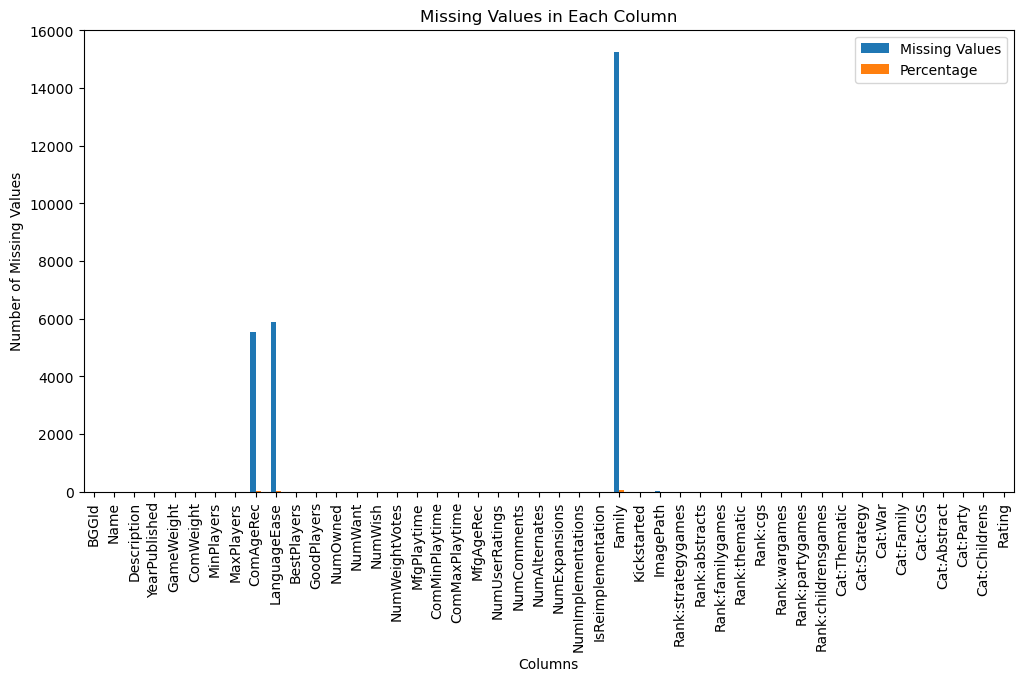

In [8]:
# Missing values analysis
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data[missing_data['Missing Values'] > 0])
missing_data.plot(kind='bar', figsize=(12, 6))
plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()

In [9]:
# Duplicated values analysis
# duplicated rows
duplicated_count = df.duplicated().sum()
print(f"Number of duplicated rows: {duplicated_count}")
if duplicated_count > 0:
    duplicated_rows = df[df.duplicated()]
    print(duplicated_rows)
# duplicated values in specific columns with occurrences
for column in df.columns:
    duplicated_values = df[column][df[column].duplicated()]
    if not duplicated_values.empty:
        print(f"Duplicated values in column '{column}':")
        print(duplicated_values.value_counts())

Number of duplicated rows: 0
Duplicated values in column 'Name':
Name
Robin Hood                     5
Saga                           3
Gettysburg                     3
Chaos                          3
Warhammer 40,000: Kill Team    3
                              ..
Papua                          1
Cat Tower                      1
Pepper                         1
Mandala                        1
Vintage                        1
Name: count, Length: 355, dtype: int64
Duplicated values in column 'Description':
Description
dice throne game intriguing dice tactical card play powerful hero unique abilitiesit fastpaced   player combat game v v v vv freeforall select variety hero play feel completely distinct attack opponent activate ability roll hero unique set dice accumulate combat point spend card large range effect grant permanent hero upgrade apply status effect manipulate dice directly teammate opponentsdice throne season introduce roster new hero intrigue new matchupsa stand game sup

# 4. Single columns analysis

## Columns 1-15

In [10]:
# columns 1-15 -> Andre
columns_1_15 = df.columns[1:16]
columns_1_15

Index(['Name', 'Description', 'YearPublished', 'GameWeight', 'ComWeight',
       'MinPlayers', 'MaxPlayers', 'ComAgeRec', 'LanguageEase', 'BestPlayers',
       'GoodPlayers', 'NumOwned', 'NumWant', 'NumWish', 'NumWeightVotes'],
      dtype='object')

In [11]:
# BGGId -> duplicate values and type
print(df["BGGId"].nunique())
print(df["BGGId"].dtype)

21925
int64



 ANALISI COLONNA: Name
Totale valori validi: 21925
Missing (NaN): 0 (0.00%)
Zero: 0 (0.00%)
Negativi: 0
Colonna non numerica — saltata.

 ANALISI COLONNA: Description
Totale valori validi: 21924
Missing (NaN): 1 (0.00%)
Zero: 0 (0.00%)
Negativi: 0
Colonna non numerica — saltata.

 ANALISI COLONNA: YearPublished
Totale valori validi: 21925
Missing (NaN): 0 (0.00%)
Zero: 193 (0.88%)
Negativi: 11
Min: -3500, Max: 2021, Mean: 1985.49
Variance: 45150.39
Fuori range logico (<1900 o >2025): 309
Outliers rilevati (metodo IQR): 1143


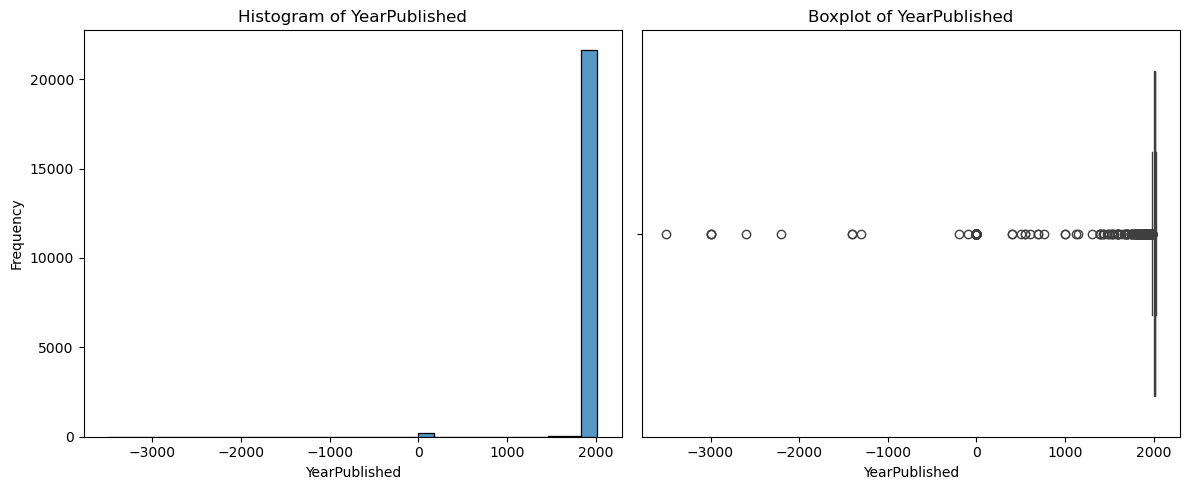


 ANALISI COLONNA: GameWeight
Totale valori validi: 21925
Missing (NaN): 0 (0.00%)
Zero: 506 (2.31%)
Negativi: 0
Min: 0.0, Max: 5.0, Mean: 1.98
Variance: 0.72
Fuori range logico (<1 o >5): 506
Outliers rilevati (metodo IQR): 134


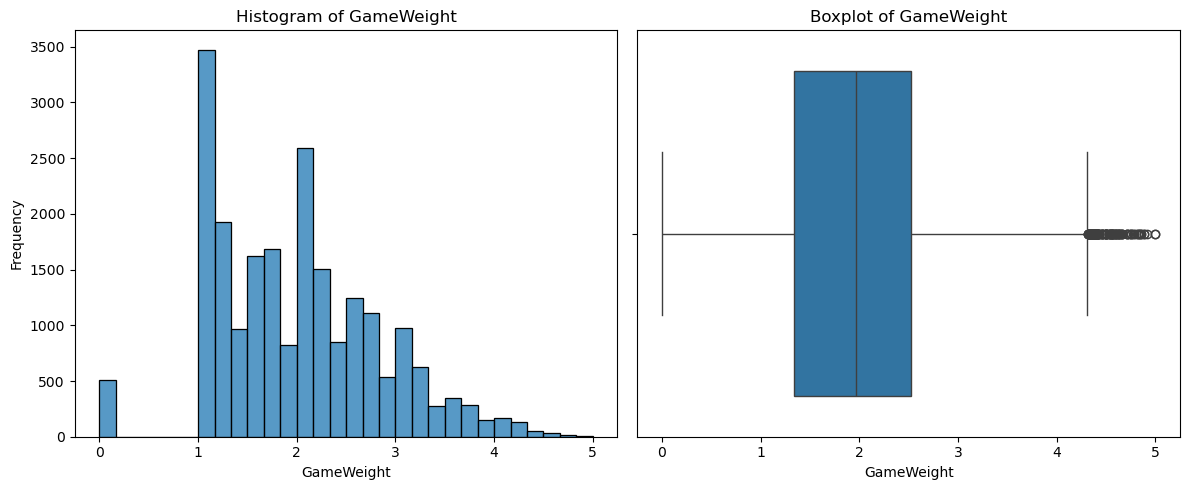


 ANALISI COLONNA: ComWeight
Totale valori validi: 21925
Missing (NaN): 0 (0.00%)
Zero: 506 (2.31%)
Negativi: 0
Min: 0.0, Max: 5.2132, Mean: 2.18
Variance: 0.74
Fuori range logico (<1 o >5): 519
Outliers rilevati (metodo IQR): 100


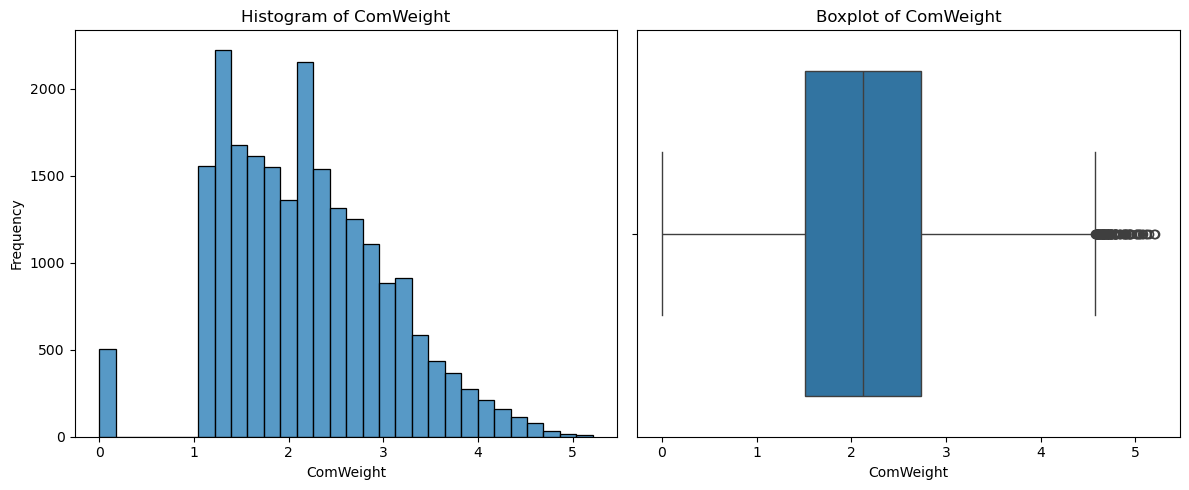


 ANALISI COLONNA: MinPlayers
Totale valori validi: 21925
Missing (NaN): 0 (0.00%)
Zero: 50 (0.23%)
Negativi: 0
Min: 0, Max: 10, Mean: 2.01
Variance: 0.48
Fuori range logico (<1 o >100): 50
Outliers rilevati (metodo IQR): 6886


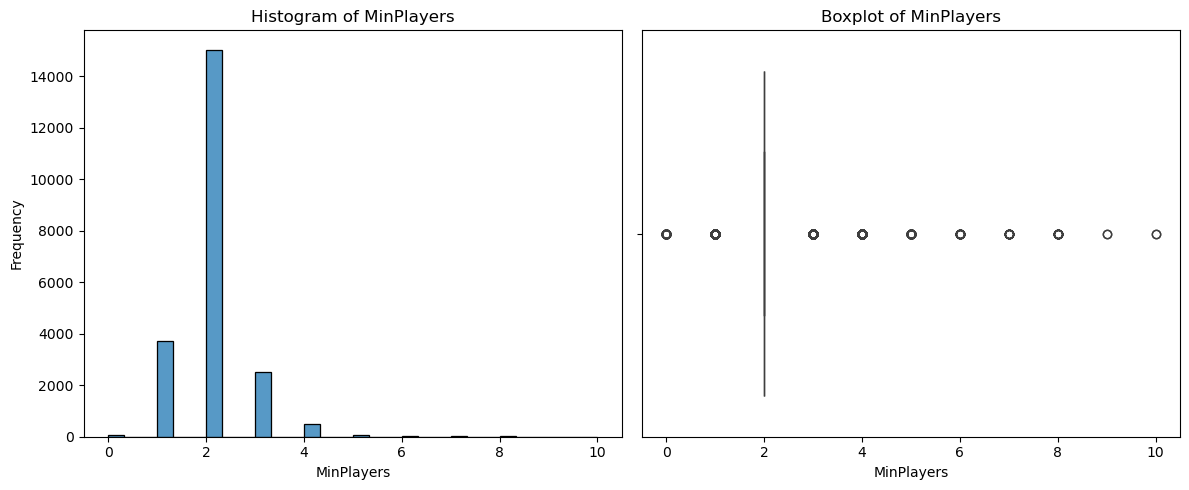


 ANALISI COLONNA: MaxPlayers
Totale valori validi: 21925
Missing (NaN): 0 (0.00%)
Zero: 173 (0.79%)
Negativi: 0
Min: 0, Max: 999, Mean: 5.71
Variance: 225.44
Fuori range logico (<1 o >100): 181
Outliers rilevati (metodo IQR): 1340


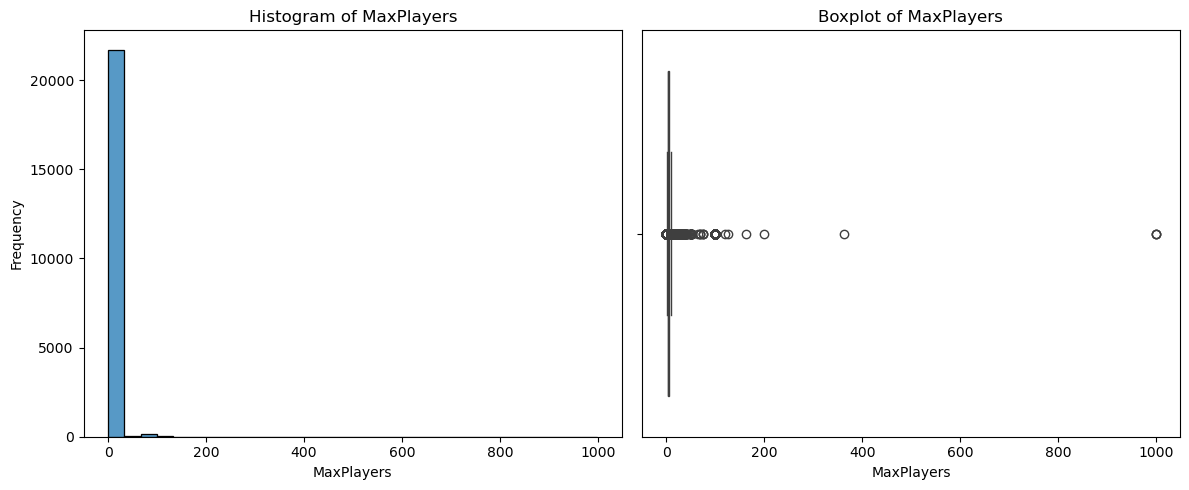


 ANALISI COLONNA: ComAgeRec
Totale valori validi: 16395
Missing (NaN): 5530 (25.22%)
Zero: 0 (0.00%)
Negativi: 0
Min: 2.0, Max: 21.0, Mean: 10.00
Variance: 10.69
Fuori range logico (<3 o >100): 85
Outliers rilevati (metodo IQR): 41


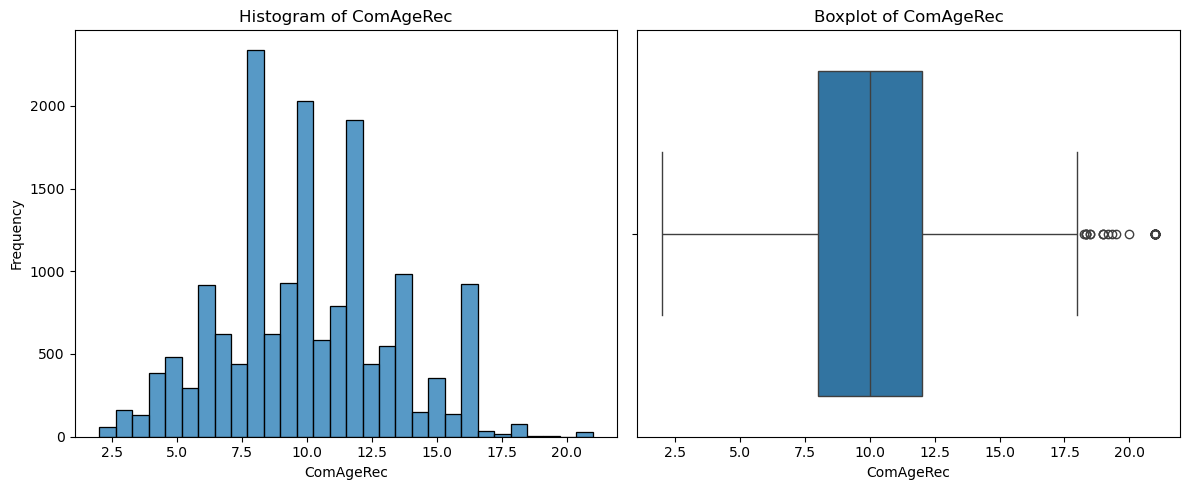


 ANALISI COLONNA: LanguageEase
Totale valori validi: 16034
Missing (NaN): 5891 (26.87%)
Zero: 0 (0.00%)
Negativi: 0
Min: 1.0, Max: 1757.0, Mean: 216.46
Variance: 55977.26
Fuori range logico (<1 o >5): 14119
Outliers rilevati (metodo IQR): 257


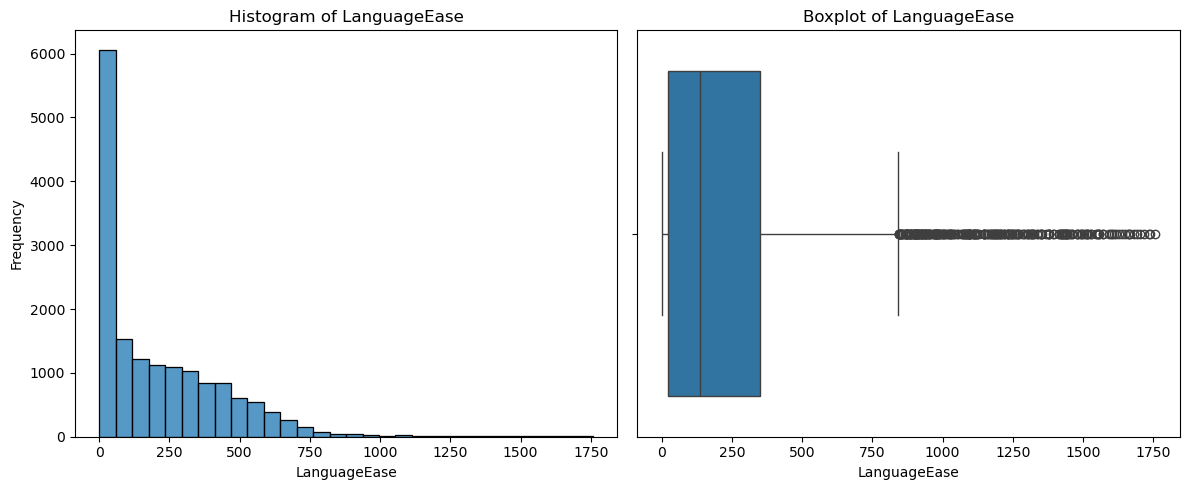


 ANALISI COLONNA: BestPlayers
Totale valori validi: 21925
Missing (NaN): 0 (0.00%)
Zero: 19944 (90.96%)
Negativi: 0
Min: 0, Max: 15, Mean: 0.31
Variance: 1.14
Outliers rilevati (metodo IQR): 1981


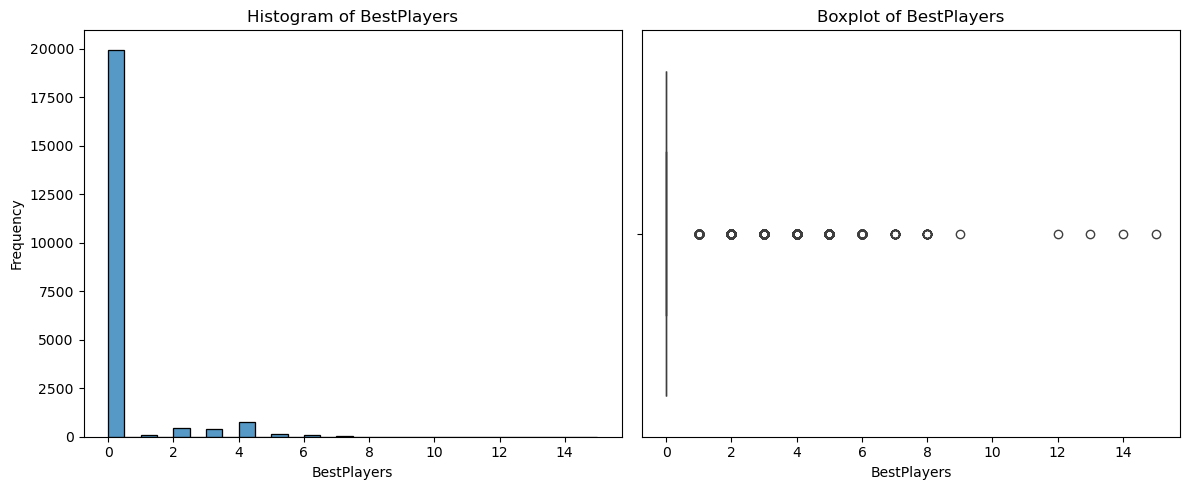


 ANALISI COLONNA: GoodPlayers
Totale valori validi: 21925
Missing (NaN): 0 (0.00%)
Zero: 0 (0.00%)
Negativi: 0
Colonna non numerica — saltata.

 ANALISI COLONNA: NumOwned
Totale valori validi: 21925
Missing (NaN): 0 (0.00%)
Zero: 1 (0.00%)
Negativi: 0
Min: 0, Max: 166497, Mean: 1467.85
Variance: 28027712.65
Outliers rilevati (metodo IQR): 2845


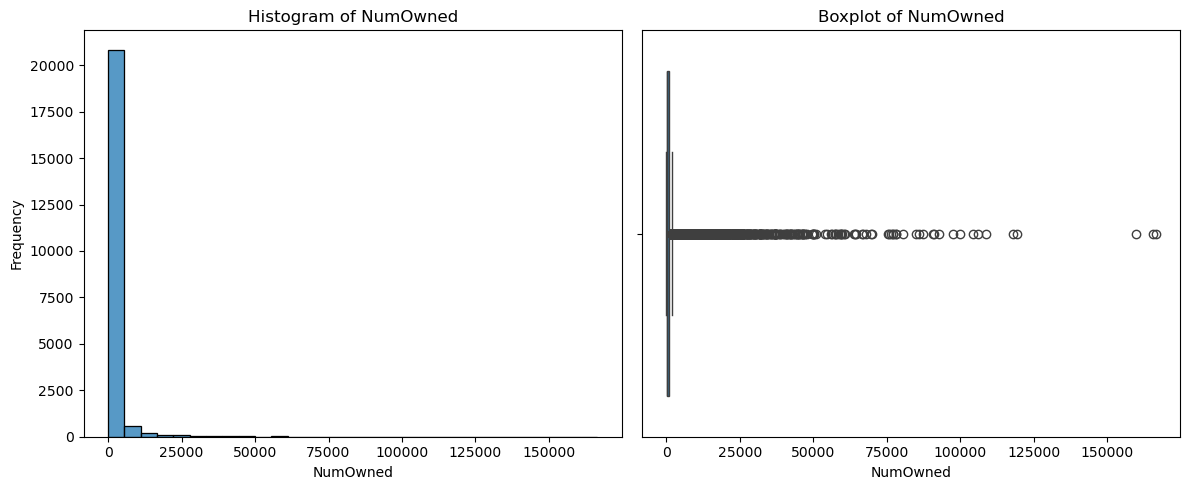


 ANALISI COLONNA: NumWant
Totale valori validi: 21925
Missing (NaN): 0 (0.00%)
Zero: 1938 (8.84%)
Negativi: 0
Min: 0, Max: 2031, Mean: 41.69
Variance: 13748.79
Outliers rilevati (metodo IQR): 2910


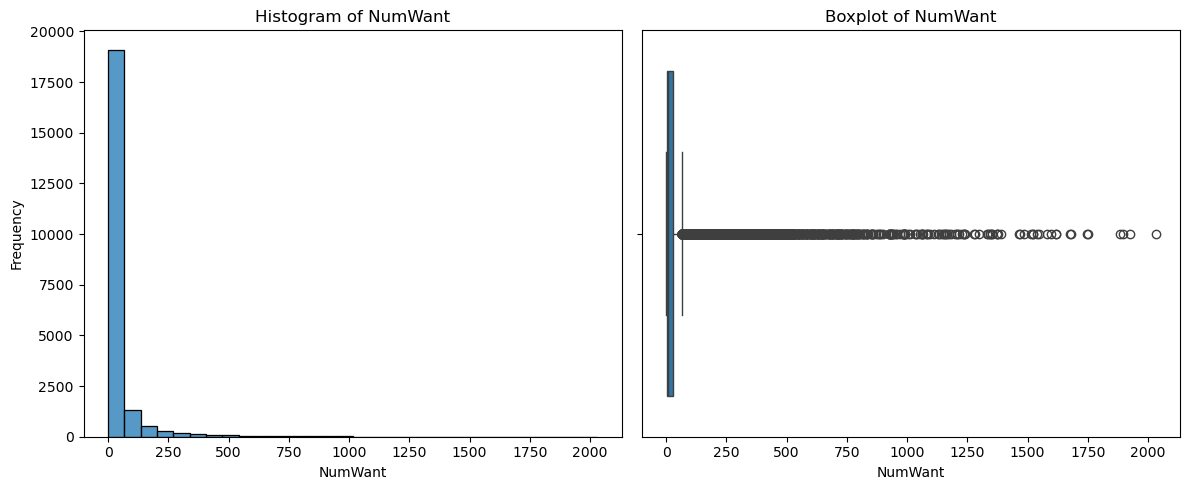


 ANALISI COLONNA: NumWish
Totale valori validi: 21925
Missing (NaN): 0 (0.00%)
Zero: 106 (0.48%)
Negativi: 0
Min: 0, Max: 19182, Mean: 228.46
Variance: 621696.22
Outliers rilevati (metodo IQR): 3030


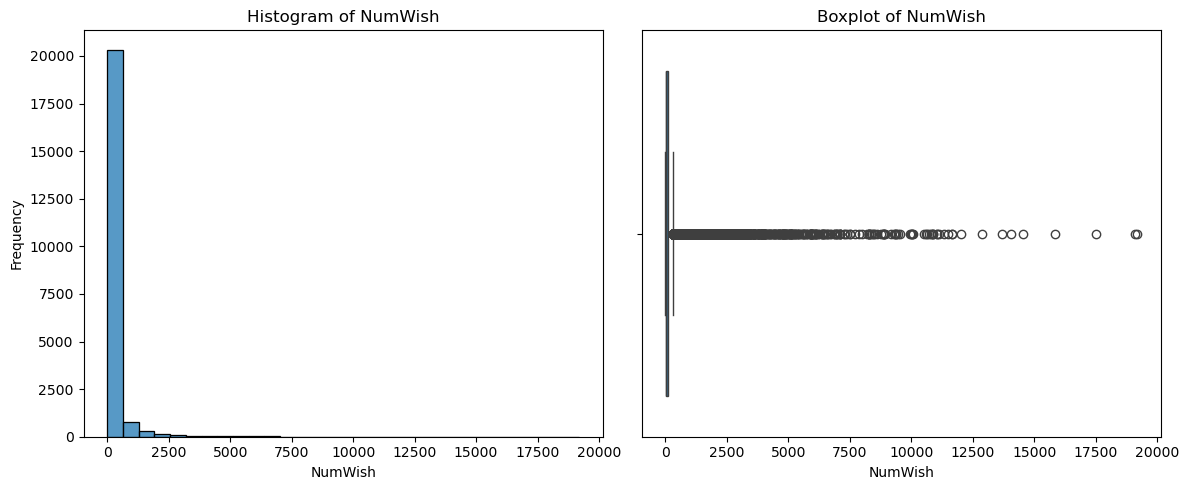


 ANALISI COLONNA: NumWeightVotes
Totale valori validi: 21925
Missing (NaN): 0 (0.00%)
Zero: 506 (2.31%)
Negativi: 0
Min: 0, Max: 7673, Mean: 49.48
Variance: 42338.16
Outliers rilevati (metodo IQR): 2938


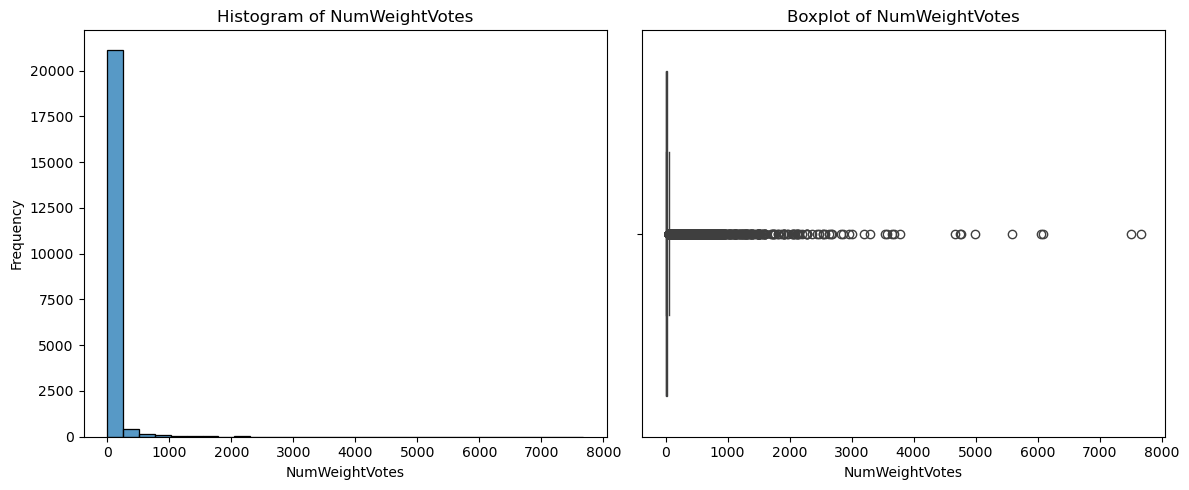


 ANALISI COLONNA: Rating
Totale valori validi: 21925
Missing (NaN): 0 (0.00%)
Zero: 0 (0.00%)
Negativi: 0
Colonna non numerica — saltata.


 RIEPILOGO FINALE DEL DATASET:


Column  Nulls  Zeros  Negatives  Outliers (IQR)  \
0             Name      0      0          0             NaN   
1      Description      1      0          0             NaN   
2    YearPublished      0    193         11          1143.0   
3       GameWeight      0    506          0           134.0   
4        ComWeight      0    506          0           100.0   
5       MinPlayers      0     50          0          6886.0   
6       MaxPlayers      0    173          0          1340.0   
7        ComAgeRec   5530      0          0            41.0   
8     LanguageEase   5891      0          0           257.0   
9      BestPlayers      0  19944          0          1981.0   
10     GoodPlayers      0      0          0             NaN   
11        NumOwned      0      1          0          2845.0   
12         NumWant      0   1938          0          2910.0   
13         NumWish      0    106          0          3030.0   
14  NumWeightVotes      0    506          0          2938.0   
15          Rating      0      0          0             NaN   

    Below logical range  Above logical range         Mean      Variance  
0                   NaN                  NaN          NaN           NaN  
1                   NaN                  NaN          NaN           NaN  
2                 309.0                  0.0  1985.494914  4.515039e+04  
3                 506.0                  0.0     1.982131  7.207718e-01  
4                 506.0                 13.0     2.177479  7.426657e-01  
5                  50.0                  0.0     2.007343  4.803785e-01  
6                 173.0                  8.0     5.707868  2.254395e+02  
7                  85.0                  0.0    10.004391  1.068739e+01  
8                   0.0              14119.0   216.461819  5.597726e+04  
9                   NaN                  NaN     0.311517  1.138494e+00  
10                  NaN                  NaN          NaN           NaN  
11                  NaN                  NaN  1467.848164  2.802771e+07  
12                  NaN                  NaN    41.690946  1.374879e+04  
13                  NaN                  NaN   228.457013  6.216962e+05  
14                  NaN                  NaN    49.480137  4.233816e+04  
15                  NaN                  NaN          NaN           NaN

In [12]:
def analyze_dataset(df, columns=None, logical_ranges=None):
    """
    Analizza colonne del dataset mostrando:
    - Valori nulli, zero, negativi
    - Outlier (metodo IQR)
    - Valori fuori range logico (se specificato)
    - Media e varianza per colonne numeriche
    - Istogramma e boxplot per ciascuna colonna numerica
    - Riassunto finale in tabella
    """

    if columns is None:
        columns = df.select_dtypes(include=[np.number]).columns

    summary = []  # per raccogliere statistiche

    for col in columns:
        print(f"\n{'='*100}")
        print(f" ANALISI COLONNA: {col}")
        print(f"{'='*100}")

        serie = df[col]
        nulls = serie.isnull().sum()
        nulls_percentage = (nulls / len(serie)) * 100
        zeros = (serie == 0).sum() if pd.api.types.is_numeric_dtype(serie) else 0
        zeros_percentage = (zeros / len(serie)) * 100
        negatives = (serie < 0).sum() if pd.api.types.is_numeric_dtype(serie) else 0
        valid = len(serie) - nulls

        print(f"Totale valori validi: {valid}")
        print(f"Missing (NaN): {nulls} ({nulls_percentage:.2f}%)")
        print(f"Zero: {zeros} ({zeros_percentage:.2f}%)")
        print(f"Negativi: {negatives}")

        #Salta se non numerica
        if not pd.api.types.is_numeric_dtype(serie):
            print("Colonna non numerica — saltata.")
            summary.append([col, nulls, zeros, negatives, np.nan, np.nan, np.nan, np.nan, np.nan])
            continue

        #Statistiche base
        print(f"Min: {serie.min()}, Max: {serie.max()}, Mean: {serie.mean():.2f}")
        print(f"Variance: {serie.var():.2f}")

        #Range logico (se definito)
        lower_limit, upper_limit = None, None
        if logical_ranges and col in logical_ranges:
            lower_limit, upper_limit = logical_ranges[col]
            too_low = (serie < lower_limit).sum() if lower_limit is not None else 0
            too_high = (serie > upper_limit).sum() if upper_limit is not None else 0
            print(f"Fuori range logico (<{lower_limit} o >{upper_limit}): {too_low + too_high}")
        else:
            too_low, too_high = np.nan, np.nan

        #Outlier detection (IQR)
        Q1 = serie.quantile(0.25)
        Q3 = serie.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = serie[(serie < lower_bound) | (serie > upper_bound)]
        print(f"Outliers rilevati (metodo IQR): {len(outliers)}")

        #Visualizzazioni
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        sns.histplot(serie.dropna(), bins=30)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')

        plt.subplot(1, 2, 2)
        sns.boxplot(x=serie.dropna())
        plt.title(f'Boxplot of {col}')
        plt.xlabel(col)

        plt.tight_layout()
        plt.show()

        #Statistiche per il riassunto
        summary.append([
            col, nulls, zeros, negatives, len(outliers),
            too_low, too_high, serie.mean(), serie.var()
        ])

    summary_df = pd.DataFrame(summary, columns=[
        'Column', 'Nulls', 'Zeros', 'Negatives', 'Outliers (IQR)',
        'Below logical range', 'Above logical range', 'Mean', 'Variance'
    ])

    print("\n\n RIEPILOGO FINALE DEL DATASET:")
    display(summary_df)
    return summary_df

# Colonne da analizzare
columns_to_check = [
    'Name', 'Description', 'YearPublished', 'GameWeight', 'ComWeight',
    'MinPlayers', 'MaxPlayers', 'ComAgeRec', 'LanguageEase', 'BestPlayers',
    'GoodPlayers', 'NumOwned', 'NumWant', 'NumWish', 'NumWeightVotes', 'Rating'
]

# Range logici personalizzati per alcune colonne
logical_ranges = {
    'YearPublished': (1900, 2025),
    'GameWeight': (1, 5),
    'ComWeight': (1, 5),
    'ComAgeRec': (3, 100),
    'LanguageEase': (1, 5),
    'MinPlayers': (1, 100),
    'MaxPlayers': (1, 100),
    'Rating': (0, 10)
}

# Esegui analisi
summary = analyze_dataset(df, columns=columns_to_check, logical_ranges=logical_ranges)


In [120]:
difference = (df["MaxPlayers"] - df["MinPlayers"])
print(len(df[(df["MaxPlayers"] - df["MinPlayers"])<0]))


print(difference.sort_values(ascending = True))

difference_2 = df[df["MaxPlayers"]> 0] - df["MinPlayers"]
print(df[difference_2 < 0])



132
15105     -4
13503     -4
7085      -4
1092      -4
3280      -4
        ... 
6026     198
110      361
20979    997
13448    997
10961    997
Length: 21925, dtype: int64
       BGGId Name Description  YearPublished  GameWeight  ComWeight  \
0        NaN  NaN         NaN            NaN         NaN        NaN   
1        NaN  NaN         NaN            NaN         NaN        NaN   
2        NaN  NaN         NaN            NaN         NaN        NaN   
3        NaN  NaN         NaN            NaN         NaN        NaN   
4        NaN  NaN         NaN            NaN         NaN        NaN   
...      ...  ...         ...            ...         ...        ...   
21920    NaN  NaN         NaN            NaN         NaN        NaN   
21921    NaN  NaN         NaN            NaN         NaN        NaN   
21922    NaN  NaN         NaN            NaN         NaN        NaN   
21923    NaN  NaN         NaN            NaN         NaN        NaN   
21924    NaN  NaN         NaN            NaN

In [ ]:
difference = df["MaxPlayers"]==0 - df["MinPlayers"] 
print()

# 

False


In [13]:
# GoodPlayers analysis
good_players_counts = df[['GoodPlayers']].value_counts()
good_players_counts

# too many missing values in GoodPlayers column -> drop the column

GoodPlayers                              
[]                                           19946
['2', '3', '4']                                600
['3', '4', '5']                                185
['2']                                          158
['1', '2', '3', '4']                           140
                                             ...  
['1', '2', '3', '4', '4+']                       1
['3', '5']                                       1
['3', '6']                                       1
['4', '5', '5+']                                 1
['3', '4', '5', '6', '7', '8', '9', '10']        1
Name: count, Length: 78, dtype: int64

0
506
506
13
506


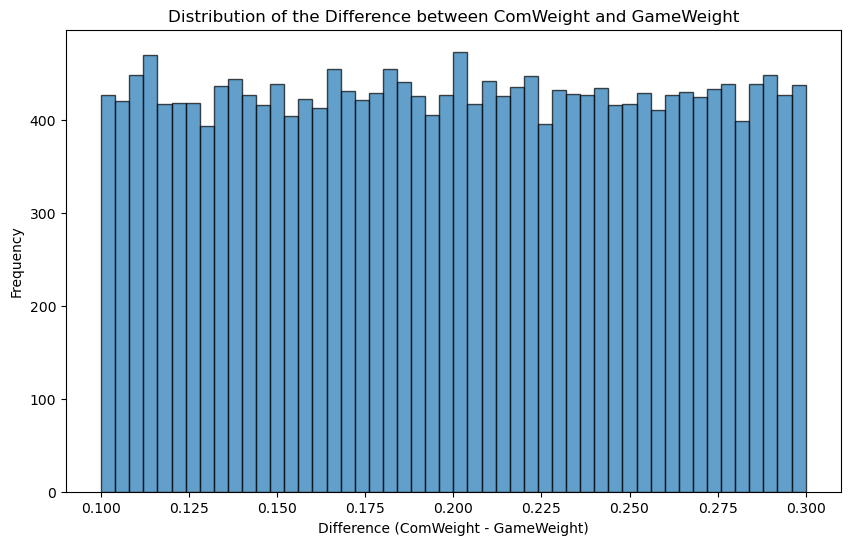

K-S statistic = 0.0033, p = 0.9715
The differences are uniformly distributed.


In [14]:
# ComWeight missing and wrong values (they should be between 1 and 5)
print((df["ComWeight"].isnull()).sum())
print((df["ComWeight"] < 1).sum())
print((df["ComWeight"] == 0).sum())
print((df["ComWeight"] > 5).sum())

# 506 are equal to 0 and 13 are greater than 5

print(((df["ComWeight"] == 0) & (df["GameWeight"] == 0)).sum())

# check if comweight is equal to gameweight + random noise
difference = df[df["ComWeight"]>0]["ComWeight"] -  df[df["ComWeight"]>0]["GameWeight"]
plt.figure(figsize=(10,6)) 
plt.hist(difference.dropna(), bins=50, edgecolor='k', alpha=0.7)
plt.title("Distribution of the Difference between ComWeight and GameWeight")
plt.xlabel("Difference (ComWeight - GameWeight)")
plt.ylabel("Frequency")
plt.show()

# Kolmogorov-Smirnov test for uniformity of the difference
from scipy.stats import kstest, uniform

a, b = difference.min(), difference.max()
stat, p = kstest(difference, 'uniform', args=(a, b - a))
print(f"K-S statistic = {stat:.4f}, p = {p:.4f}")
# If p < 0.05, we reject the null hypothesis that the differences are uniformly distributed.
if p < 0.05:
    print("The differences are not uniformly distributed.")
else:
    print("The differences are uniformly distributed.")


## Columns 15-30

In [15]:
# columns 15-30 -> Leo
columns_15_30 = df.columns[16:31]
columns_15_30

Index(['MfgPlaytime', 'ComMinPlaytime', 'ComMaxPlaytime', 'MfgAgeRec',
       'NumUserRatings', 'NumComments', 'NumAlternates', 'NumExpansions',
       'NumImplementations', 'IsReimplementation', 'Family', 'Kickstarted',
       'ImagePath', 'Rank:strategygames', 'Rank:abstracts'],
      dtype='object')

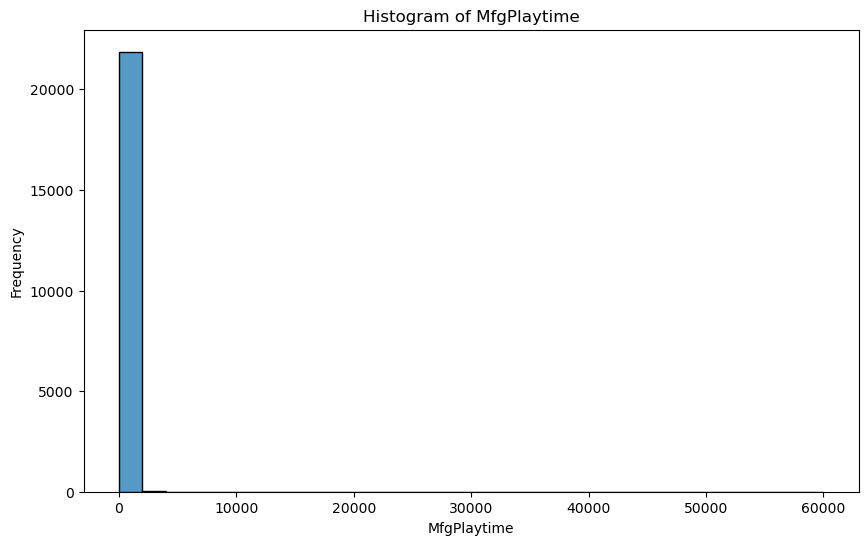

Number of null values in MfgPlaytime: 0. Percentage of nulls: 0.00%
Number of zero values in MfgPlaytime: 780. Percentage of zeros: 3.56%


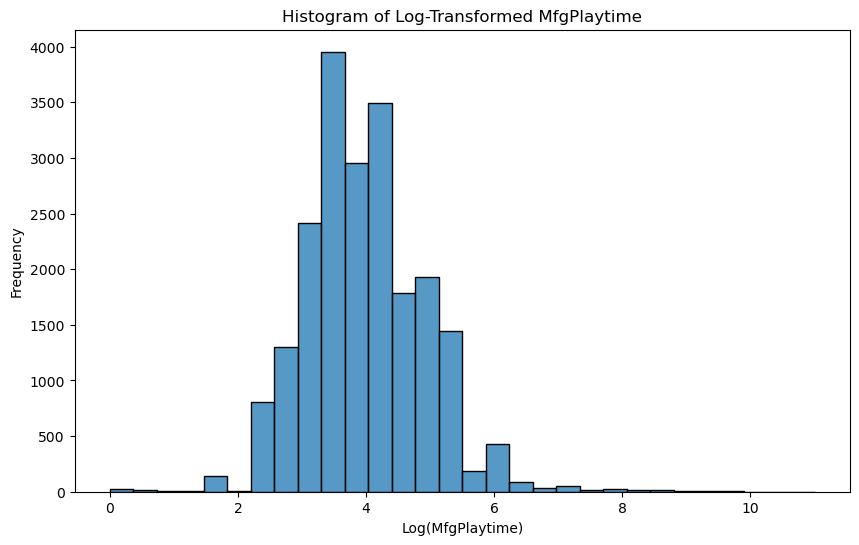

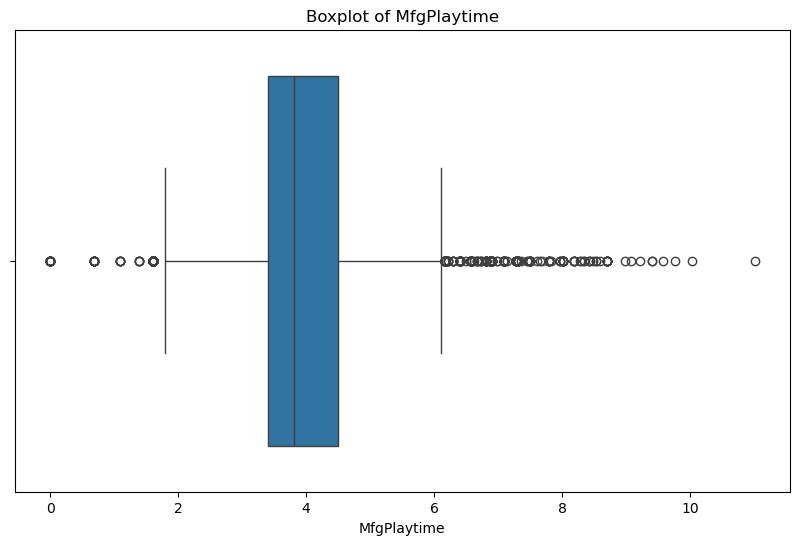

Number of outliers in MfgPlaytime: 508
9        1.609438
41       7.313220
77       6.396930
145      6.173786
148      6.396930
           ...   
21819    0.000000
21851    1.609438
21872    8.425078
21886    1.609438
21904    6.173786
Name: MfgPlaytime, Length: 508, dtype: float64


In [16]:
# Manufacturer Stated Play Time statistics analysis
mfgplaytime = df["MfgPlaytime"]
# histogram
plt.figure(figsize=(10, 6))
sns.histplot(mfgplaytime, bins=30)
plt.title('Histogram of MfgPlaytime')
plt.xlabel('MfgPlaytime')
plt.ylabel('Frequency')
plt.show()
# logarithmic transformation
zeros_mfgplaytime = (mfgplaytime == 0).sum()
nulls_mfgplaytime = mfgplaytime.isnull().sum()
# possible zero and null values as default entries
print(f"Number of null values in MfgPlaytime: {nulls_mfgplaytime}. Percentage of nulls: {nulls_mfgplaytime / len(mfgplaytime) * 100:.2f}%")
print(f"Number of zero values in MfgPlaytime: {zeros_mfgplaytime}. Percentage of zeros: {zeros_mfgplaytime / len(mfgplaytime) * 100:.2f}%")
mfgplaytime_no_zeros = mfgplaytime[mfgplaytime > 0]
mfgplaytime_log = np.log(mfgplaytime_no_zeros)
# histogram of log-transformed data
plt.figure(figsize=(10, 6))
sns.histplot(mfgplaytime_log, bins=30)
plt.title('Histogram of Log-Transformed MfgPlaytime')
plt.xlabel('Log(MfgPlaytime)')
plt.ylabel('Frequency')
plt.show()
# boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=mfgplaytime_log)
plt.title('Boxplot of MfgPlaytime')
plt.xlabel('MfgPlaytime')
plt.show()
# outliers detection
Q1 = mfgplaytime_log.quantile(0.25)
Q3 = mfgplaytime_log.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = mfgplaytime_log[(mfgplaytime_log < lower_bound) | (mfgplaytime_log > upper_bound)]
print(f"Number of outliers in MfgPlaytime: {len(outliers)}")
print(outliers)

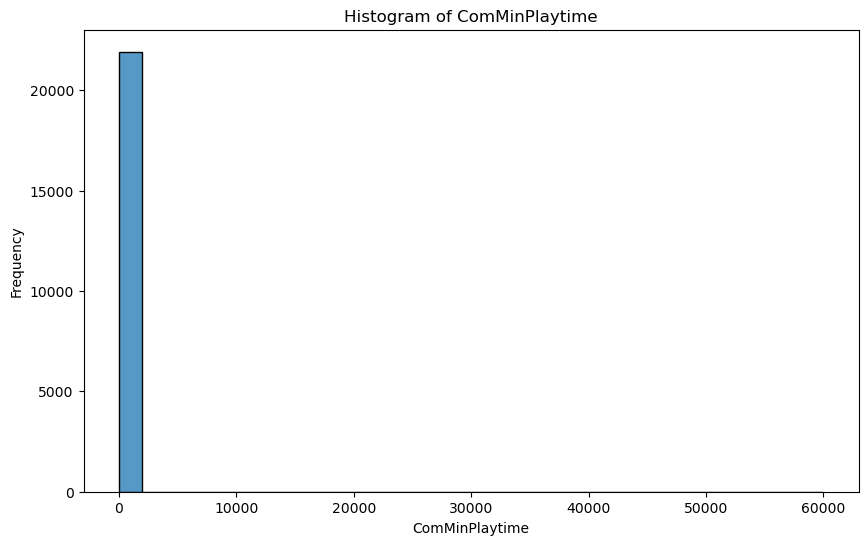

Number of null values in ComMinPlaytime: 0. Percentage of nulls: 0.00%
Number of zero values in ComMinPlaytime: 652. Percentage of zeros: 2.97%


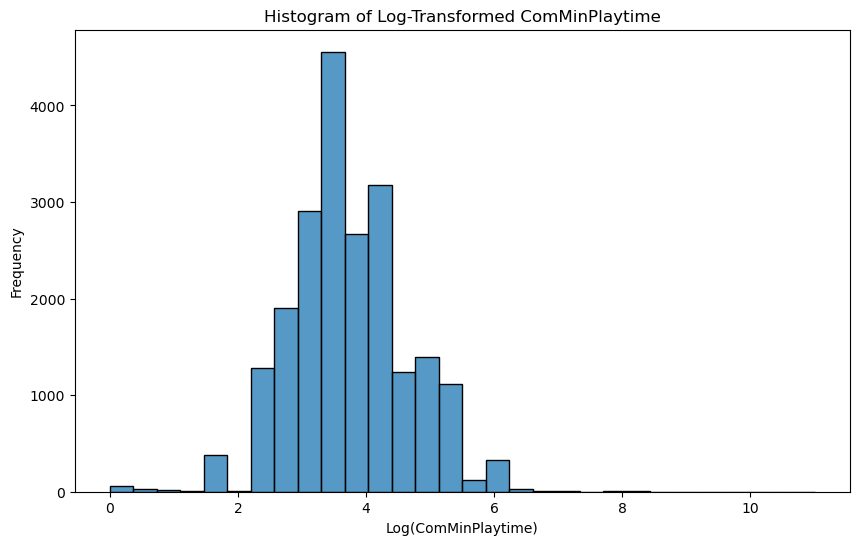

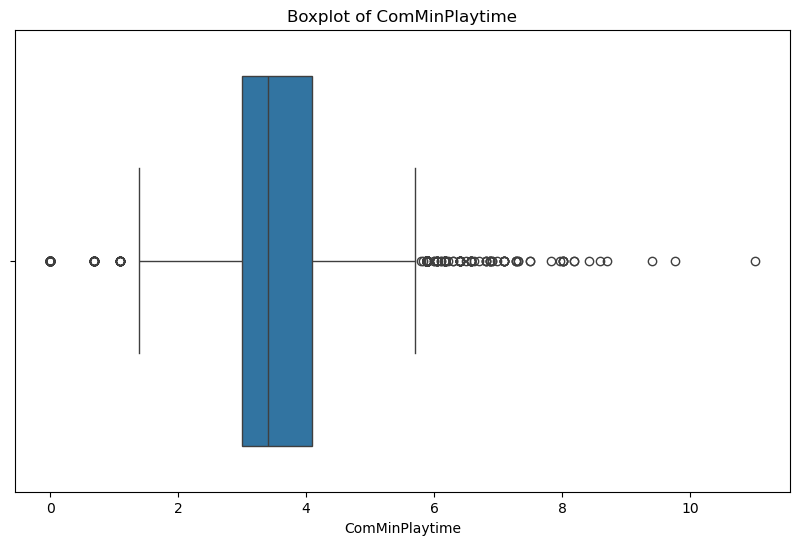

Number of outliers in ComMinPlaytime: 493
41       6.802395
64       5.886104
77       6.396930
82       5.991465
130      0.000000
           ...   
21819    0.000000
21851    0.000000
21857    0.693147
21899    0.000000
21903    5.886104
Name: ComMinPlaytime, Length: 493, dtype: float64


In [17]:
# Community minimum playtime statistics analysis
com_min_playtime = df["ComMinPlaytime"]
# histogram
plt.figure(figsize=(10, 6))
sns.histplot(com_min_playtime, bins=30)
plt.title('Histogram of ComMinPlaytime')
plt.xlabel('ComMinPlaytime')
plt.ylabel('Frequency')
plt.show()
# null and zero values analysis
zeros_com_min_playtime = (com_min_playtime == 0).sum()
nulls_com_min_playtime = com_min_playtime.isnull().sum()
print(f"Number of null values in ComMinPlaytime: {nulls_com_min_playtime}. Percentage of nulls: {nulls_com_min_playtime / len(com_min_playtime) * 100:.2f}%")
print(f"Number of zero values in ComMinPlaytime: {zeros_com_min_playtime}. Percentage of zeros: {zeros_com_min_playtime / len(com_min_playtime) * 100:.2f}%")
com_min_playtime_no_zeros = com_min_playtime[com_min_playtime > 0]
# logarithmic transformation
com_min_playtime_log = np.log(com_min_playtime_no_zeros)
# histogram of log-transformed data
plt.figure(figsize=(10, 6))
sns.histplot(com_min_playtime_log, bins=30)
plt.title('Histogram of Log-Transformed ComMinPlaytime')
plt.xlabel('Log(ComMinPlaytime)')
plt.ylabel('Frequency')
plt.show()
# boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=com_min_playtime_log)
plt.title('Boxplot of ComMinPlaytime')
plt.xlabel('ComMinPlaytime')
plt.show()
# outliers detection
Q1 = com_min_playtime_log.quantile(0.25)
Q3 = com_min_playtime_log.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = com_min_playtime_log[(com_min_playtime_log < lower_bound) | (com_min_playtime_log > upper_bound)]
print(f"Number of outliers in ComMinPlaytime: {len(outliers)}")
print(outliers)

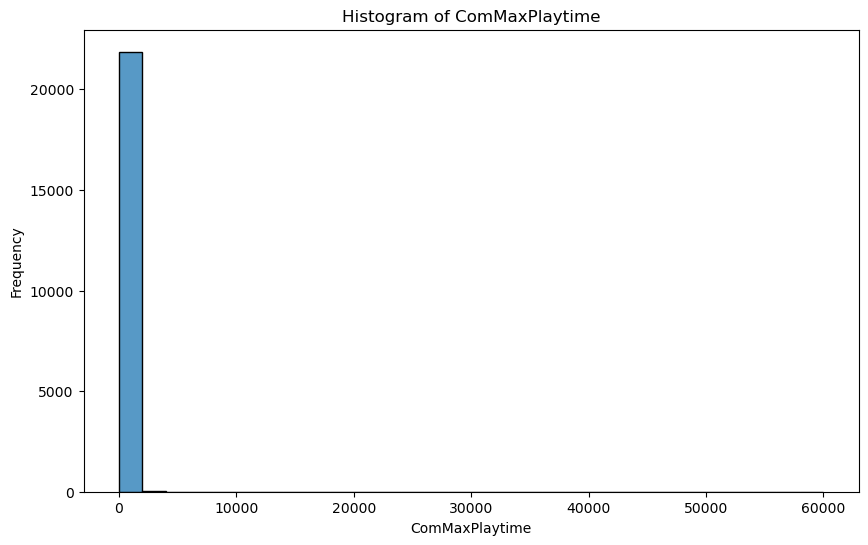

Number of zero values in ComMaxPlaytime: 780. Percentage of zeros: 3.56%


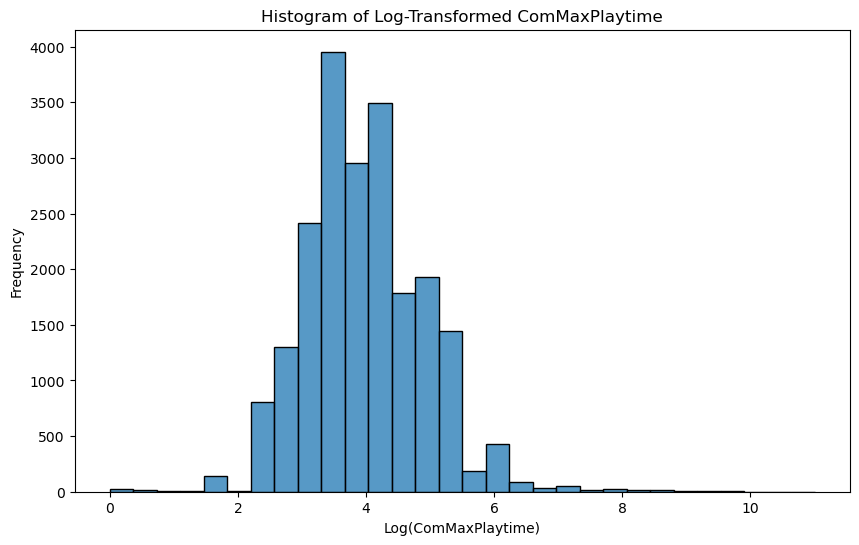

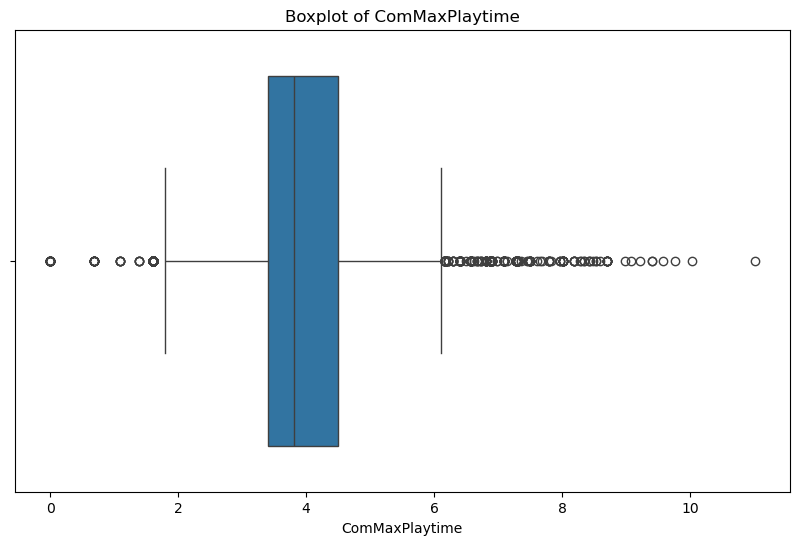

Number of outliers in ComMaxPlaytime: 508
9        1.609438
41       7.313220
77       6.396930
145      6.173786
148      6.396930
           ...   
21819    0.000000
21851    1.609438
21872    8.425078
21886    1.609438
21904    6.173786
Name: ComMaxPlaytime, Length: 508, dtype: float64


In [18]:
# Community maximum playtime statistics analysis
com_max_playtime = df["ComMaxPlaytime"]
# histogram
plt.figure(figsize=(10, 6))
sns.histplot(com_max_playtime, bins=30)
plt.title('Histogram of ComMaxPlaytime')
plt.xlabel('ComMaxPlaytime')
plt.ylabel('Frequency')
plt.show()
# logarithmic transformation
zeros_com_max_playtime = (com_max_playtime == 0).sum()
print(f"Number of zero values in ComMaxPlaytime: {zeros_com_max_playtime}. Percentage of zeros: {zeros_com_max_playtime / len(com_max_playtime) * 100:.2f}%")
com_max_playtime_no_zeros = com_max_playtime[com_max_playtime > 0]
com_max_playtime_log = np.log(com_max_playtime_no_zeros)
# histogram of log-transformed data
plt.figure(figsize=(10, 6))
sns.histplot(com_max_playtime_log, bins=30)
plt.title('Histogram of Log-Transformed ComMaxPlaytime')
plt.xlabel('Log(ComMaxPlaytime)')
plt.ylabel('Frequency')
plt.show()
# boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=com_max_playtime_log)
plt.title('Boxplot of ComMaxPlaytime')
plt.xlabel('ComMaxPlaytime')
plt.show()
# outliers detection
Q1 = com_max_playtime_log.quantile(0.25)
Q3 = com_max_playtime_log.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = com_max_playtime_log[(com_max_playtime_log < lower_bound) | (com_max_playtime_log > upper_bound)]
print(f"Number of outliers in ComMaxPlaytime: {len(outliers)}")
print(outliers)

Number of null values in MfgAgeRec: 0. Percentage of nulls: 0.00%
Number of zero values in MfgAgeRec: 1325. Percentage of zeros: 6.04%


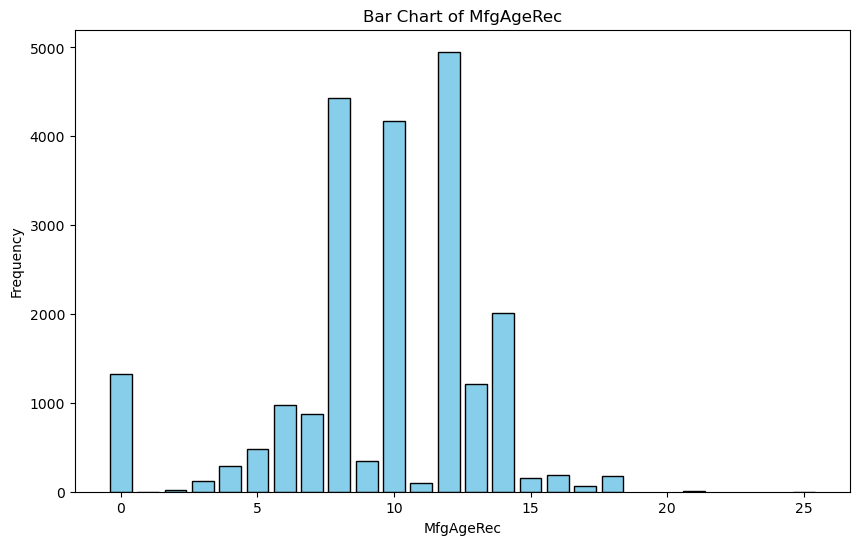

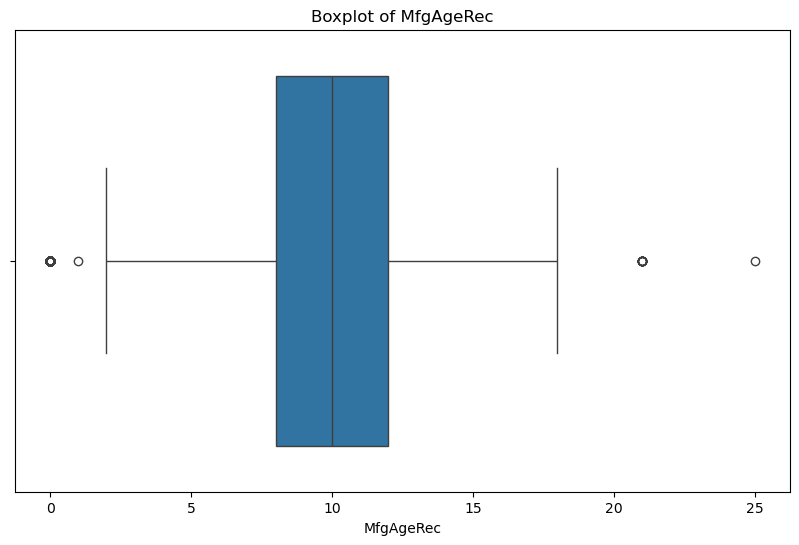

Number of outliers in MfgAgeRec: 1339
6        0
32       0
37       0
41       0
61       0
        ..
21850    0
21895    0
21897    0
21902    0
21915    0
Name: MfgAgeRec, Length: 1339, dtype: int64


In [19]:
# Manufacturer Age Recommendation statistics analysis
mfg_age_rec = df["MfgAgeRec"]
# null and zero values analysis
zeros_mfg_age_rec = (mfg_age_rec == 0).sum()
nulls_mfg_age_rec = mfg_age_rec.isnull().sum()
print(f"Number of null values in MfgAgeRec: {nulls_mfg_age_rec}. Percentage of nulls: {nulls_mfg_age_rec / len(mfg_age_rec) * 100:.2f}%")
print(f"Number of zero values in MfgAgeRec: {zeros_mfg_age_rec}. Percentage of zeros: {zeros_mfg_age_rec / len(mfg_age_rec) * 100:.2f}%")
# barchart
plt.figure(figsize=(10, 6))
plt.bar(mfg_age_rec.value_counts().index, mfg_age_rec.value_counts().values, color='skyblue', edgecolor='black')
plt.title('Bar Chart of MfgAgeRec')
plt.xlabel('MfgAgeRec')
plt.ylabel('Frequency')
plt.show()
# boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=mfg_age_rec)
plt.title('Boxplot of MfgAgeRec')
plt.xlabel('MfgAgeRec')
plt.show()
# outliers detection
Q1 = mfg_age_rec.quantile(0.25)
Q3 = mfg_age_rec.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = mfg_age_rec[(mfg_age_rec < lower_bound) | (mfg_age_rec > upper_bound)]
print(f"Number of outliers in MfgAgeRec: {len(outliers)}")
print(outliers)

Number of null values in NumUserRatings: 0. Percentage of nulls: 0.00%
Number of zero values in NumUserRatings: 0. Percentage of zeros: 0.00%


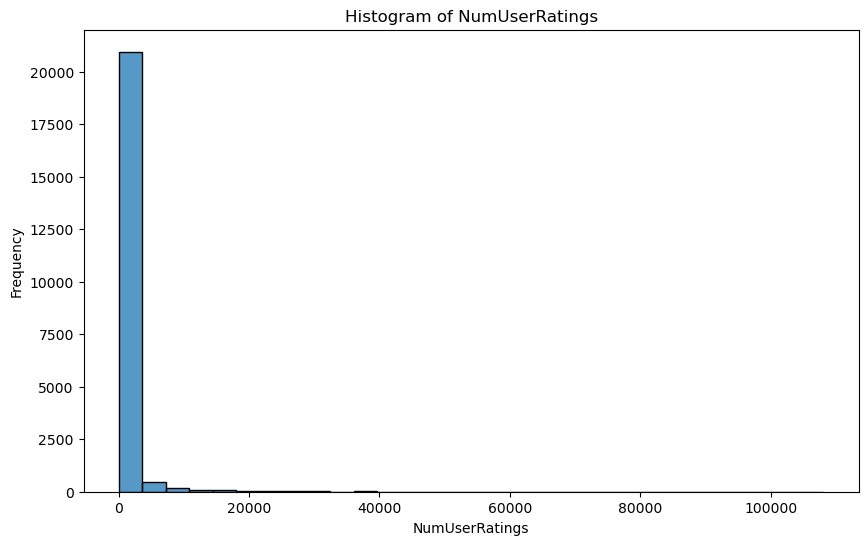

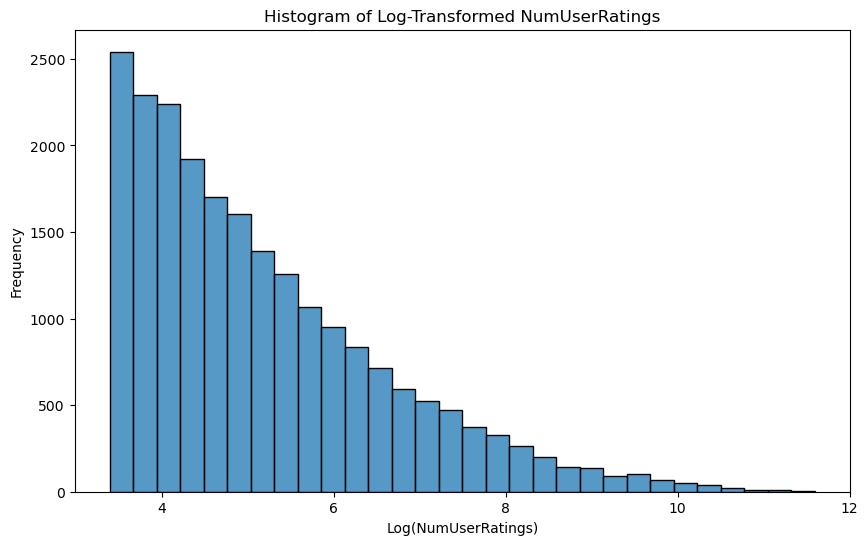

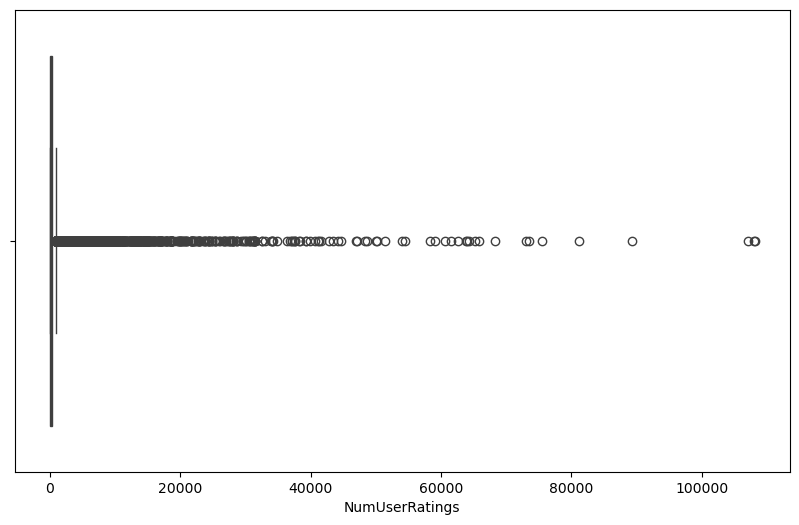

In [101]:
# NumUserRatings analysis
num_user_ratings = df["NumUserRatings"]
# missing and zero values analysis
zeros_num_user_ratings = (num_user_ratings == 0).sum()
nulls_num_user_ratings = num_user_ratings.isnull().sum()
print(f"Number of null values in NumUserRatings: {nulls_num_user_ratings}. Percentage of nulls: {nulls_num_user_ratings / len(num_user_ratings) * 100:.2f}%")
print(f"Number of zero values in NumUserRatings: {zeros_num_user_ratings}. Percentage of zeros: {zeros_num_user_ratings / len(num_user_ratings) * 100:.2f}%")
# histogram
plt.figure(figsize=(10, 6))
sns.histplot(num_user_ratings, bins=30)
plt.title('Histogram of NumUserRatings')
plt.xlabel('NumUserRatings')
plt.ylabel('Frequency')
plt.show()
# logarithmic transformation
num_user_ratings_no_zeros = num_user_ratings[num_user_ratings > 0]
num_user_ratings_log = np.log(num_user_ratings_no_zeros)
# histogram of log-transformed data
plt.figure(figsize=(10, 6))
sns.histplot(num_user_ratings_log, bins=30)
plt.title('Histogram of Log-Transformed NumUserRatings')
plt.xlabel('Log(NumUserRatings)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize= (10,6))
sns.boxplot(x = df["NumUserRatings"])
plt.show()



0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: NumComments, dtype: int64


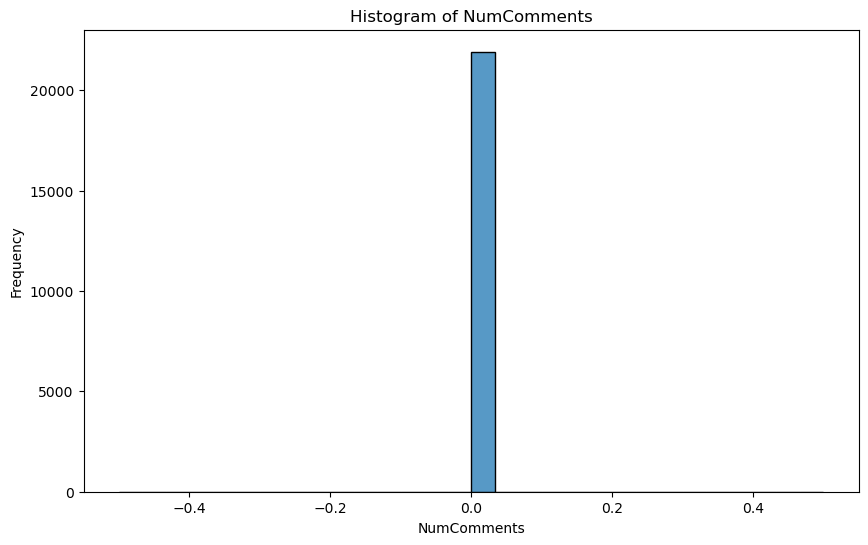

Number of zero values in NumComments: 21925. Percentage of zeros: 100.00%


In [21]:
# number of comments analysis
num_comments = df["NumComments"]
print(num_comments.head(10))
# histogram
plt.figure(figsize=(10, 6))
sns.histplot(num_comments, bins=30)
plt.title('Histogram of NumComments')
plt.xlabel('NumComments')
plt.ylabel('Frequency')
plt.show()
# logarithmic transformation
zeros_num_comments = (num_comments == 0).sum()
print(f"Number of zero values in NumComments: {zeros_num_comments}. Percentage of zeros: {zeros_num_comments / len(num_comments) * 100:.2f}%")
# all the values are zeros, so no further analysis is possible


Number of zero values in NumAlternates: 12967. Percentage of zeros: 59.14%


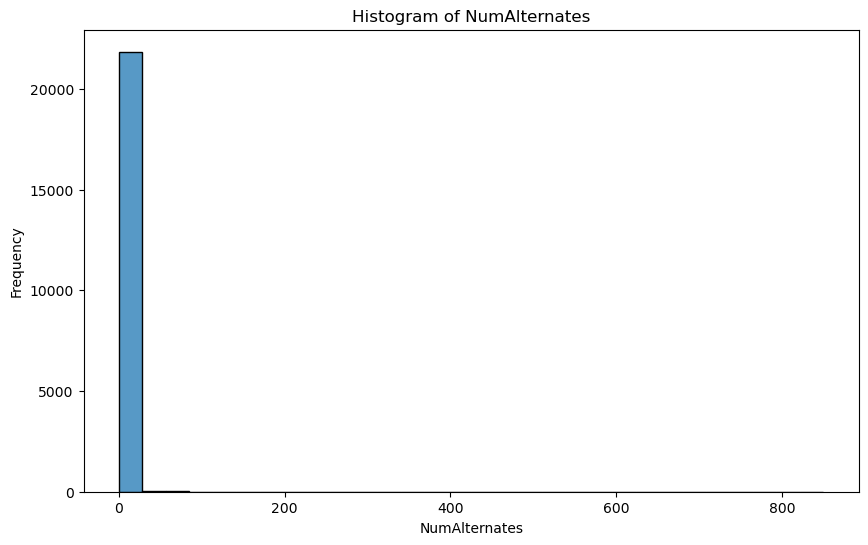

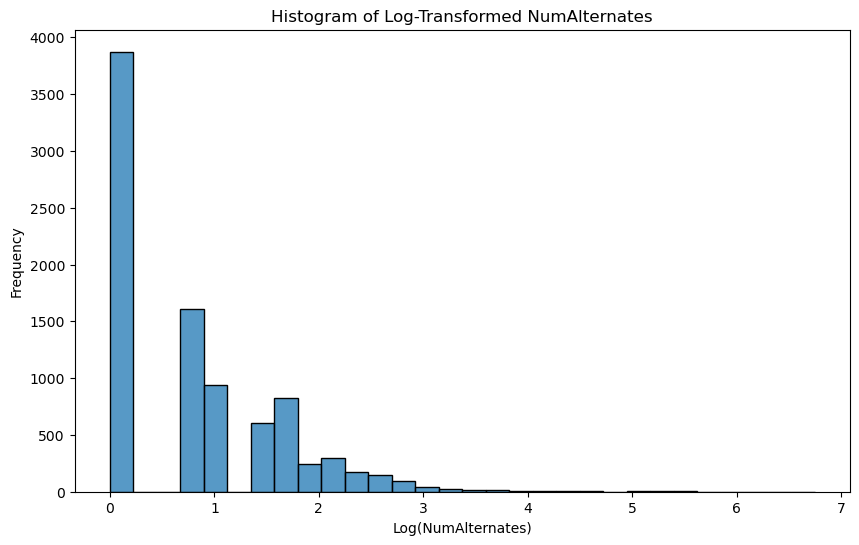

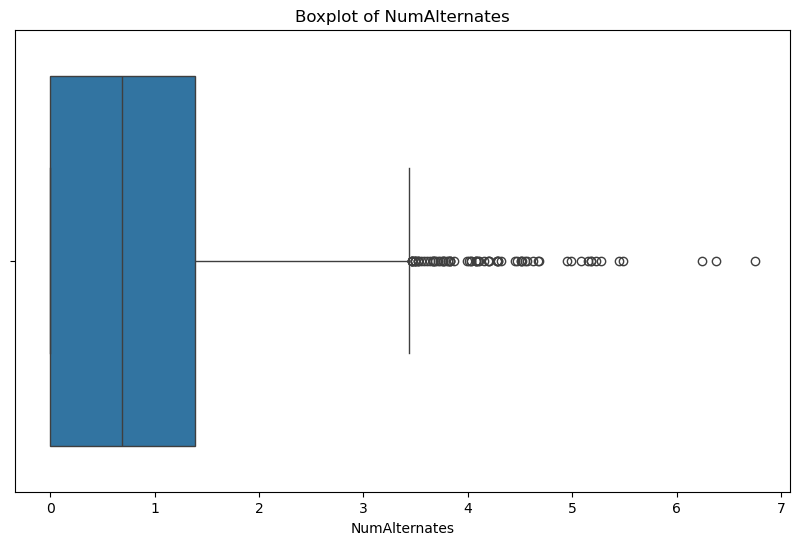

Number of outliers in NumAlternates: 74
47       3.828641
439      3.637586
646      3.806662
806      5.087596
1085     4.317488
           ...   
20940    3.583519
21325    4.290459
21481    5.176150
21483    3.713572
21820    4.077537
Name: NumAlternates, Length: 74, dtype: float64


In [22]:
# number of alternates analysis
NumAlternates = df["NumAlternates"]
# zeros count
NumAlternates_zeros = (NumAlternates == 0).sum()
print(f"Number of zero values in NumAlternates: {NumAlternates_zeros}. Percentage of zeros: {NumAlternates_zeros / len(NumAlternates) * 100:.2f}%")
# histogram
plt.figure(figsize=(10, 6))
sns.histplot(NumAlternates, bins=30)
plt.title('Histogram of NumAlternates')
plt.xlabel('NumAlternates')
plt.ylabel('Frequency')
plt.show()
# logarithmic transformation
NumAlternates_no_zeros = NumAlternates[NumAlternates > 0]
NumAlternates_log = np.log(NumAlternates_no_zeros)
# histogram of log-transformed data
plt.figure(figsize=(10, 6))
sns.histplot(NumAlternates_log, bins=30)
plt.title('Histogram of Log-Transformed NumAlternates')
plt.xlabel('Log(NumAlternates)')
plt.ylabel('Frequency')
plt.show()
# boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=NumAlternates_log)
plt.title('Boxplot of NumAlternates')
plt.xlabel('NumAlternates')
plt.show()
# outliers detection
Q1 = NumAlternates_log.quantile(0.25)
Q3 = NumAlternates_log.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = NumAlternates_log[(NumAlternates_log < lower_bound) | (NumAlternates_log > upper_bound)]
print(f"Number of outliers in NumAlternates: {len(outliers)}")
print(outliers)

Number of zero values in NumExpansions: 16337. Percentage of zeros: 74.51%


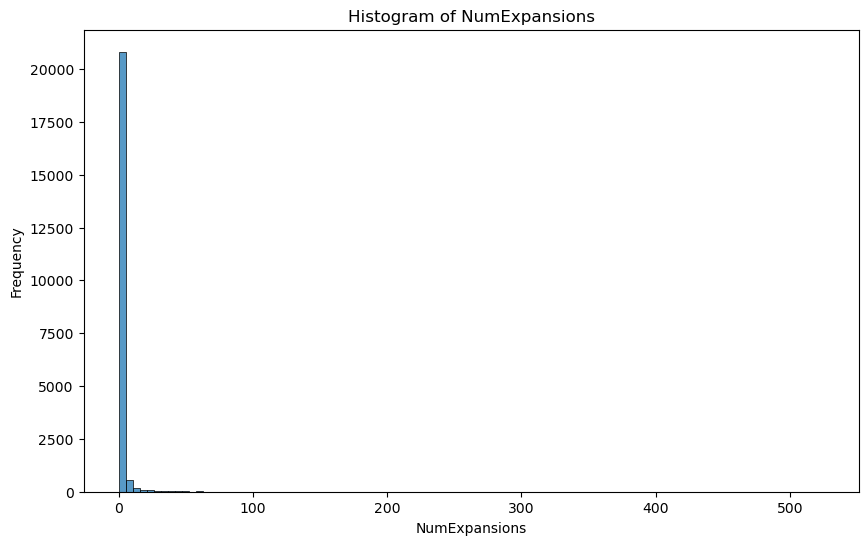

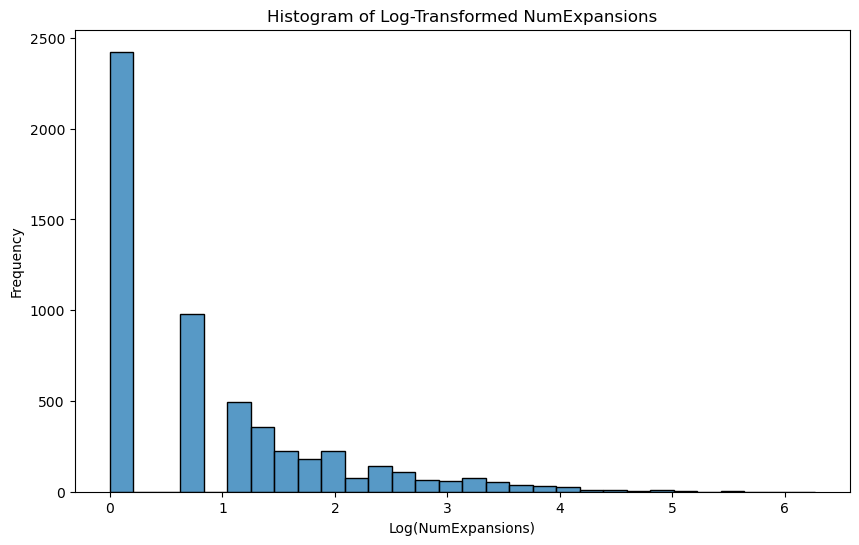

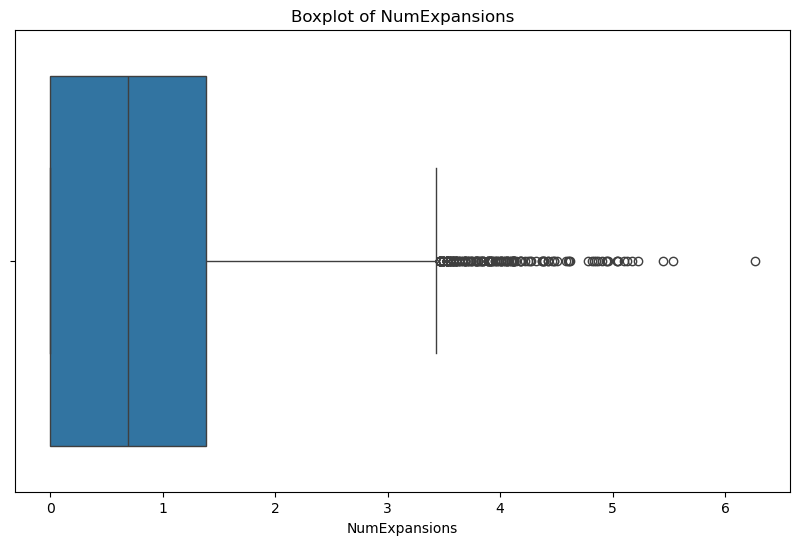

Number of outliers in NumExpansions: 167
65       3.496508
162      3.496508
369      3.465736
746      4.262680
810      4.465908
           ...   
21309    3.610918
21339    3.688879
21355    4.477337
21390    3.806662
21909    3.737670
Name: NumExpansions, Length: 167, dtype: float64


Name  NumExpansions
5481                             Advanced Squad Leader            525
6065                                          Munchkin            169
8196                         Pokémon Trading Card Game            186
8930                         Blood Bowl (2016 Edition)            126
9305             Shadows of Brimstone: Swamps of Death            141
9727                              Magic: The Gathering            131
10134                   Dust Tactics: Revised Core Set            156
10742                                    Anima Tactics            128
11520                                     Age of Steam            124
11887                         BattleTech: Beginner Box            164
12451                                   Ticket to Ride            155
12658                                        Dust 1947            135
12721             The Lord of the Rings: The Card Game            140
14356  Flames of War: The World War II Miniatures Game            102
14642                           Cards Against Humanity            101
16835       Shadows of Brimstone: City of the Ancients            142
16844                                      Carcassonne            155
17108                           Star Trek: Attack Wing            232
20977             BattleTech: A Game of Armored Combat            254
21082                                       BattleTech            119
21159                                     Dust Tactics            177

In [ ]:
# number of expansions analysis
NumExpansions = df["NumExpansions"]
# zeros count
NumExpansions_zeros = (NumExpansions == 0).sum()
print(f"Number of zero values in NumExpansions: {NumExpansions_zeros}. Percentage of zeros: {NumExpansions_zeros / len(NumExpansions) * 100:.2f}%")
# histogram
plt.figure(figsize=(10, 6))
sns.histplot(NumExpansions, bins=100)
plt.title('Histogram of NumExpansions')
plt.xlabel('NumExpansions')
plt.ylabel('Frequency')
plt.show()
# logarithmic transformation
NumExpansions_no_zeros = NumExpansions[NumExpansions > 0]
NumExpansions_log = np.log(NumExpansions_no_zeros)
# histogram of log-transformed data
plt.figure(figsize=(10, 6))
sns.histplot(NumExpansions_log, bins=30)
plt.title('Histogram of Log-Transformed NumExpansions')
plt.xlabel('Log(NumExpansions)')
plt.ylabel('Frequency')
plt.show()
# boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=NumExpansions_log)
plt.title('Boxplot of NumExpansions')
plt.xlabel('NumExpansions')
plt.show()
# outliers detection
Q1 = NumExpansions_log.quantile(0.25)
Q3 = NumExpansions_log.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = NumExpansions_log[(NumExpansions_log < lower_bound) | (NumExpansions_log > upper_bound)]
print(f"Number of outliers in NumExpansions: {len(outliers)}")
print(outliers)
df[df["NumExpansions"] > 100][["Name", "NumExpansions"]]

Number of zero values in NumImplementations: 17052. Percentage of zeros: 77.77%


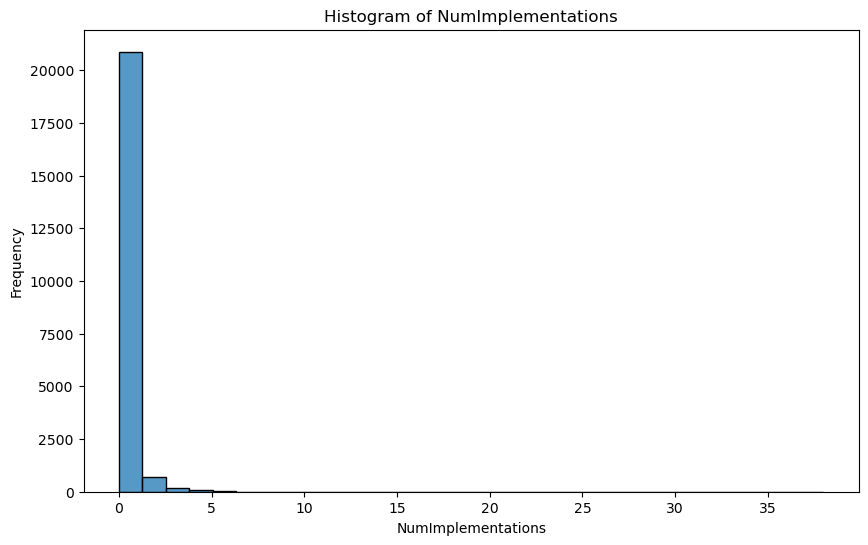

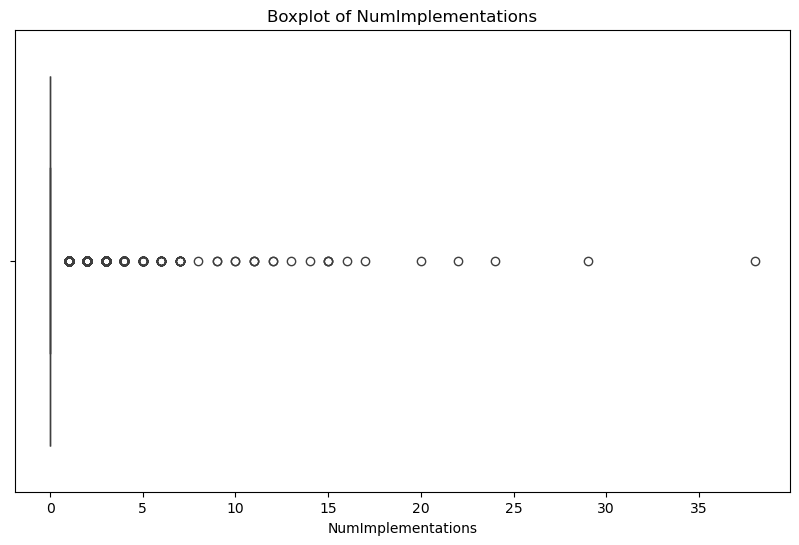

Number of outliers in NumImplementations: 4873
6        1
8        1
15       1
23       1
35       1
        ..
21908    2
21909    2
21911    1
21913    2
21918    1
Name: NumImplementations, Length: 4873, dtype: int64


Name  NumImplementations
9710                      Fluxx                  38
16365                     Catan                  29
6065                   Munchkin                  24
646                        Clue                  22
2460                       Risk                  20
...                         ...                 ...
12162  Kodama: The Tree Spirits                   2
12195                   Stworze                   2
12199          Against All Odds                   2
4683              The Chameleon                   2
21913     Battle Line: Medieval                   2

[1041 rows x 2 columns]

In [24]:
# number of reimplementations analysis
NumImplementations = df["NumImplementations"]
# zeros count
NumImplementations_zeros = (NumImplementations == 0).sum()
print(f"Number of zero values in NumImplementations: {NumImplementations_zeros}. Percentage of zeros: {NumImplementations_zeros / len(NumImplementations) * 100:.2f}%")
# histogram
plt.figure(figsize=(10, 6))
sns.histplot(NumImplementations, bins=30)
plt.title('Histogram of NumImplementations')
plt.xlabel('NumImplementations')
plt.ylabel('Frequency')
plt.show()
# boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=NumImplementations)
plt.title('Boxplot of NumImplementations')
plt.xlabel('NumImplementations')
plt.show()
# outliers detection
Q1 = NumImplementations.quantile(0.25)
Q3 = NumImplementations.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = NumImplementations[(NumImplementations < lower_bound) | (NumImplementations > upper_bound)]
print(f"Number of outliers in NumImplementations: {len(outliers)}")
print(outliers)
df[df["NumImplementations"] > 1][["Name", "NumImplementations"]].sort_values(by="NumImplementations", ascending=False)

Number of zero values in IsReimplementation: 19365. Percentage of zeros: 88.32%
Number of one values in IsReimplementation: 2560. Percentage of ones: 11.68%
2313
p= 0.11676168757126568


/var/folders/pw/y3ztzc9n5ns3pn2xk2j59d2w0000gp/T/ipykernel_1412/172208845.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=IsReimplementation, palette='viridis')


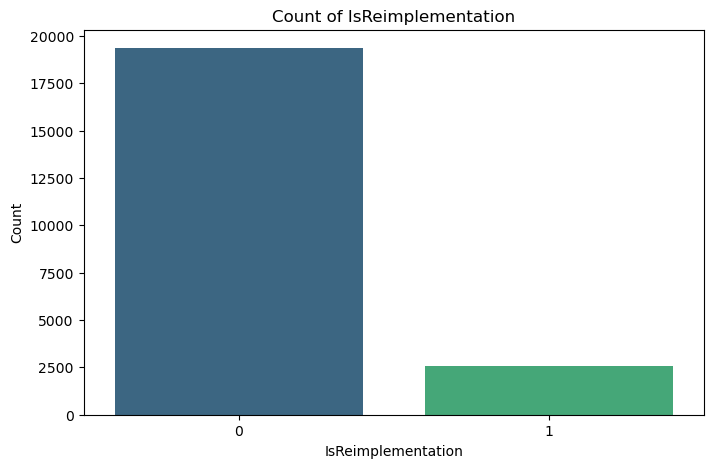

In [25]:
#IsReimplementation analysis

IsReimplementation = df["IsReimplementation"]
IsReimplementation_zeros = (IsReimplementation == 0).sum()
print(f"Number of zero values in IsReimplementation: {IsReimplementation_zeros}. Percentage of zeros: {IsReimplementation_zeros / len(IsReimplementation) * 100:.2f}%")
IsReimplementation_ones = (IsReimplementation == 1).sum()
print(f"Number of one values in IsReimplementation: {IsReimplementation_ones}. Percentage of ones: {IsReimplementation_ones / len(IsReimplementation) * 100:.2f}%")
df[(df["IsReimplementation"] == 1)& (df["NumImplementations"]== 0)][["Name", "IsReimplementation", "NumImplementations"]].count()
print(len(df[(df["IsReimplementation"] == 0) & (df["NumImplementations"]!= 0)]))
print("p=", len(df[df["IsReimplementation"] == 1]) / len(df))
# bar chart
plt.figure(figsize=(8, 5))
sns.countplot(x=IsReimplementation, palette='viridis')
plt.title('Count of IsReimplementation')
plt.xlabel('IsReimplementation')
plt.ylabel('Count')
plt.show()

Number of null values in Family: 15262. Percentage of nulls: 69.61%
Number of zero values in Family: 0. Percentage of zero values: 0.00%
Top 10 most frequent families:
Family
18xx                                      103
Monopoly (Official)                        73
Trivial Pursuit                            67
Werewolf / Mafi                            58
Wallet Games (Button Shy)                  45
Two-player games (Kosmos)                  44
Cluedo / Clue (Parker Brothers, et al)     42
Munchkin                                   41
UNO                                        39
Monopoly-Lik                               39
Name: count, dtype: int64
Probability of having a family: 0.3039


/var/folders/pw/y3ztzc9n5ns3pn2xk2j59d2w0000gp/T/ipykernel_1412/1852027388.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Has_family"], palette='pastel')


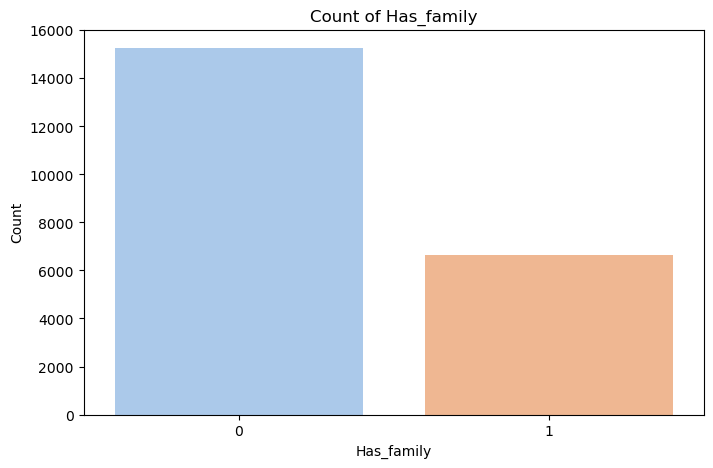

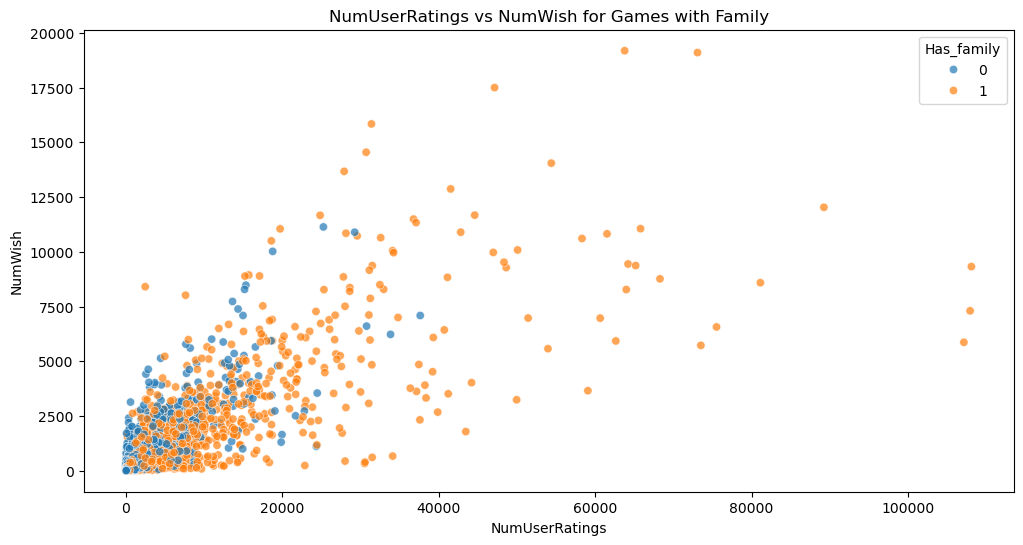

Top 10 Families by NumUserRatings:
Family
Alea Big Box                                  243331
Pandemic                                      210317
Harvest (Uwe Rosenberg)                       203072
Ticket to Ride (Official)                     186233
Arkham Horror Files (Fantasy Flight Games)    173346
Two-player games (Kosmos)                     164700
Carcassonn                                    160108
7 Wonders                                     159371
Catan                                         143924
Fantasy Flight Silver Lin                     134477
Name: NumUserRatings, dtype: int64

Top 10 Families by NumWish:
Family
Harvest (Uwe Rosenberg)                       64742
Alea Big Box                                  46560
Arkham Horror Files (Fantasy Flight Games)    43412
Pandemic                                      41523
Two-player games (Kosmos)                     26795
Gloomhaven                                    24685
Ticket to Ride (Official)                    

In [26]:
# Family analysis
Family = df["Family"]
# zero and null values analysis
Family_nulls = Family.isnull().sum()
print(f"Number of null values in Family: {Family_nulls}. Percentage of nulls: {Family_nulls / len(Family) * 100:.2f}%")
Family_zeros = (Family == 0).sum()
print(f"Number of zero values in Family: {Family_zeros}. Percentage of zero values: {Family_zeros / len(Family) * 100:.2f}%")
# top 10 most frequent families
print("Top 10 most frequent families:")
print(Family.value_counts().head(10))
# probability of having a family
p = len(df[df["Family"].notnull()]) / len(df)
print(f"Probability of having a family: {p:.4f}")
# Create a new binary column 'Has_family' indicating if a family is present
df["Has_family"] = df["Family"].notnull().astype(int)
df["Has_family"]
df["Has_family"].value_counts()
# bar chart for Has_family
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Has_family"], palette='pastel')
plt.title('Count of Has_family')
plt.xlabel('Has_family')
plt.ylabel('Count')
plt.show()
# plot total NumUserRatings and NumWish of games belonging to a family or not
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df,
                x="NumUserRatings",
                y="NumWish",
                hue="Has_family",
                palette="tab10",
                alpha=0.7)
plt.title('NumUserRatings vs NumWish for Games with Family')
plt.xlabel('NumUserRatings')
plt.ylabel('NumWish')
plt.show()
# games with family have generally higher NumUserRatings and NumWish -> family affiliation seems to positively influence user engagement
# For this reason, Has_family can be used as a feature in predictive modeling

# NumUserRatings and NumWish group by family
df_family = df[df["Family"].notnull()]
num_user_ratings_by_family = df_family.groupby("Family")["NumUserRatings"].sum().sort_values(ascending=False).head(10)
num_wish_by_family = df_family.groupby("Family")["NumWish"].sum().sort_values(ascending=False).head(10)
print("Top 10 Families by NumUserRatings:")
print(num_user_ratings_by_family)
print("\nTop 10 Families by NumWish:")
print(num_wish_by_family)




Number of null values in Kickstarter: 0. Percentage of nulls: 0.00%
Number of zero values in Kickstarter: 18563. Percentage of zero values: 84.67%
Number of one values in Kickstarter: 3362. Percentage of ones: 15.33%
Probability of being kickstarted: 0.1533


/var/folders/pw/y3ztzc9n5ns3pn2xk2j59d2w0000gp/T/ipykernel_1412/2143284142.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=Kickstarter, palette='muted')


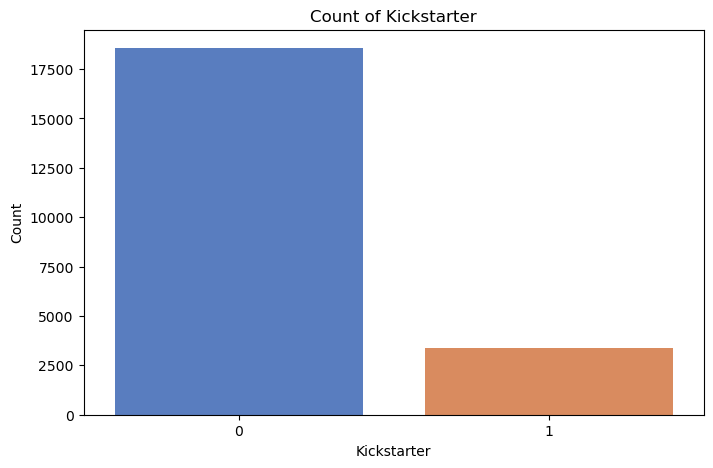

In [27]:
# Kickstarter analysis
Kickstarter = df["Kickstarted"]
Kickstarter_zeros = (Kickstarter==0).sum()
# null and zero values analysis
Kickstarter_nulls = Kickstarter.isnull().sum()
print(f"Number of null values in Kickstarter: {Kickstarter_nulls}. Percentage of nulls: {Kickstarter_nulls / len(Kickstarter) * 100:.2f}%")
print(f"Number of zero values in Kickstarter: {Kickstarter_zeros}. Percentage of zero values: {Kickstarter_zeros / len(Kickstarter) * 100:.2f}%")
Kickstarter_ones = (Kickstarter == 1).sum()
print(f"Number of one values in Kickstarter: {Kickstarter_ones}. Percentage of ones: {Kickstarter_ones / len(Kickstarter) * 100:.2f}%")
# probability of being kickstarted
p = len(df[df["Kickstarted"] == 1]) / len(df)
print(f"Probability of being kickstarted: {p:.4f}")
# bar chart for Kickstarter
plt.figure(figsize=(8, 5))
sns.countplot(x=Kickstarter, palette='muted')
plt.title('Count of Kickstarter')
plt.xlabel('Kickstarter')
plt.ylabel('Count')
plt.show()

In [28]:
# Rank in strategy games analysis
# check how many games have rank 0 or null
not_strategic_games = ((df["Cat:Strategy"]==0).sum() + df["Cat:Strategy"].isnull().sum())
not_ranked_strategic_games = ((df["Rank:strategygames"]==0).sum() + df["Rank:strategygames"].isnull().sum())
print(f"Number of non-strategic games (Cat:Strategy == 0 or null): {not_strategic_games}")
print(f"Number of non-ranked strategic games (Rank:strategygames == 0 or null): {not_ranked_strategic_games}")
# get the ranks of non-strategic games
ranks_not_strategic_games = df[df["Cat:Strategy"]==0]["Rank:strategygames"]
print("Ranks of non-strategic games:")
print(ranks_not_strategic_games.sort_values(ascending=True).head(10))
len(df[df["Rank:strategygames"]==21926])
# equal rank values
eqdf = df.groupby("Rank:strategygames").size().reset_index(name='counts').sort_values(by='counts', ascending=False).head(10)
print("Top 10 most common Rank:strategygames values:")
print(eqdf)
# reason why
len(df[(df["Rank:strategygames"]==21926) & (df["Cat:Strategy"]==0)])/len(df[df["Rank:strategygames"]==21926])*100
len(df[(df["Rank:strategygames"]==21926) & (df["Cat:Strategy"]==1)])/len(df[df["Rank:strategygames"]==21926])*100
print(f"Percentage of non-strategic games among those with Rank:strategygames == 21926: {len(df[(df['Rank:strategygames']==21926) & (df['Cat:Strategy']==0)]) / len(df[df['Rank:strategygames']==21926]) * 100:.2f}%")
print(f"Percentage of strategic games among those with Rank:strategygames == 21926: {len(df[(df['Rank:strategygames']==21926) & (df['Cat:Strategy']==1)]) / len(df[df['Rank:strategygames']==21926]) * 100:.2f}%")
# CONLUSION: non-strategic games have rank 21926 -> rank 21926 means "not ranked"
real_strategic_games = df[df["Cat:Strategy"]==1]["Rank:strategygames"]
# latest rank value for strategic games
print(f"Maximum rank value for strategic games: {real_strategic_games.max()}. Total number of real strategic games: {len(real_strategic_games)}. total number of strategic games: {len(df[df['Cat:Strategy']==1])}")
# since the maximum is higher than the length of real strategic games, it means that some ranks are not assigned or are missing
ordered_real_strategic_games = real_strategic_games.sort_values(ascending=True)
for i in range(2319):
    if i+1 != ordered_real_strategic_games.iloc[i]:
        print(f"Rank {i+1}: Not Ranked")
        print(f"Rank {i+1}: {ordered_real_strategic_games.iloc[i]}")


Number of non-strategic games (Cat:Strategy == 0 or null): 19606
Number of non-ranked strategic games (Rank:strategygames == 0 or null): 0
Ranks of non-strategic games:
0        21926
14649    21926
14647    21926
14645    21926
14644    21926
14642    21926
14641    21926
14639    21926
14638    21926
14637    21926
Name: Rank:strategygames, dtype: int64
Top 10 most common Rank:strategygames values:
      Rank:strategygames  counts
2319               21926   19606
1523                1527       1
1543                1547       1
1544                1548       1
1545                1549       1
1546                1550       1
1547                1551       1
1548                1552       1
1549                1553       1
1550                1554       1
Percentage of non-strategic games among those with Rank:strategygames == 21926: 100.00%
Percentage of strategic games among those with Rank:strategygames == 21926: 0.00%
Maximum rank value for strategic games: 2328. Total number of r

In [29]:
# Rank abstracts games analysis
abstract_games = df[df["Cat:Abstract"]==0]["Rank:abstracts"]
print("Ranks of non-abstract games:")
print(abstract_games.sort_values(ascending=True).head(10))
print(len(df[df["Rank:abstracts"]==21926]))
# CONLUSION: non-abstract games have rank 21926 -> rank 21926 means "not ranked"
real_abstract_games = df[df["Cat:Abstract"]==1]["Rank:abstracts"]
# latest rank value for strategic games
print(f"Maximum rank value for strategic games: {real_abstract_games.max()}. Total number of real strategic games: {len(real_abstract_games)}. total number of strategic games: {len(df[df['Cat:Abstract']==1])}")


Ranks of non-abstract games:
0        21926
14617    21926
14616    21926
14615    21926
14613    21926
14612    21926
14611    21926
14609    21926
14618    21926
14608    21926
Name: Rank:abstracts, dtype: int64
20810
Maximum rank value for strategic games: 1116. Total number of real strategic games: 1115. total number of strategic games: 1115


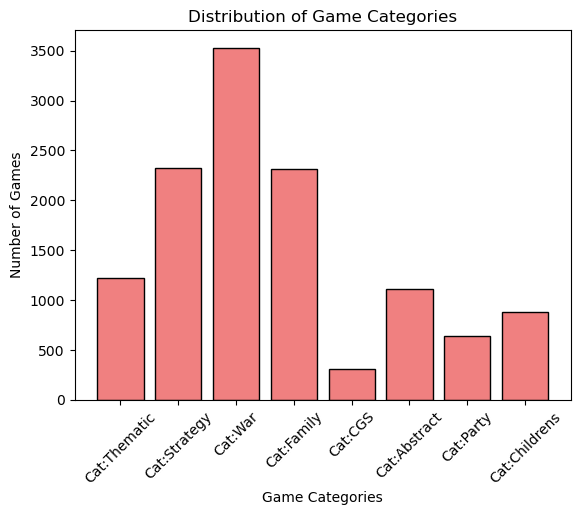

12328
Overlaps between categories:
{('Cat:Thematic', 'Cat:Strategy'): 236, ('Cat:Thematic', 'Cat:War'): 157, ('Cat:Thematic', 'Cat:Family'): 116, ('Cat:Thematic', 'Cat:CGS'): 16, ('Cat:Thematic', 'Cat:Abstract'): 2, ('Cat:Thematic', 'Cat:Party'): 38, ('Cat:Strategy', 'Cat:War'): 109, ('Cat:Strategy', 'Cat:Family'): 371, ('Cat:Strategy', 'Cat:CGS'): 27, ('Cat:Strategy', 'Cat:Abstract'): 46, ('Cat:Strategy', 'Cat:Party'): 9, ('Cat:War', 'Cat:Family'): 7, ('Cat:War', 'Cat:CGS'): 20, ('Cat:War', 'Cat:Abstract'): 14, ('Cat:War', 'Cat:Party'): 1, ('Cat:War', 'Cat:Childrens'): 5, ('Cat:Family', 'Cat:Abstract'): 120, ('Cat:Family', 'Cat:Party'): 156, ('Cat:Family', 'Cat:Childrens'): 112, ('Cat:CGS', 'Cat:Abstract'): 2, ('Cat:Abstract', 'Cat:Party'): 4, ('Cat:Abstract', 'Cat:Childrens'): 24, ('Cat:Party', 'Cat:Childrens'): 8}
1600
Number of games that do not belong to any category: 11184
Percentage of games that do not belong to any category: 51.01%


In [30]:
''' bar chart for categories
Cat:Thematic		Binary is in Thematic category
	Cat:Strategy		Binary is in Strategy category
	Cat:War			Binary is in War category
	Cat:Family		Binary is in Family category
	Cat:CGS			Binary is in Card Games category
	Cat:Abstract		Binary is in Abstract category
	Cat:Party		Binary is in Party category
	Cat:Childrens		Binary is in Childrens category'''
categories = ["Cat:Thematic", "Cat:Strategy", "Cat:War", "Cat:Family", "Cat:CGS", "Cat:Abstract", "Cat:Party", "Cat:Childrens"]
plt.bar(categories, [df[cat].sum() for cat in categories], color='lightcoral', edgecolor='black')
plt.xticks(rotation=45)
plt.xlabel('Game Categories')
plt.ylabel('Number of Games')
plt.title('Distribution of Game Categories')
plt.show()

# verifying categories cover all games
all = 0
for cat in categories:
    all += df[cat].sum()
print(all)
all==len(df)
# looking for possible overlaps between categories
overlaps = {}
for i in range(len(categories)):
    for j in range(i+1, len(categories)):
        cat1 = categories[i]
        cat2 = categories[j]
        overlap_count = len(df[(df[cat1] == 1) & (df[cat2] == 1)])
        if overlap_count > 0:
               overlaps[(cat1, cat2)] = overlap_count
print("Overlaps between categories:")
print(overlaps)
print(sum(overlaps.values()))
# looking for games that do not belong to any category
no_category_games = df[(df[categories].sum(axis=1) == 0)]
print(f"Number of games that do not belong to any category: {len(no_category_games)}")
print(f"Percentage of games that do not belong to any category: {len(no_category_games) / len(df) * 100:.2f}%")

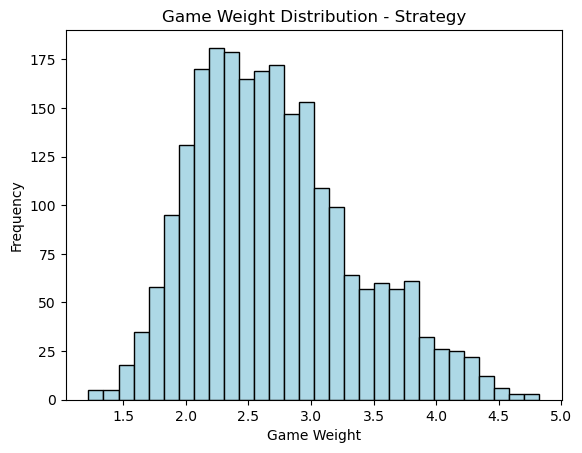

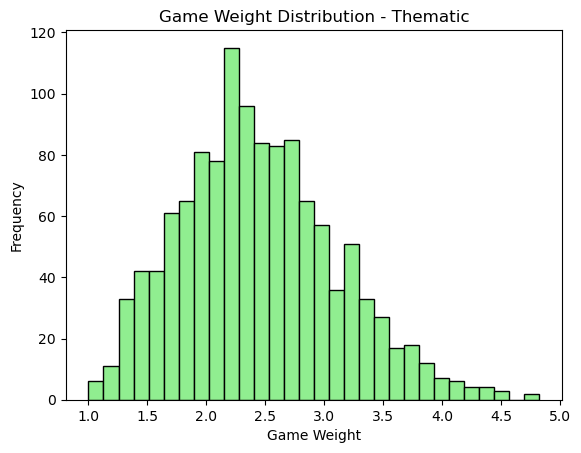

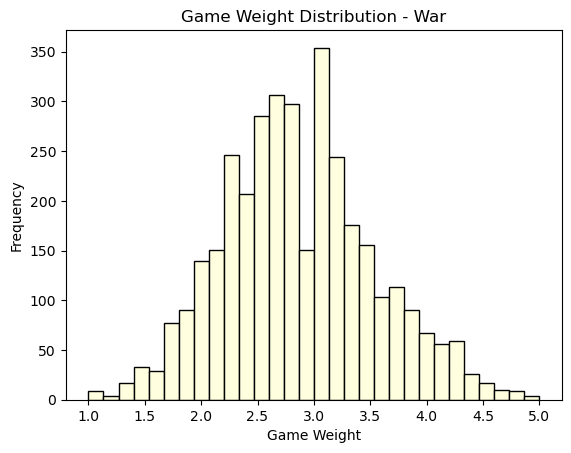

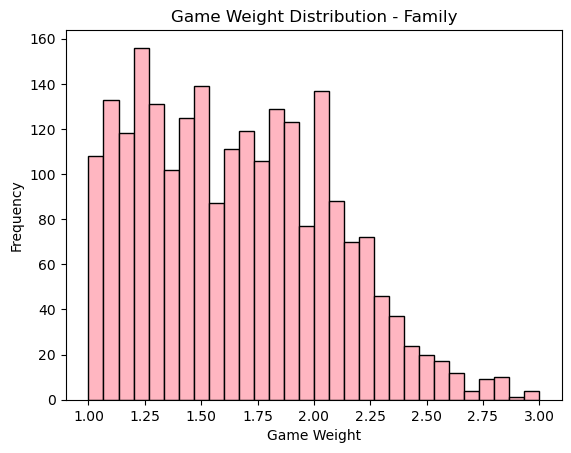

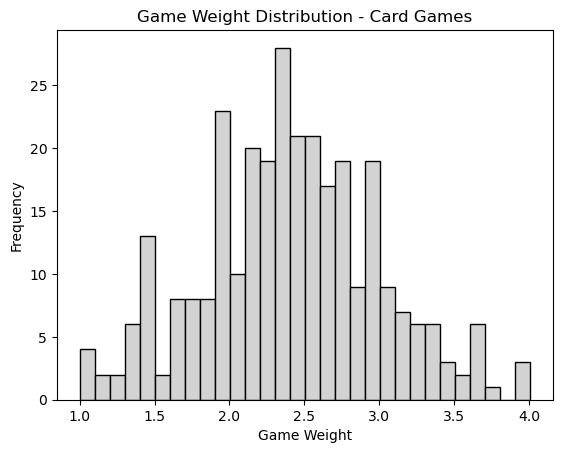

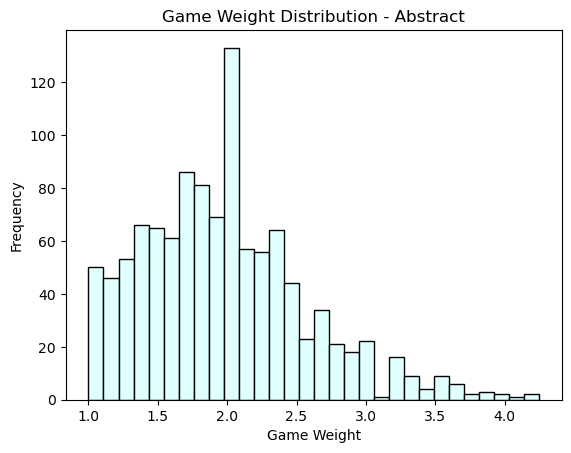

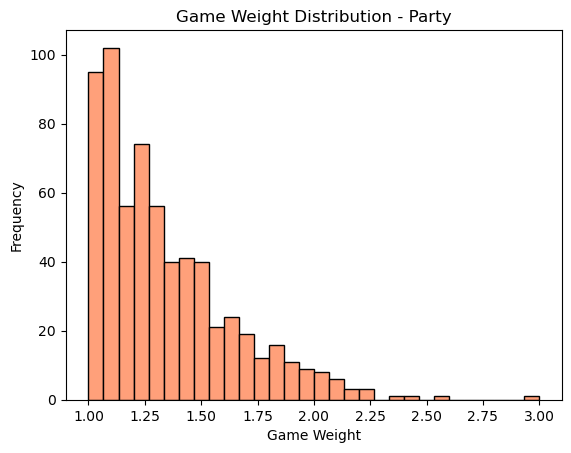

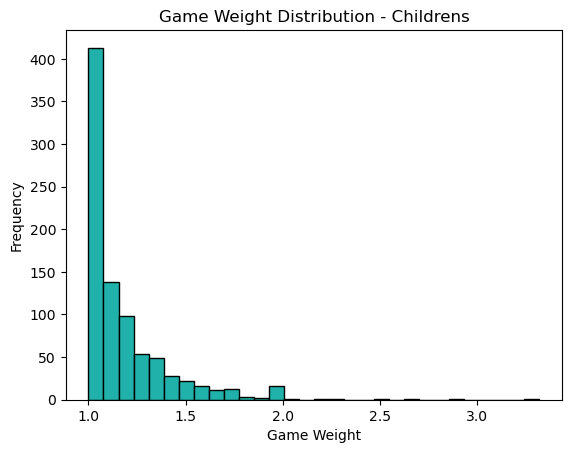

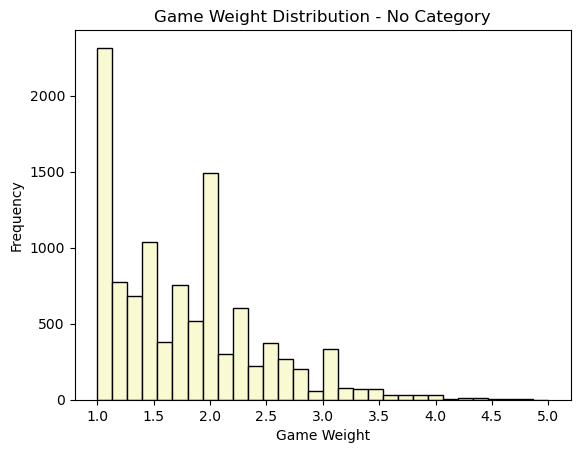

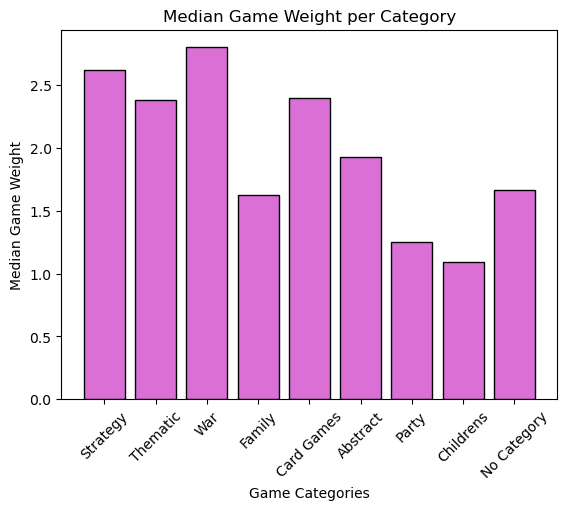

In [31]:
# weight analysis per category
# 1. Strategy
df_strategy_without_zero_weight = df[(df["GameWeight"] > 0) & (df["Cat:Strategy"] != 0)]
plt.hist(df_strategy_without_zero_weight["GameWeight"], bins=30, color='lightblue', edgecolor='black')
plt.title("Game Weight Distribution - Strategy")
plt.xlabel("Game Weight")
plt.ylabel("Frequency")
plt.show()
df_strategy_without_zero_weight["GameWeight"].mean()
# 2. Thematic
df_thematic_without_zero_weight = df[(df["GameWeight"] > 0) & (df["Cat:Thematic"] != 0)]
plt.hist(df_thematic_without_zero_weight["GameWeight"], bins=30, color='lightgreen', edgecolor='black')
plt.title("Game Weight Distribution - Thematic")
plt.xlabel("Game Weight")
plt.ylabel("Frequency")
plt.show()
df_thematic_without_zero_weight["GameWeight"].mean()
# 3. War
df_war_without_zero_weight = df[(df["GameWeight"] > 0) & (df["Cat:War"] != 0)]
plt.hist(df_war_without_zero_weight["GameWeight"], bins=30, color='lightyellow', edgecolor='black')
plt.title("Game Weight Distribution - War")
plt.xlabel("Game Weight")
plt.ylabel("Frequency")
plt.show()
df_war_without_zero_weight["GameWeight"].mean()
# 4. Family
df_family_without_zero_weight = df[(df["GameWeight"] > 0) & (df["Cat:Family"] != 0)]
plt.hist(df_family_without_zero_weight["GameWeight"], bins=30, color='lightpink', edgecolor='black')
plt.title("Game Weight Distribution - Family")
plt.xlabel("Game Weight")
plt.ylabel("Frequency")
plt.show()
df_family_without_zero_weight["GameWeight"].mean()
# 5. Card Games
df_cgs_without_zero_weight = df[(df["GameWeight"] > 0) & (df["Cat:CGS"] != 0)]
plt.hist(df_cgs_without_zero_weight["GameWeight"], bins=30, color='lightgray', edgecolor='black')
plt.title("Game Weight Distribution - Card Games")
plt.xlabel("Game Weight")
plt.ylabel("Frequency")
plt.show()
df_cgs_without_zero_weight["GameWeight"].mean()
# 6. Abstract
df_abstract_without_zero_weight = df[(df["GameWeight"] > 0) & (df["Cat:Abstract"] != 0)]
plt.hist(df_abstract_without_zero_weight["GameWeight"], bins=30, color='lightcyan', edgecolor='black')
plt.title("Game Weight Distribution - Abstract")
plt.xlabel("Game Weight")
plt.ylabel("Frequency")
plt.show()
df_abstract_without_zero_weight["GameWeight"].mean()
# 7. Party
df_party_without_zero_weight = df[(df["GameWeight"] > 0) & (df["Cat:Party"] != 0)]
plt.hist(df_party_without_zero_weight["GameWeight"], bins=30, color='lightsalmon', edgecolor='black')
plt.title("Game Weight Distribution - Party")
plt.xlabel("Game Weight")
plt.ylabel("Frequency")
plt.show()
df_party_without_zero_weight["GameWeight"].mean()
# 8. Childrens
df_childrens_without_zero_weight = df[(df["GameWeight"] > 0) & (df["Cat:Childrens"] != 0)]
plt.hist(df_childrens_without_zero_weight["GameWeight"], bins=30, color='lightseagreen', edgecolor='black')
plt.title("Game Weight Distribution - Childrens")
plt.xlabel("Game Weight")
plt.ylabel("Frequency")
plt.show()
df_childrens_without_zero_weight["GameWeight"].mean()
# 9. No category
categories = ["Cat:Thematic", "Cat:Strategy", "Cat:War", "Cat:Family", "Cat:CGS", "Cat:Abstract", "Cat:Party", "Cat:Childrens"]
df_nocategory_without_zero_weight = df[(df["GameWeight"] > 0) & (df[categories].sum(axis=1) == 0)]
plt.hist(df_nocategory_without_zero_weight["GameWeight"], bins=30, color='lightgoldenrodyellow', edgecolor='black')
plt.title("Game Weight Distribution - No Category")
plt.xlabel("Game Weight")
plt.ylabel("Frequency")
plt.show()
df_nocategory_without_zero_weight["GameWeight"].mean()
# median weights per category
median_weights = {
    "Strategy": df_strategy_without_zero_weight["GameWeight"].median(),
    "Thematic": df_thematic_without_zero_weight["GameWeight"].median(),
    "War": df_war_without_zero_weight["GameWeight"].median(),
    "Family": df_family_without_zero_weight["GameWeight"].median(),
    "Card Games": df_cgs_without_zero_weight["GameWeight"].median(),
    "Abstract": df_abstract_without_zero_weight["GameWeight"].median(),
    "Party": df_party_without_zero_weight["GameWeight"].median(),
    "Childrens": df_childrens_without_zero_weight["GameWeight"].median(),
    "No Category": df_nocategory_without_zero_weight["GameWeight"].median()
}
plt.bar(median_weights.keys(), median_weights.values(), color='orchid', edgecolor='black')
plt.xticks(rotation=45)
plt.xlabel('Game Categories')
plt.ylabel('Median Game Weight')
plt.title('Median Game Weight per Category')
plt.show()


## Columns 30-45

In [32]:
# Columns 30-45 -> Lore
columns_30_45 = df.columns[31:46]
columns_30_45

Index(['Rank:familygames', 'Rank:thematic', 'Rank:cgs', 'Rank:wargames',
       'Rank:partygames', 'Rank:childrensgames', 'Cat:Thematic',
       'Cat:Strategy', 'Cat:War', 'Cat:Family', 'Cat:CGS', 'Cat:Abstract',
       'Cat:Party', 'Cat:Childrens', 'Rating'],
      dtype='object')

In [33]:
#basic statistics over the rank columns
rank_cols = [col for col in df.columns if col.startswith('Rank')]
df[rank_cols].describe()


Rank:strategygames  Rank:abstracts  Rank:familygames  Rank:thematic  \
count        21925.000000    21925.000000      21925.000000   21925.000000   
mean         19729.826956    20839.347184      19732.270011   20736.185815   
std           6389.614077     4695.170448       6387.089598    4893.928466   
min              1.000000        1.000000          1.000000       1.000000   
25%          21926.000000    21926.000000      21926.000000   21926.000000   
50%          21926.000000    21926.000000      21926.000000   21926.000000   
75%          21926.000000    21926.000000      21926.000000   21926.000000   
max          21926.000000    21926.000000      21926.000000   21926.000000   

           Rank:cgs  Rank:wargames  Rank:partygames  Rank:childrensgames  
count  21925.000000   21925.000000     21925.000000         21925.000000  
mean   21625.086796   18680.185678     21295.352201         21062.680274  
std     2542.033794    7420.906104      3637.139987          4219.776597  
min        1.000000       1.000000         1.000000             1.000000  
25%    21926.000000   21926.000000     21926.000000         21926.000000  
50%    21926.000000   21926.000000     21926.000000         21926.000000  
75%    21926.000000   21926.000000     21926.000000         21926.000000  
max    21926.000000   21926.000000     21926.000000         21926.000000

In [34]:
#looking for missing values
df[rank_cols].isna().sum()


Rank:strategygames     0
Rank:abstracts         0
Rank:familygames       0
Rank:thematic          0
Rank:cgs               0
Rank:wargames          0
Rank:partygames        0
Rank:childrensgames    0
dtype: int64

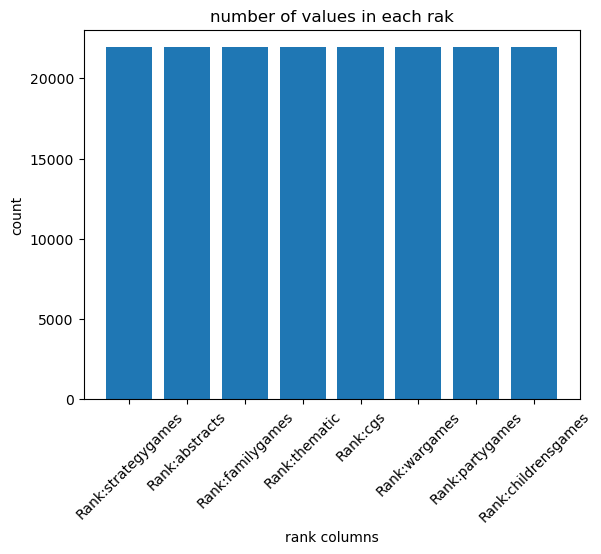

In [35]:
#ranks distribution (these columns are wierd!!)

rank_counts = df[rank_cols].count()


plt.bar(rank_counts.index, rank_counts.values)
plt.title('number of values in each rak')
plt.xlabel('rank columns')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()


In [36]:
# we exclude 21926

df_filtered = df.copy()
df_filtered[rank_cols] = df_filtered[rank_cols].replace(21926, np.nan)
df_filtered[rank_cols].describe()

Rank:strategygames  Rank:abstracts  Rank:familygames  Rank:thematic  \
count         2319.000000     1115.000000       2316.000000    1224.000000   
mean          1162.268219      558.409865       1158.500000     613.356209   
std            671.934092      322.436313        668.715934     354.634547   
min              1.000000        1.000000          1.000000       1.000000   
25%            580.500000      279.500000        579.750000     306.750000   
50%           1162.000000      558.000000       1158.500000     612.500000   
75%           1743.500000      837.500000       1737.250000     919.250000   
max           2328.000000     1116.000000       2316.000000    1228.000000   

         Rank:cgs  Rank:wargames  Rank:partygames  Rank:childrensgames  
count  303.000000    3530.000000       640.000000            881.00000  
mean   152.000000    1766.090935       321.385938            441.00000  
std     87.612784    1019.586335       185.071723            254.46709  
min      1.000000       1.000000         1.000000              1.00000  
25%     76.500000     883.250000       161.750000            221.00000  
50%    152.000000    1766.500000       321.500000            441.00000  
75%    227.500000    2648.750000       481.250000            661.00000  
max    303.000000    3531.000000       641.000000            881.00000

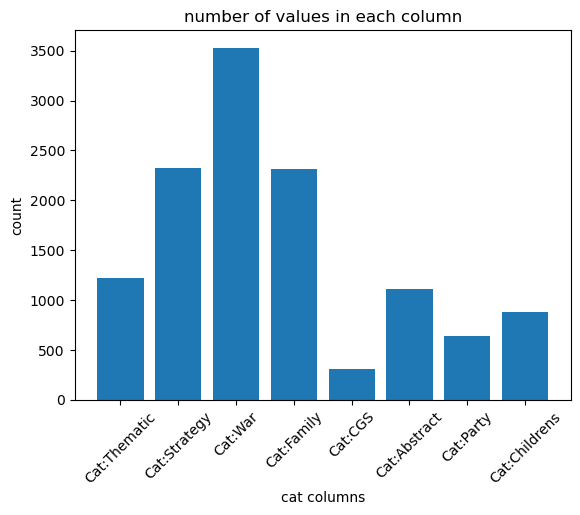

In [37]:
# how many games are in each column
cat_cols = [col for col in df.columns if col.startswith('Cat')]
df_filtered[cat_cols] = df_filtered[cat_cols].replace(0, np.nan)
cat_counts = df_filtered[cat_cols].count()


plt.bar(cat_counts.index, cat_counts.values)
plt.title('number of values in each column')
plt.xlabel('cat columns')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

In [38]:
# percentages of occurrence of medium, low and high ratings
df['Rating'].value_counts(normalize=True) * 100

# games with no ratings
df[df['Rating'].isnull()].sum()

# games with rating = 0
df[df['Rating'] == 0].sum()

BGGId                    0
Name                     0
Description              0
YearPublished            0
GameWeight             0.0
ComWeight              0.0
MinPlayers               0
MaxPlayers               0
ComAgeRec              0.0
LanguageEase           0.0
BestPlayers              0
GoodPlayers              0
NumOwned                 0
NumWant                  0
NumWish                  0
NumWeightVotes           0
MfgPlaytime              0
ComMinPlaytime           0
ComMaxPlaytime           0
MfgAgeRec                0
NumUserRatings           0
NumComments              0
NumAlternates            0
NumExpansions            0
NumImplementations       0
IsReimplementation       0
Family                   0
Kickstarted              0
ImagePath                0
Rank:strategygames       0
Rank:abstracts           0
Rank:familygames         0
Rank:thematic            0
Rank:cgs                 0
Rank:wargames            0
Rank:partygames          0
Rank:childrensgames      0
C

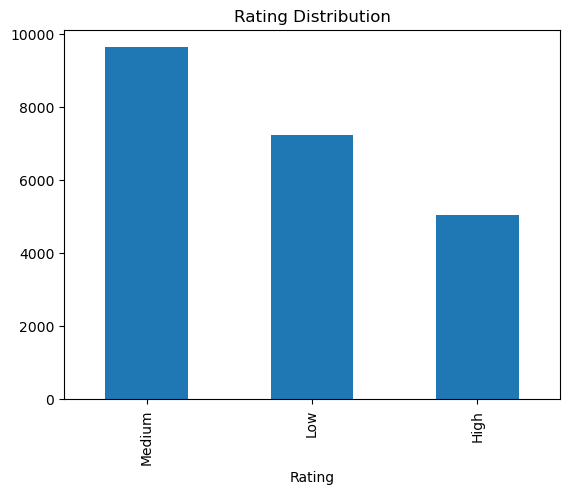

In [39]:
#bar chart creation for this categorical ordinal variable
df['Rating'].value_counts().plot(kind='bar', title='Rating Distribution')
plt.show()


In [40]:
# to convert rating to a numeric value (it may be useful in the future)
df['Rating_num'] = df['Rating'].map({'Low':0, 'Medium':1, 'High':2})

In [41]:
#we loop over the rank cols in order to print the first five, so the best, for each category
for col in rank_cols:
    print(f"Top 5 games per {col}:")
    display(df[['Name', col]].sort_values(by=col, ascending=True).head(5))

Top 5 games per Rank:strategygames:


Name  Rank:strategygames
3519                          Gloomhaven                   1
13446                  Brass: Birmingham                   2
19822          Pandemic Legacy: Season 1                   3
12735  Twilight Imperium: Fourth Edition                   4
2703        Gloomhaven: Jaws of the Lion                   5

Top 5 games per Rank:abstracts:


Name  Rank:abstracts
9700                    Azul               1
6874                Cascadia               2
17134  Azul: Summer Pavilion               3
20166                  YINSH               4
11530              Patchwork               5

Top 5 games per Rank:familygames:


Name  Rank:familygames
5078                              Wingspan                 1
16039                             Everdell                 2
14297                  Lost Ruins of Arnak                 3
9605   The Crew: The Quest for Planet Nine                 4
14913                            Crokinole                 5

Top 5 games per Rank:thematic:


Name  Rank:thematic
3519                          Gloomhaven              1
19822          Pandemic Legacy: Season 1              2
12735  Twilight Imperium: Fourth Edition              3
2703        Gloomhaven: Jaws of the Lion              4
14182               Star Wars: Rebellion              5

Top 5 games per Rank:cgs:


Name  Rank:cgs
11617         Arkham Horror: The Card Game         1
18080      Marvel Champions: The Card Game         2
12456                   Android: Netrunner         3
4712   Summoner Wars: Alliances Master Set         4
16288       Summoner Wars (Second Edition)         5

Top 5 games per Rank:wargames:


Name  Rank:wargames
19915       War of the Ring: Second Edition              1
19890                     Twilight Struggle              2
1481                         Paths of Glory              3
16201                  D-Day at Omaha Beach              4
14931  Sekigahara: The Unification of Japan              5

Top 5 games per Rank:partygames:


Name  Rank:partygames
2610                   Decrypto                1
4067                  Codenames                2
11864                  Just One                3
3050                   Monikers                4
15717  Time's Up! Title Recall!                5

Top 5 games per Rank:childrensgames:


Name  Rank:childrensgames
10067            Zombie Kidz Evolution                    1
14818         Rhino Hero: Super Battle                    2
17857  Ghost Fightin' Treasure Hunters                    3
1599                          ICECOOL2                    4
4884                         Outfoxed!                    5

In [42]:
#creating the real ranking for each category

# creating a dictionary: ranking -> category
rank_cat_map = {
    'Rank:familygames'    : 'Cat:Family',
    'Rank:thematic'       : 'Cat:Thematic',
    'Rank:cgs'            : 'Cat:CGS',
    'Rank:wargames'       : 'Cat:War',
    'Rank:partygames'     : 'Cat:Party',
    'Rank:childrensgames' : 'Cat:Childrens',
    'Rank:abstracts'      : 'Cat:Abstract',
    'Rank:strategygames'  : 'Cat:Strategy',
}

# function to create rankings for each category
def create_in_category_rankings(df, name_col='Name'):
    rankings = {}
    
    for rank_col, cat_col in rank_cat_map.items():
        # skip if columns missing
        if rank_col not in df.columns or cat_col not in df.columns:
            continue

        sub = df.loc[df[cat_col] == 1, [name_col, rank_col]].copy()

        sub = sub.dropna(subset=[rank_col])
        sub = sub.sort_values(by=rank_col, ascending=True).reset_index(drop=True)
        sub.index += 1
        sub.rename(columns={name_col: 'Game', rank_col: 'Rank'}, inplace=True)

        rankings[rank_col] = sub

    
    return rankings


# create the rankings
rankings = create_in_category_rankings(df, name_col='Name')

# show the first 10 games in the Family category
print(rankings['Rank:familygames'])



                                     Game  Rank
1                                Wingspan     1
2                                Everdell     2
3                     Lost Ruins of Arnak     3
4     The Crew: The Quest for Planet Nine     4
5                               Crokinole     5
...                                   ...   ...
2312                              Pachisi  2312
2313                               Sorry!  2313
2314           The Oregon Trail Card Game  2314
2315                             Monopoly  2315
2316                     The Game of Life  2316

[2316 rows x 2 columns]


Unique values ['Low' 'Medium' 'High']

count for category:
Rating
Medium    9644
Low       7245
High      5036
Name: count, dtype: int64

Percentage:
Rating
Medium    43.986317
Low       33.044470
High      22.969213
Name: proportion, dtype: float64

missing values: 0


/var/folders/pw/y3ztzc9n5ns3pn2xk2j59d2w0000gp/T/ipykernel_1412/2345091476.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Rating', order=['Low','Medium','High'], palette='viridis')


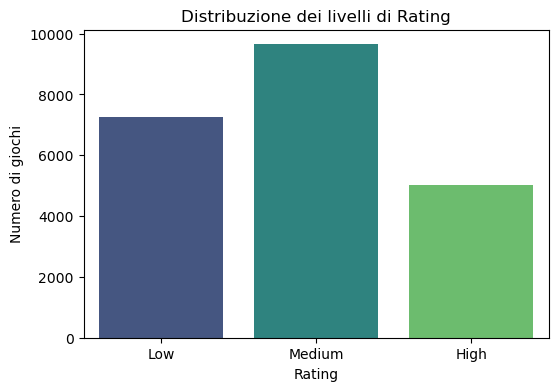

In [43]:
print("Unique values", df['Rating'].unique())
print("\ncount for category:")
print(df['Rating'].value_counts())

print("\nPercentage:")
print(df['Rating'].value_counts(normalize=True) * 100)

print("\nmissing values:", df['Rating'].isna().sum())

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Rating', order=['Low','Medium','High'], palette='viridis')
plt.title('Distribuzione dei livelli di Rating')
plt.xlabel('Rating')
plt.ylabel('Numero di giochi')
plt.show()

In [44]:
# Media di più variabili quantitative per livello di Rating

cols_to_check = [
    'GameWeight',       
    'ComMinPlaytime',    
    'ComMaxPlaytime',    
    'MfgPlaytime',       
    'NumUserRatings',    
    'NumComments',       
    'NumWish',          
    'NumOwned',          
    'NumWeightVotes',   
    'YearPublished',     
    'MinPlayers',        
    'MaxPlayers',       
    'ComAgeRec',         
    'LanguageEase'      
]
rating_summary = df.groupby('Rating')[cols_to_check].mean().round(2)

print("Average values of quantitative variables by Rating level:\n")
print(rating_summary)



Average values of quantitative variables by Rating level:

        GameWeight  ComMinPlaytime  ComMaxPlaytime  MfgPlaytime  \
Rating                                                            
High          2.59           89.45          172.38       172.38   
Low           1.55           43.05           48.04        48.04   
Medium        1.99           65.72           79.67        79.67   

        NumUserRatings  NumComments  NumWish  NumOwned  NumWeightVotes  \
Rating                                                                   
High           2105.01          0.0   683.73   3342.98          105.88   
Low             241.50          0.0    25.72    518.77           17.92   
Medium          678.30          0.0   143.02   1201.66           43.73   

        YearPublished  MinPlayers  MaxPlayers  ComAgeRec  LanguageEase  
Rating                                                                  
High          2002.19        1.77        4.83      11.58        198.03  
Low           1

/var/folders/pw/y3ztzc9n5ns3pn2xk2j59d2w0000gp/T/ipykernel_1412/3994644745.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Rating', y='GameWeight', order=['Low','Medium','High'], palette='magma')


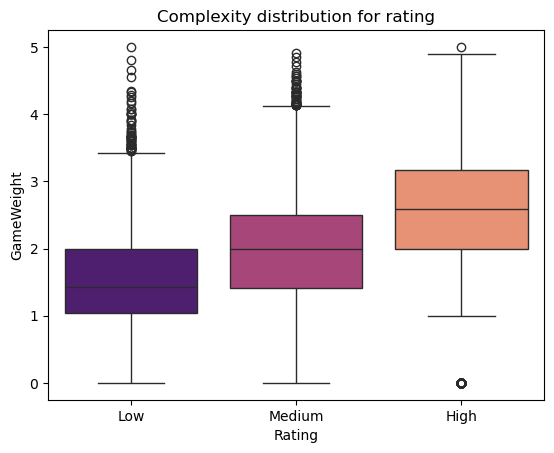

/var/folders/pw/y3ztzc9n5ns3pn2xk2j59d2w0000gp/T/ipykernel_1412/3994644745.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['MfgPlaytime'] < 1000], x='Rating', y='MfgPlaytime', order=['Low','Medium','High'], palette='magma')


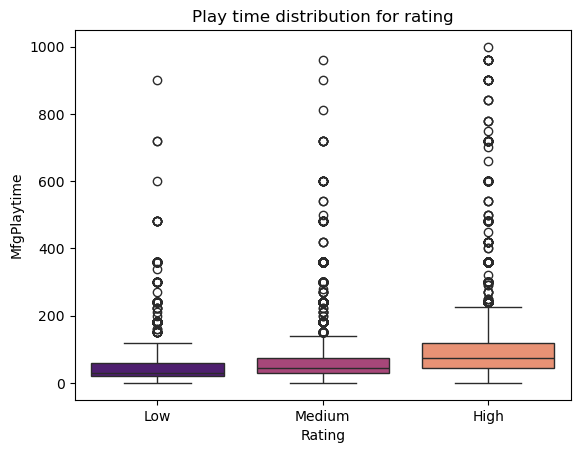

In [45]:
sns.boxplot(data=df, x='Rating', y='GameWeight', order=['Low','Medium','High'], palette='magma')
plt.title('Complexity distribution for rating')
plt.show()

sns.boxplot(data=df[df['MfgPlaytime'] < 1000], x='Rating', y='MfgPlaytime', order=['Low','Medium','High'], palette='magma')
plt.title('Play time distribution for rating')
plt.show()

In [46]:
#checking for missing values
print(df['Rank:strategygames'].isnull().sum())
print(df['Rank:abstracts'].isnull().sum())
print(df['Rank:familygames'].isnull().sum())
print(df['Rank:thematic'].isnull().sum())
print(df['Rank:cgs'].isnull().sum())
print(df['Rank:wargames'].isnull().sum())
print(df['Rank:partygames'].isnull().sum())
print(df['Rank:childrensgames'].isnull().sum())

0
0
0
0
0
0
0
0


In [47]:
#checking fore useless values
print((df['Rank:strategygames'] == 21926).sum())
print((df['Rank:abstracts'] == 21926).sum())
print((df['Rank:familygames'] == 21926).sum())
print((df['Rank:thematic'] == 21926).sum())
print((df['Rank:cgs'] == 21926).sum())
print((df['Rank:wargames'] == 21926).sum())
print((df['Rank:partygames'] == 21926).sum())
print((df['Rank:childrensgames'] == 21926).sum())


19606
20810
19609
20701
21622
18395
21285
21044


In [48]:
#checking for values <= 0
print((df['Rank:strategygames'] <= 0).sum())
print((df['Rank:abstracts'] <= 0).sum())
print((df['Rank:familygames'] <= 0).sum())
print((df['Rank:thematic'] <= 0).sum())
print((df['Rank:cgs'] <= 0).sum())
print((df['Rank:wargames'] <= 0).sum())
print((df['Rank:partygames'] <= 0).sum())
print((df['Rank:childrensgames'] <= 0).sum())

0
0
0
0
0
0
0
0


In [49]:
#are there games ranked in more than one category?
rank_cols = [
    'Rank:strategygames', 'Rank:abstracts', 'Rank:familygames', 
    'Rank:thematic', 'Rank:cgs', 'Rank:wargames', 
    'Rank:partygames', 'Rank:childrensgames'
]

valid_ranks = df[rank_cols] != 21926

df['valid_rank_count'] = valid_ranks.sum(axis=1)

num_multi_rank_games = (df['valid_rank_count'] > 1).sum()
print(num_multi_rank_games)


1574


In [50]:
#missing values in categories and strange values
cat_cols = [
    'Cat:Thematic', 'Cat:Strategy', 'Cat:War', 'Cat:Family',
    'Cat:CGS', 'Cat:Abstract', 'Cat:Party', 'Cat:Childrens'
]

missing_values = df[cat_cols].isnull().sum()

non_binary_values = (df[cat_cols].apply(lambda col: ~col.isin([0, 1]))).sum()

print("Missing values per column:")
print(missing_values)
print("\nValues different from 0 or 1 per column:")
print(non_binary_values)


Missing values per column:
Cat:Thematic     0
Cat:Strategy     0
Cat:War          0
Cat:Family       0
Cat:CGS          0
Cat:Abstract     0
Cat:Party        0
Cat:Childrens    0
dtype: int64

Values different from 0 or 1 per column:
Cat:Thematic     0
Cat:Strategy     0
Cat:War          0
Cat:Family       0
Cat:CGS          0
Cat:Abstract     0
Cat:Party        0
Cat:Childrens    0
dtype: int64


In [51]:
#are there games with that belong to more than one category?
cat_cols = [
    'Cat:Thematic', 'Cat:Strategy', 'Cat:War', 'Cat:Family',
    'Cat:CGS', 'Cat:Abstract', 'Cat:Party', 'Cat:Childrens'
]

df['category_count'] = df[cat_cols].sum(axis=1)

multi_cat_games = df[df['category_count'] > 1]

num_multi_cat_games = len(multi_cat_games)

print(num_multi_cat_games)


1574


In [52]:
#checking the correspondence between category/rank of the games with more than one category/rank
rank_cols = [
    'Rank:strategygames', 'Rank:abstracts', 'Rank:familygames', 
    'Rank:thematic', 'Rank:cgs', 'Rank:wargames', 
    'Rank:partygames', 'Rank:childrensgames'
]

cat_cols = [
    'Cat:Thematic', 'Cat:Strategy', 'Cat:War', 'Cat:Family',
    'Cat:CGS', 'Cat:Abstract', 'Cat:Party', 'Cat:Childrens'
]

df['valid_rank_count'] = (df[rank_cols] != 21926).sum(axis=1)

df['category_count'] = df[cat_cols].sum(axis=1)

exact_match = (df['valid_rank_count'] == df['category_count']).all()

mismatch = df[df['valid_rank_count'] != df['category_count']]

print("Exact match between category and ranking counts:", exact_match)
print("Number of mismatching games:", len(mismatch))


Exact match between category and ranking counts: True
Number of mismatching games: 0


In [53]:
#analysis of the rank column
valid_ratings = ['Low', 'Medium', 'High']

missing_ratings = df['Rating'].isnull().sum()

invalid_ratings = df[~df['Rating'].isin(valid_ratings)]

print(f"Number of missing ratings: {missing_ratings}")
print(f"Number of invalid ratings: {len(invalid_ratings)}")

if len(invalid_ratings) > 0:
    print("\nUnexpected rating values found:")
    print(invalid_ratings['Rating'].unique())


Number of missing ratings: 0
Number of invalid ratings: 0


# 5. Dependencies analysis

## Play time correlation

Pearson correlation coefficient between Community Max and Manufacturing Playtime: 0.9999999999999998


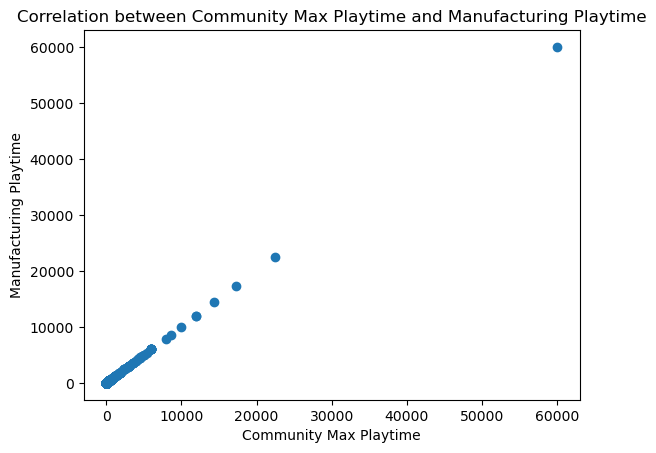

Pearson correlation coefficient between Community Min and Manufacturing Playtime: 0.8545821470604511


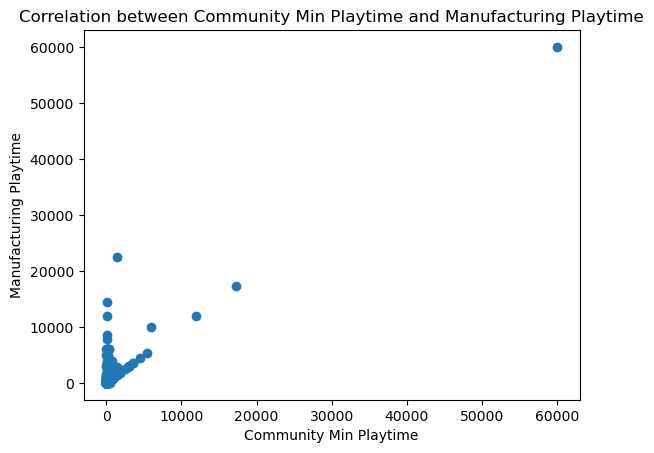

In [54]:
plt.scatter(df["ComMaxPlaytime"], df["MfgPlaytime"])
# person correlation coefficient
corr = df["ComMaxPlaytime"].corr(df["MfgPlaytime"])
print(f"Pearson correlation coefficient between Community Max and Manufacturing Playtime: {corr}")
plt.xlabel('Community Max Playtime')
plt.ylabel('Manufacturing Playtime')
plt.title('Correlation between Community Max Playtime and Manufacturing Playtime')
plt.show()

# since they're highly correlated, we can consider dropping one of them in further analysis
df_playtime_no_zeros = df[(df["ComMinPlaytime"] > 0) | (df["MfgPlaytime"] > 0)]
plt.scatter(df_playtime_no_zeros["ComMinPlaytime"], df_playtime_no_zeros["MfgPlaytime"])
# person correlation coefficient
corr = df_playtime_no_zeros["ComMinPlaytime"].corr(df_playtime_no_zeros["MfgPlaytime"])
print(f"Pearson correlation coefficient between Community Min and Manufacturing Playtime: {corr}")
plt.xlabel('Community Min Playtime')
plt.ylabel('Manufacturing Playtime')
plt.title('Correlation between Community Min Playtime and Manufacturing Playtime')
plt.show()


Pearson correlation coefficient between Manufacturing Playtime and Game Weight: 0.18395395190365893


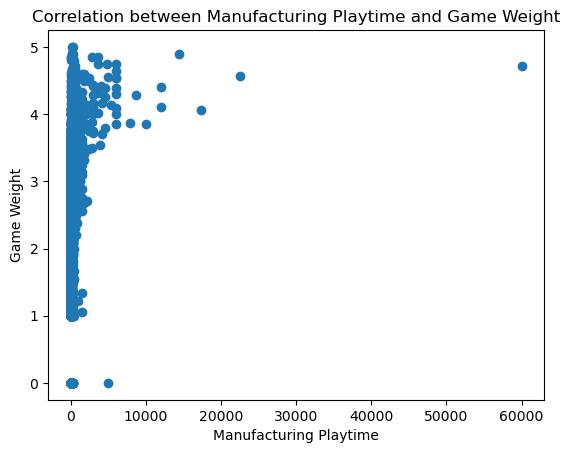

In [55]:
# mfgplaytime vs gameweight
plt.scatter(df["MfgPlaytime"], df["GameWeight"])
# person correlation coefficient
corr = df["MfgPlaytime"].corr(df["GameWeight"])
print(f"Pearson correlation coefficient between Manufacturing Playtime and Game Weight: {corr}")
plt.xlabel('Manufacturing Playtime')
plt.ylabel('Game Weight')
plt.title('Correlation between Manufacturing Playtime and Game Weight')
plt.show()

## Age Recommendation dependencies

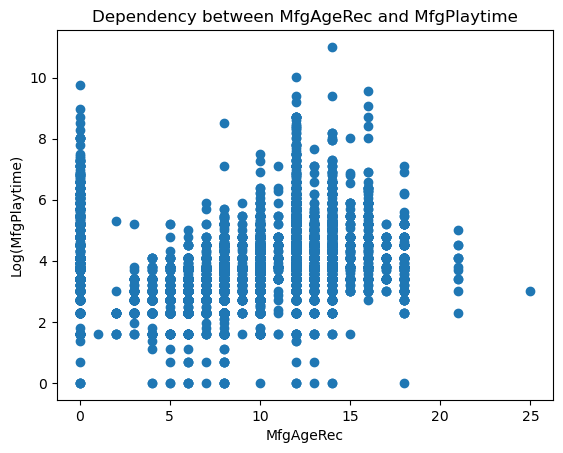

In [56]:
# age recommendation - play time dependency
playtime_ge_df = df[df["MfgPlaytime"] > 0][["MfgAgeRec", "MfgPlaytime"]]
plt.scatter(playtime_ge_df["MfgAgeRec"], np.log(playtime_ge_df["MfgPlaytime"]))
plt.xlabel('MfgAgeRec')
plt.ylabel('Log(MfgPlaytime)')
plt.title('Dependency between MfgAgeRec and MfgPlaytime')
plt.show()

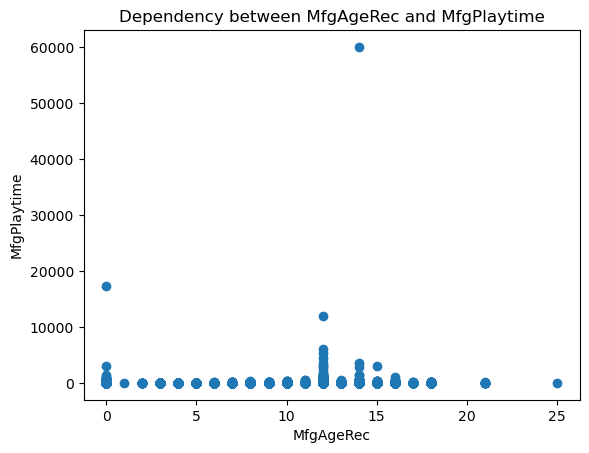

In [57]:
plt.scatter(df["MfgAgeRec"], df["ComMinPlaytime"])
plt.xlabel('MfgAgeRec')
plt.ylabel('MfgPlaytime')
plt.title('Dependency between MfgAgeRec and MfgPlaytime')
plt.show()

## Kickstarting and commercial success

 Correlazioni Pearson:
             Kickstarted  NumOwned   NumWant   NumWish
Kickstarted     1.000000  0.025731  0.072310  0.076488
NumOwned        0.025731  1.000000  0.677557  0.797531
NumWant         0.072310  0.677557  1.000000  0.939758
NumWish         0.076488  0.797531  0.939758  1.000000


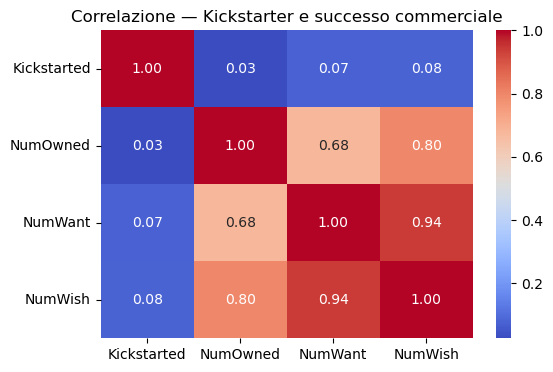

Kickstarted ↔ NumOwned: r = 0.026, p = 1.3875e-04
Kickstarted ↔ NumWant: r = 0.072, p = 8.1581e-27
Kickstarted ↔ NumWish: r = 0.076, p = 8.1630e-30


In [58]:

from scipy.stats import pointbiserialr

#Colonne rilevanti
df_small = df[['Kickstarted', 'NumOwned', 'NumWant', 'NumWish']].dropna()


#Correlazione Pearson tra variabili quantitative
corr_matrix = df_small.corr()
print(" Correlazioni Pearson:")
print(corr_matrix)

#Visualizzazione heatmap leggera
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlazione — Kickstarter e successo commerciale")
plt.show()

#Point-biserial per Kickstarted vs ciascuna metrica
for col in ['NumOwned', 'NumWant', 'NumWish']:
    r, p = pointbiserialr(df_small['Kickstarted'], df_small[col])
    print(f"Kickstarted ↔ {col}: r = {r:.3f}, p = {p:.4e}")


## Rank - Gameweight correlations

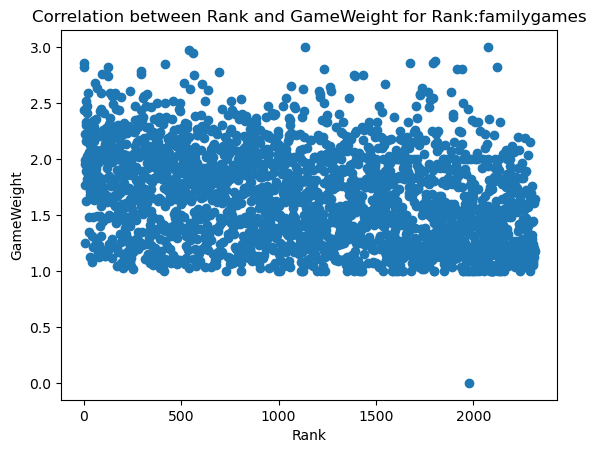

Pearson correlation coefficient between Rank and GameWeight for Rank:familygames: -0.2948872053063978


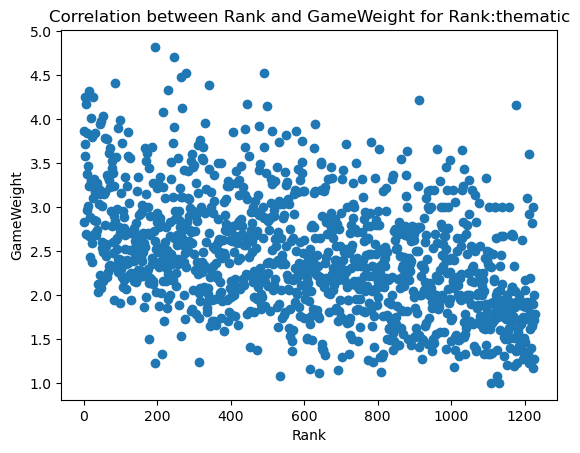

Pearson correlation coefficient between Rank and GameWeight for Rank:thematic: -0.43172270677959157


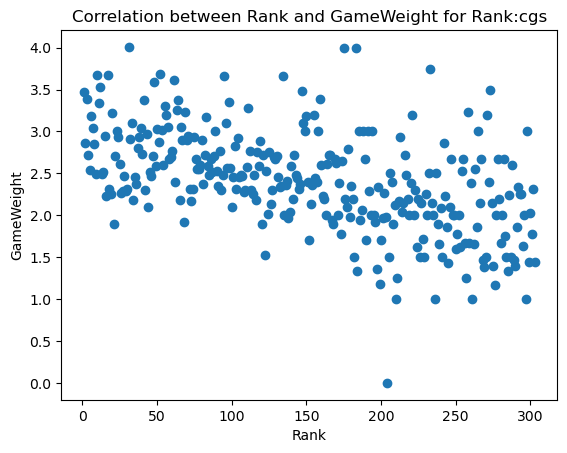

Pearson correlation coefficient between Rank and GameWeight for Rank:cgs: -0.5181989233609653


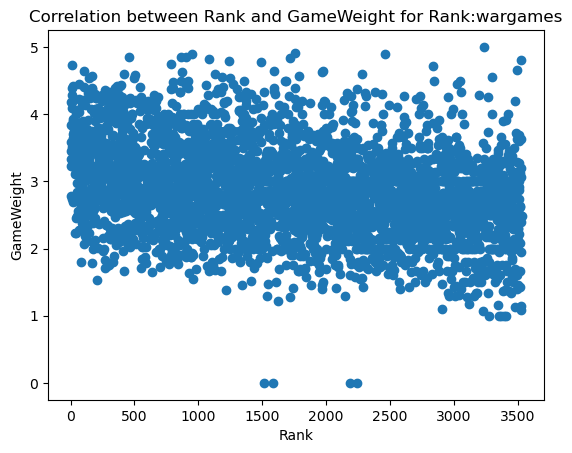

Pearson correlation coefficient between Rank and GameWeight for Rank:wargames: -0.3085897401086506


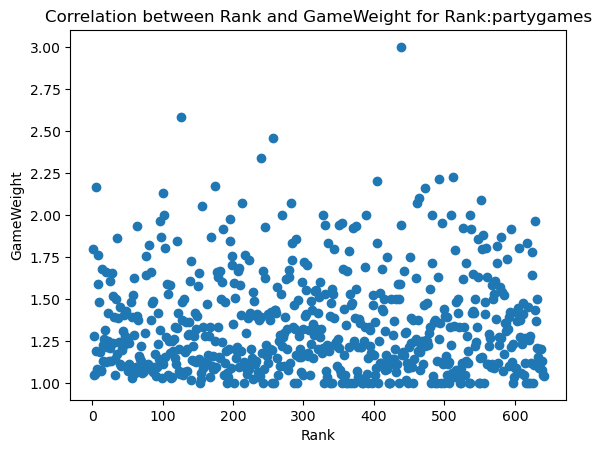

Pearson correlation coefficient between Rank and GameWeight for Rank:partygames: 0.015028962517459906


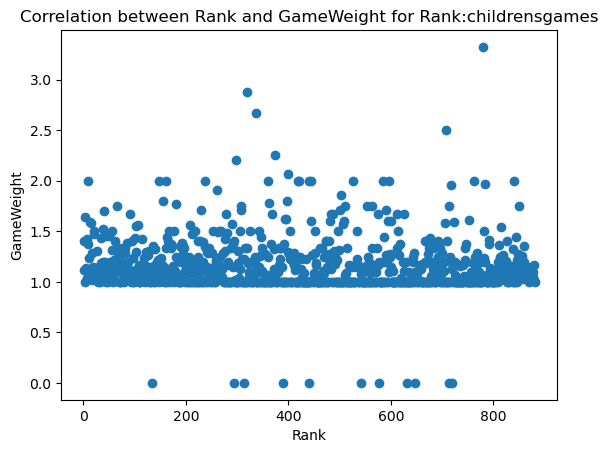

Pearson correlation coefficient between Rank and GameWeight for Rank:childrensgames: -0.0908846238659181


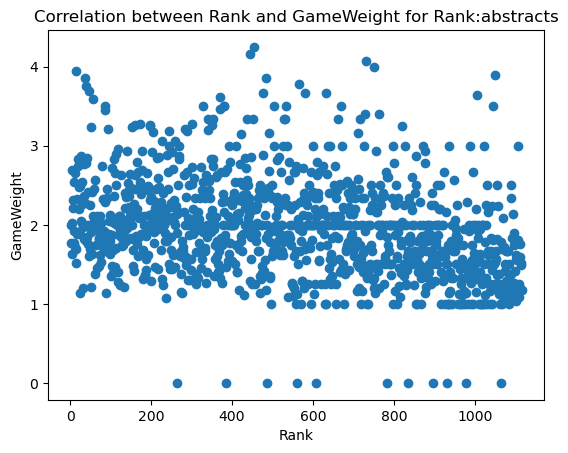

Pearson correlation coefficient between Rank and GameWeight for Rank:abstracts: -0.30702040307654604


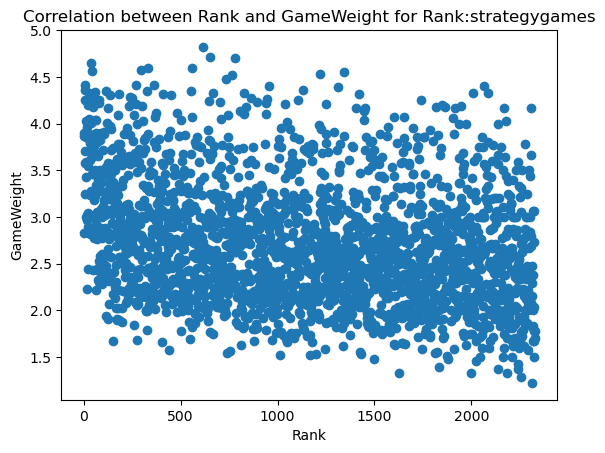

Pearson correlation coefficient between Rank and GameWeight for Rank:strategygames: -0.25736414488626397


In [59]:
# correltion rank - complexity for each category
for category in rank_cat_map.keys():
    plt.scatter(df[df[category]!=21926][category], df[df[category]!=21926]["GameWeight"])
    plt.xlabel('Rank')
    plt.ylabel('GameWeight')
    plt.title(f'Correlation between Rank and GameWeight for {category}')
    plt.show()
    print(f"Pearson correlation coefficient between Rank and GameWeight for {category}: {df[df[category]!=21926][category].corr(df[df[category]!=21926]['GameWeight'])}")



## alternates/implmementations/expansions - ranking correlation

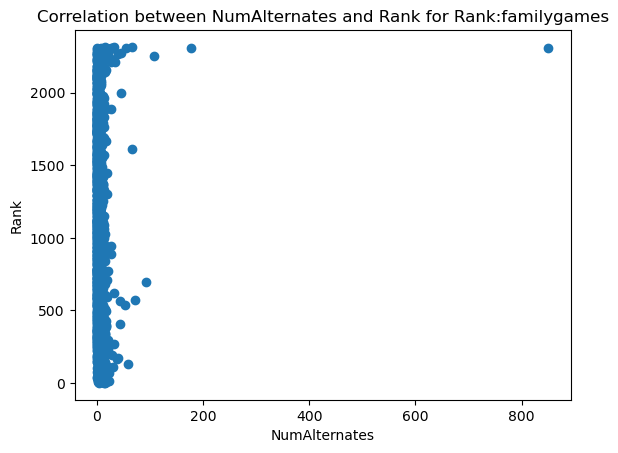

Pearson correlation coefficient between NumAlternates and Rank for Rank:familygames: 0.03528267540547187


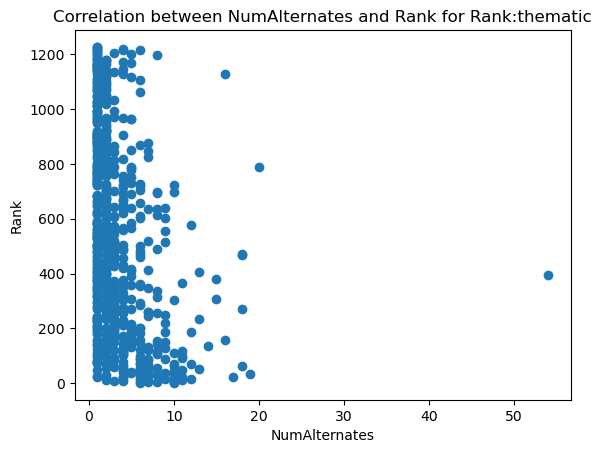

Pearson correlation coefficient between NumAlternates and Rank for Rank:thematic: -0.31121654297805534


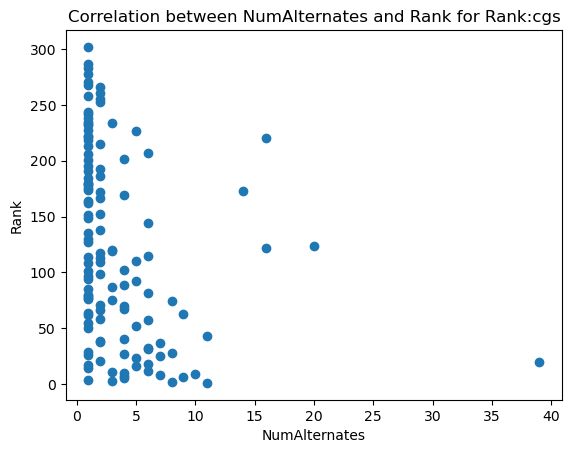

Pearson correlation coefficient between NumAlternates and Rank for Rank:cgs: -0.2908559943979081


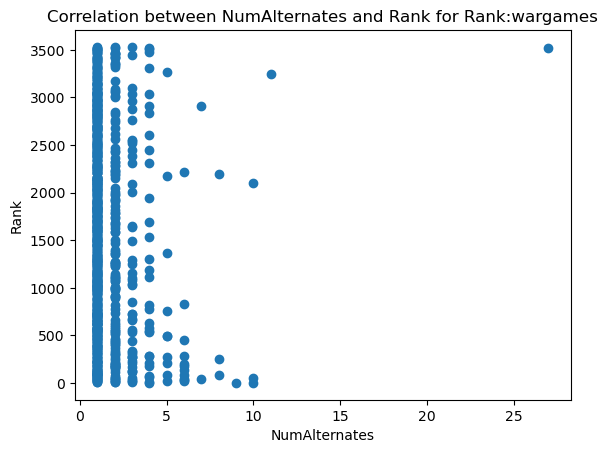

Pearson correlation coefficient between NumAlternates and Rank for Rank:wargames: -0.09902964705521801


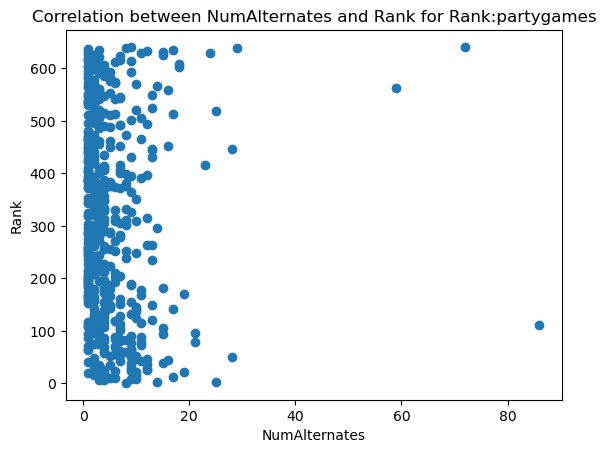

Pearson correlation coefficient between NumAlternates and Rank for Rank:partygames: -0.021495189875607775


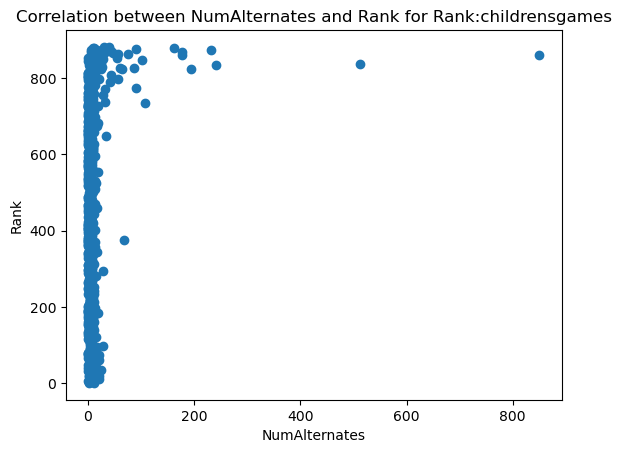

Pearson correlation coefficient between NumAlternates and Rank for Rank:childrensgames: 0.18873169860714056


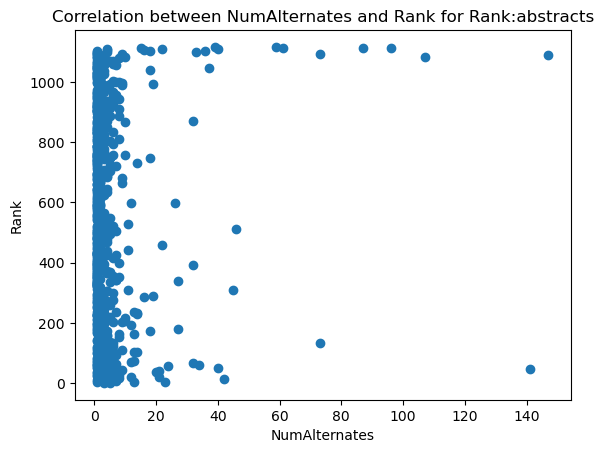

Pearson correlation coefficient between NumAlternates and Rank for Rank:abstracts: 0.05648589144207772


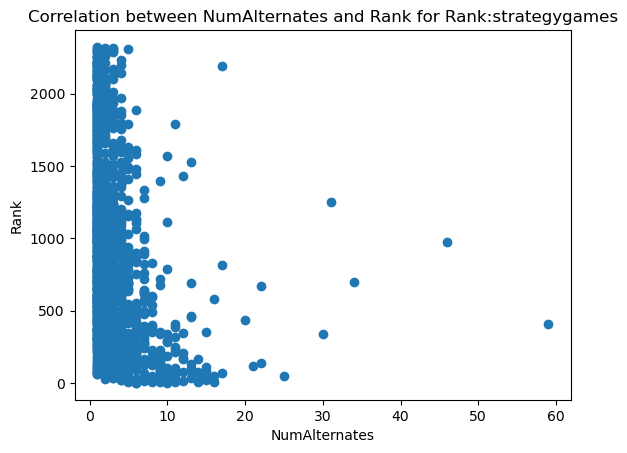

Pearson correlation coefficient between NumAlternates and Rank for Rank:strategygames: -0.3233819136891499


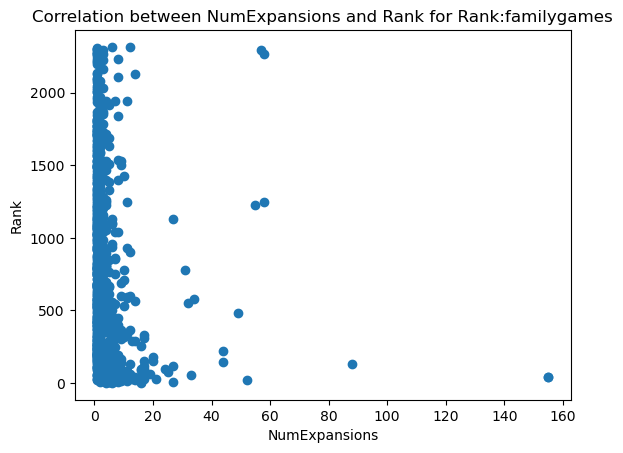

Pearson correlation coefficient between NumExpansions and Rank for Rank:familygames: -0.13638544219806215


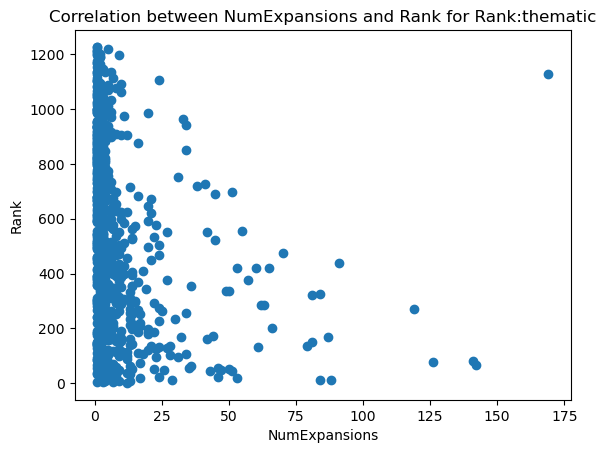

Pearson correlation coefficient between NumExpansions and Rank for Rank:thematic: -0.2165467939519995


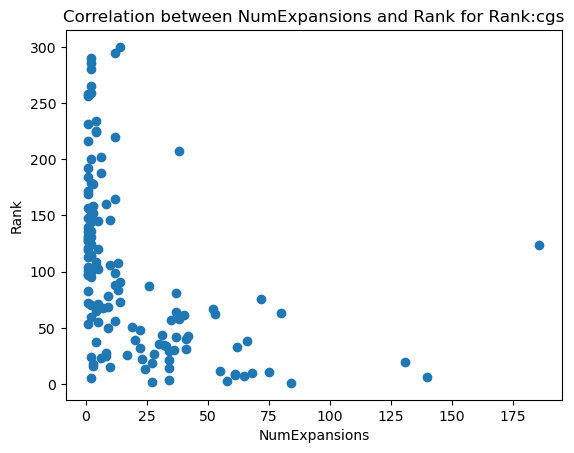

Pearson correlation coefficient between NumExpansions and Rank for Rank:cgs: -0.4261222571024532


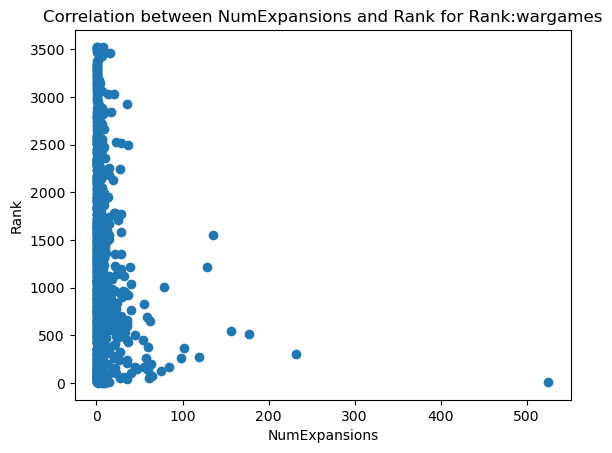

Pearson correlation coefficient between NumExpansions and Rank for Rank:wargames: -0.14684946967903972


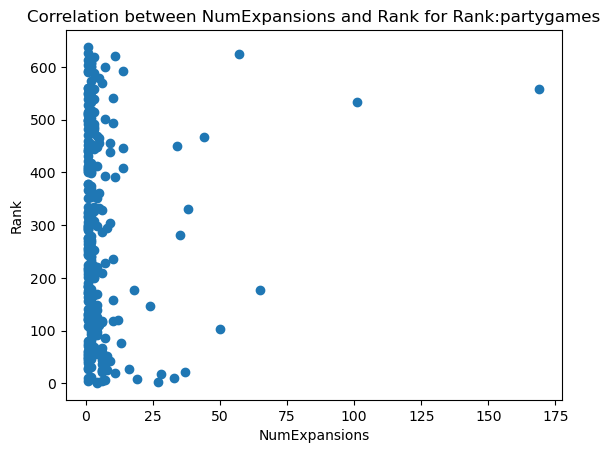

Pearson correlation coefficient between NumExpansions and Rank for Rank:partygames: 0.06186356863096502


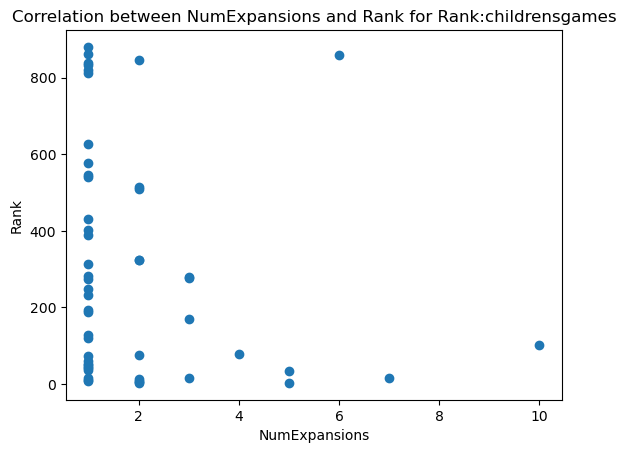

Pearson correlation coefficient between NumExpansions and Rank for Rank:childrensgames: -0.17506349731143242


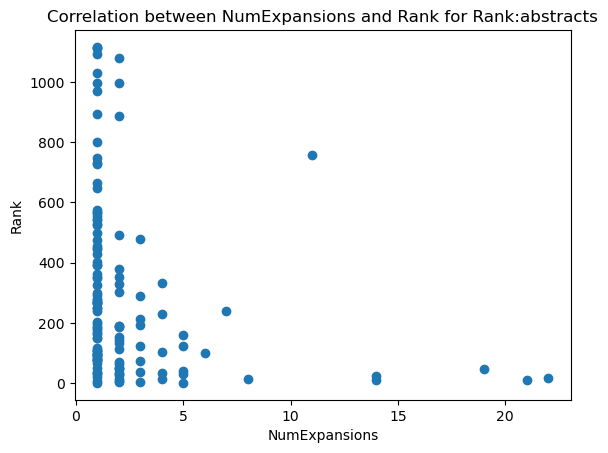

Pearson correlation coefficient between NumExpansions and Rank for Rank:abstracts: -0.23583876456911923


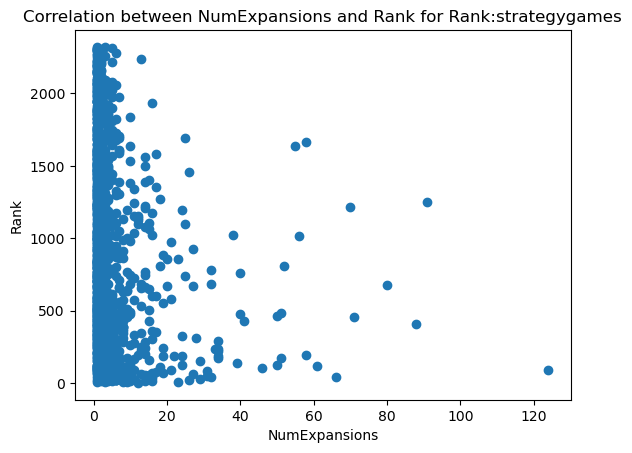

Pearson correlation coefficient between NumExpansions and Rank for Rank:strategygames: -0.19302630053809788


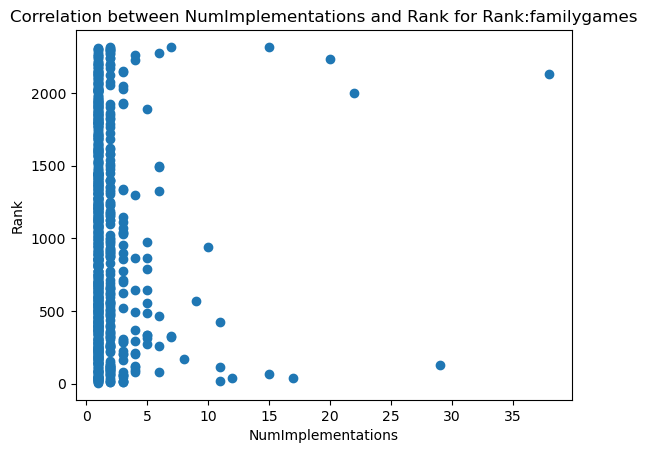

Pearson correlation coefficient between NumImplementations and Rank for Rank:familygames: -0.03088823413963071


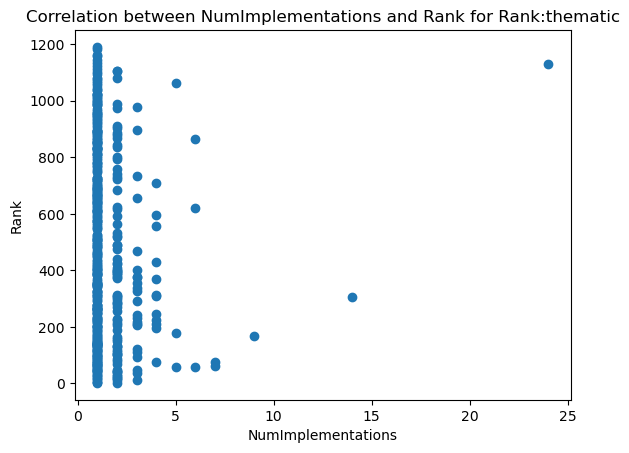

Pearson correlation coefficient between NumImplementations and Rank for Rank:thematic: -0.048218480728022886


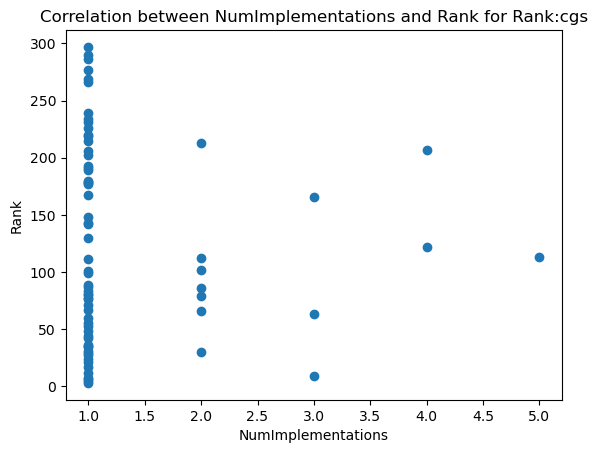

Pearson correlation coefficient between NumImplementations and Rank for Rank:cgs: -0.034486160774593384


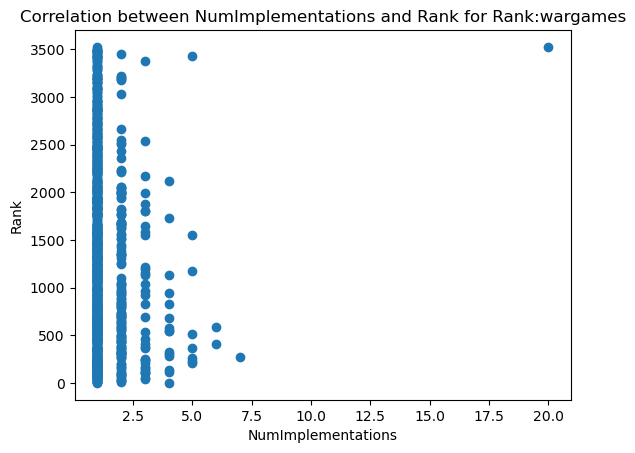

Pearson correlation coefficient between NumImplementations and Rank for Rank:wargames: -0.09334781364234321


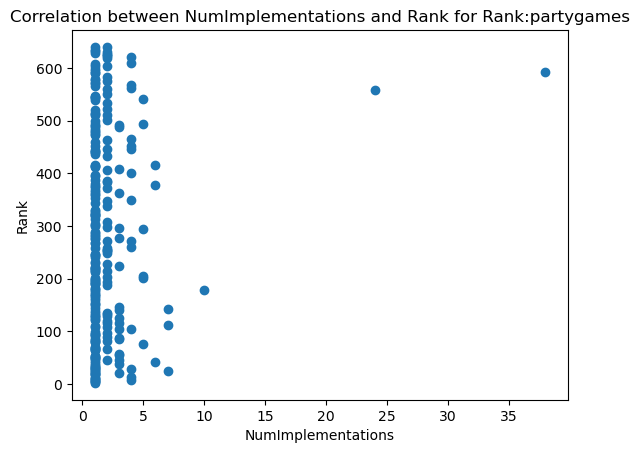

Pearson correlation coefficient between NumImplementations and Rank for Rank:partygames: 0.11519651872625063


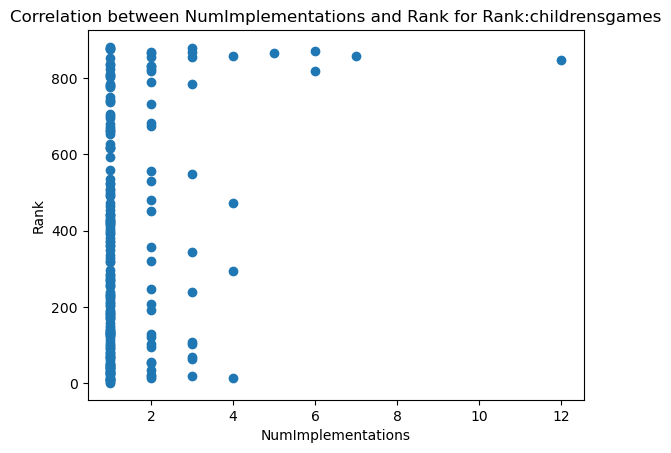

Pearson correlation coefficient between NumImplementations and Rank for Rank:childrensgames: 0.25600079668568426


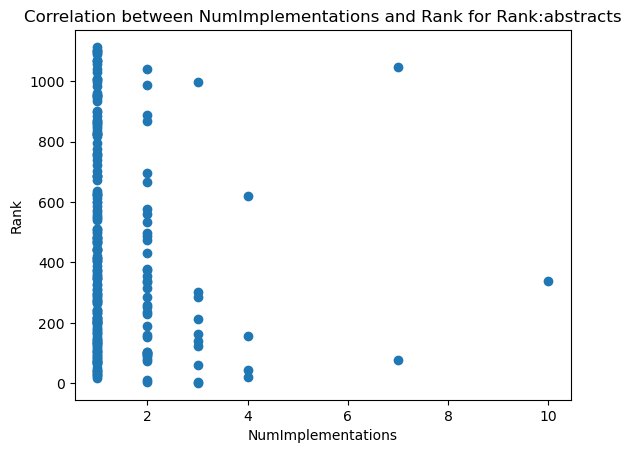

Pearson correlation coefficient between NumImplementations and Rank for Rank:abstracts: -0.1335672052568121


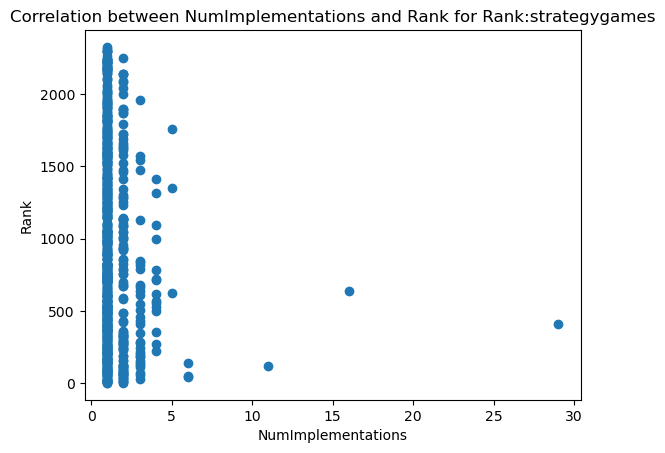

Pearson correlation coefficient between NumImplementations and Rank for Rank:strategygames: -0.12307855391066498


In [60]:
# correlation between alternates/implmementations/expansions and ranking
for col in ["NumAlternates", "NumExpansions", "NumImplementations"]:
    for category in rank_cat_map.keys():
        new_df = df[(df[category]!=21926) & (df[col]>0)]
        plt.scatter(new_df[col], new_df[category])
        plt.xlabel(col)
        plt.ylabel('Rank')
        plt.title(f'Correlation between {col} and Rank for {category}')
        plt.show()
        print(f"Pearson correlation coefficient between {col} and Rank for {category}: {new_df[col].corr(new_df[category])}")

In [61]:
# correlation coefficients: reimplementation - alternates/expansions/implementations
df[(df["IsReimplementation"] == 1)][["NumExpansions", "NumAlternates", "NumImplementations"]].corr()

NumExpansions  NumAlternates  NumImplementations
NumExpansions            1.000000       0.048957            0.113368
NumAlternates            0.048957       1.000000            0.308857
NumImplementations       0.113368       0.308857            1.000000

## Language ease - ranking correlation

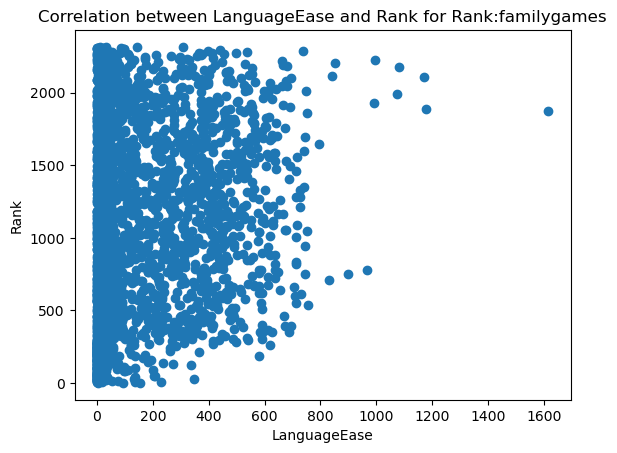

Pearson correlation coefficient between LanguageEase and Rank for Rank:familygames: 0.14568610925607423


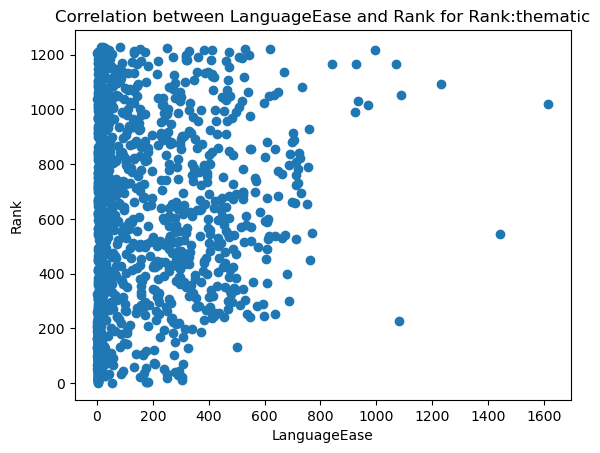

Pearson correlation coefficient between LanguageEase and Rank for Rank:thematic: 0.17543611145300292


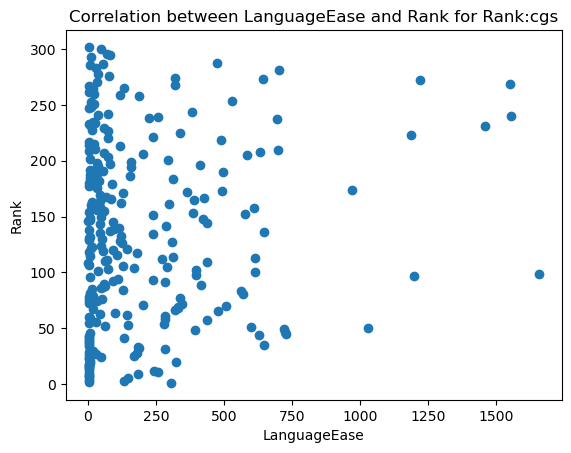

Pearson correlation coefficient between LanguageEase and Rank for Rank:cgs: 0.08959986305768565


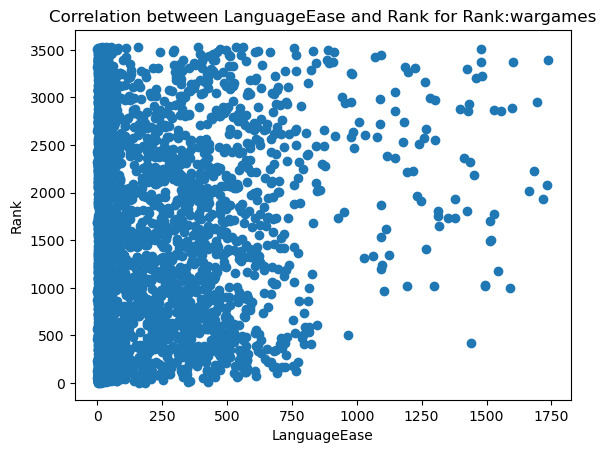

Pearson correlation coefficient between LanguageEase and Rank for Rank:wargames: 0.03109614902263542


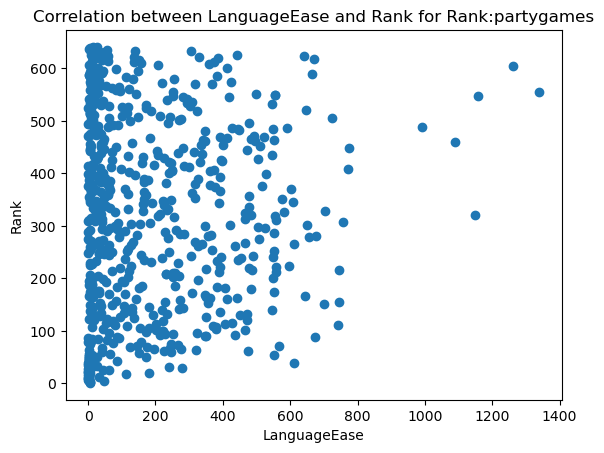

Pearson correlation coefficient between LanguageEase and Rank for Rank:partygames: 0.06250779956533632


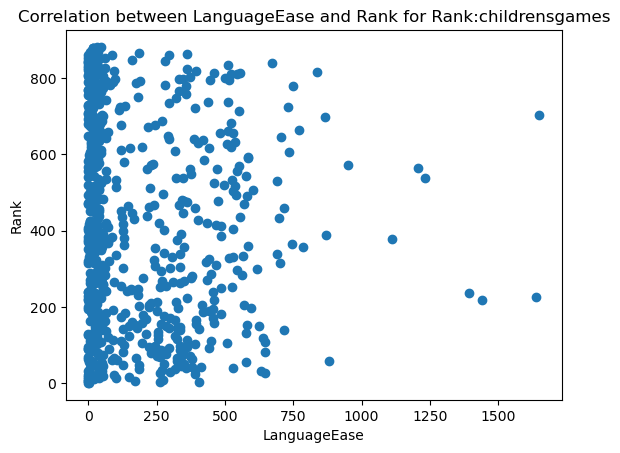

Pearson correlation coefficient between LanguageEase and Rank for Rank:childrensgames: -0.09157290819710796


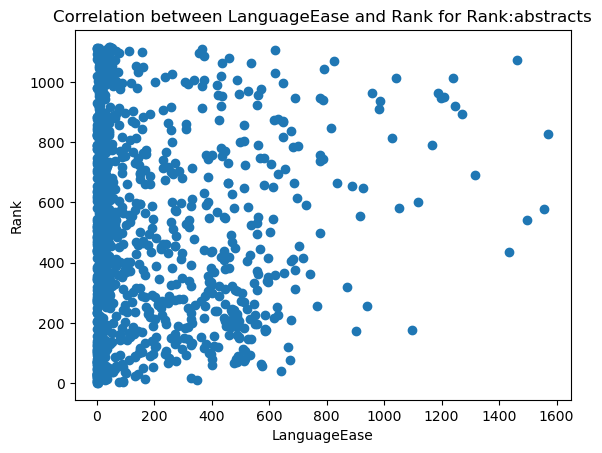

Pearson correlation coefficient between LanguageEase and Rank for Rank:abstracts: 0.0258203577534474


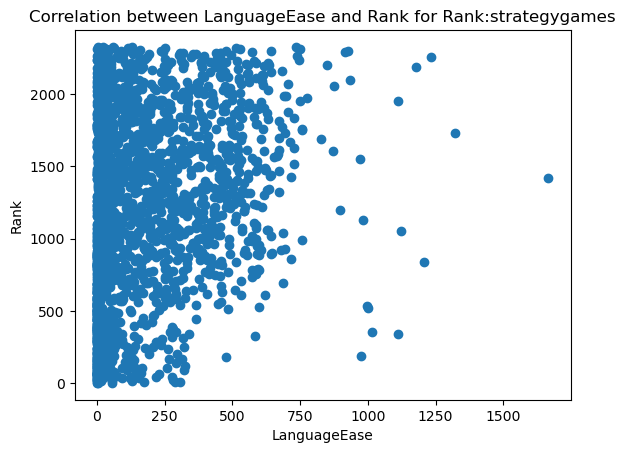

Pearson correlation coefficient between LanguageEase and Rank for Rank:strategygames: 0.31597632605080517


In [62]:
# correlation between language ease and ranking
for category in rank_cat_map.keys():
    new_df = df[(df[category]!=21926) & (df["LanguageEase"].notnull())]
    plt.scatter(new_df["LanguageEase"], new_df[category])
    plt.xlabel("LanguageEase")
    plt.ylabel('Rank')
    plt.title(f'Correlation between LanguageEase and Rank for {category}')
    plt.show()
    print(f"Pearson correlation coefficient between LanguageEase and Rank for {category}: {new_df['LanguageEase'].corr(new_df[category])}")



## Language ease per category

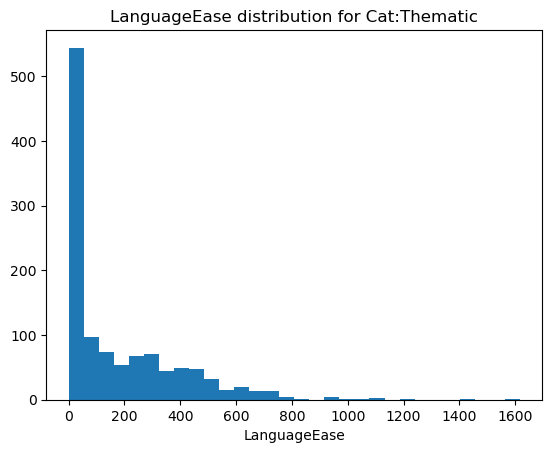

Median LanguageEase for Cat:Thematic: 73.07692307692308


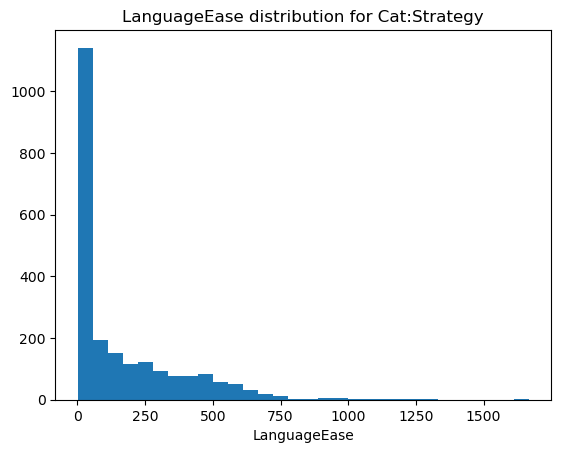

Median LanguageEase for Cat:Strategy: 53.333333333333336


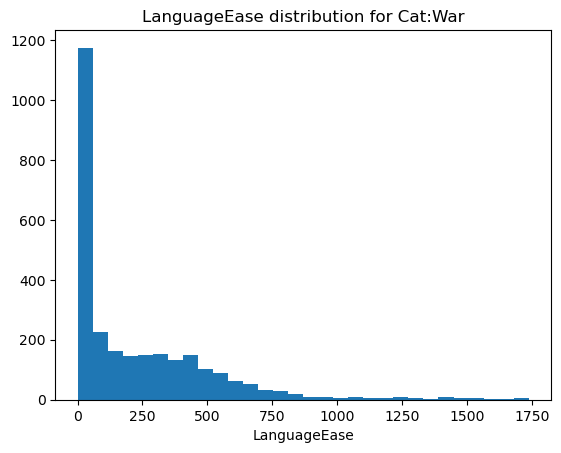

Median LanguageEase for Cat:War: 110.0


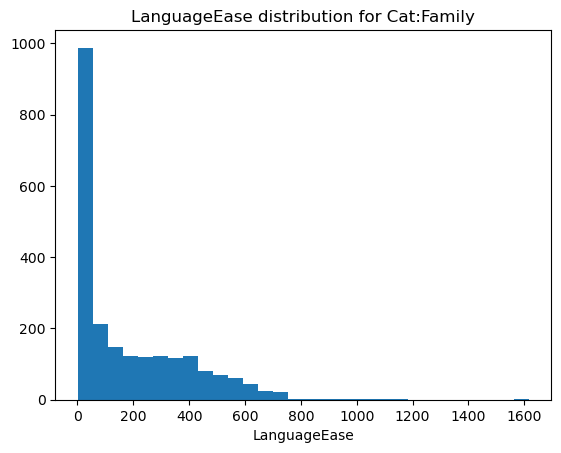

Median LanguageEase for Cat:Family: 87.11111111111111


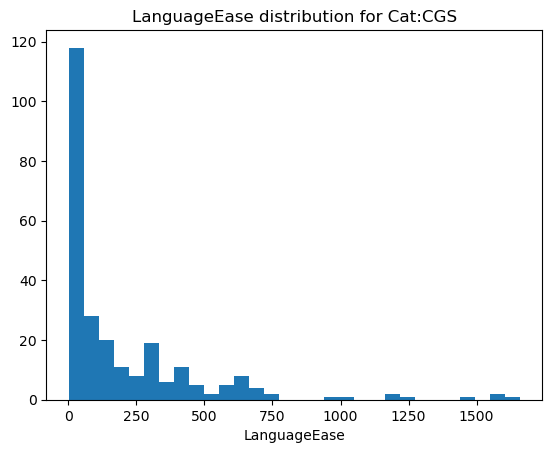

Median LanguageEase for Cat:CGS: 70.94444444444444


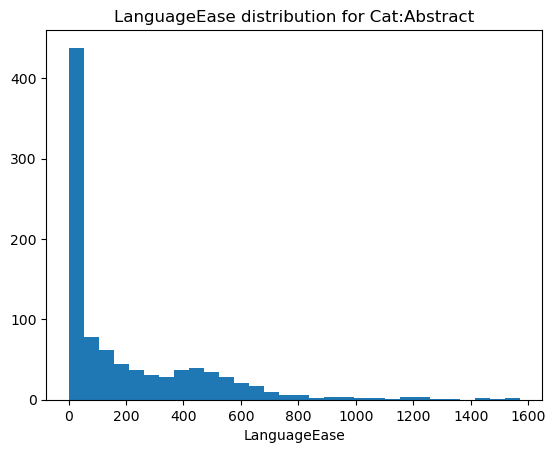

Median LanguageEase for Cat:Abstract: 71.16666666666666


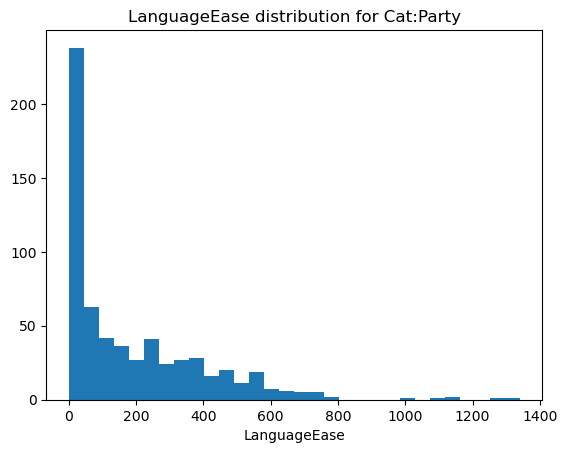

Median LanguageEase for Cat:Party: 102.0


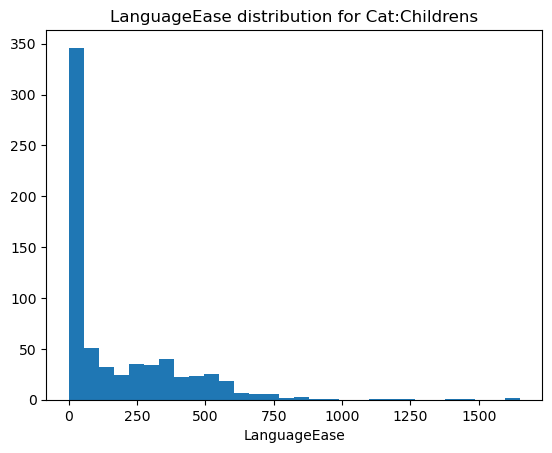

Median LanguageEase for Cat:Childrens: 51.0


In [63]:
# language ease gropu by category

for category in categories:
    new_df = df[df["LanguageEase"].notnull() & (df[category] != 0)]
    plt.hist(new_df["LanguageEase"], bins=30)
    plt.xlabel("LanguageEase")
    plt.title(f'LanguageEase distribution for {category}')
    plt.show()
    print(f"Median LanguageEase for {category}: {new_df['LanguageEase'].median()}")

## Some correlations with Game Weight

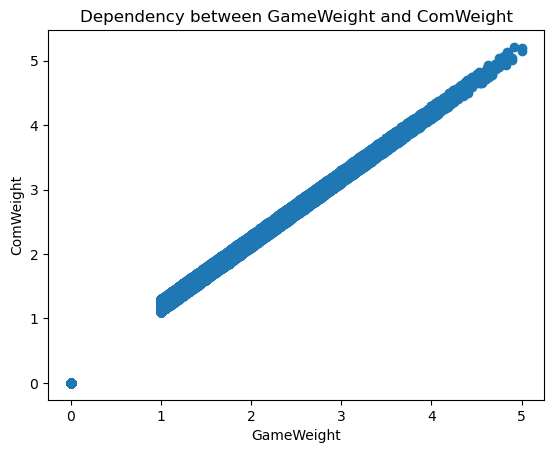

In [64]:
plt.scatter(df["GameWeight"], df["ComWeight"])
plt.xlabel('GameWeight')
plt.ylabel('ComWeight')
plt.title('Dependency between GameWeight and ComWeight')
plt.show()

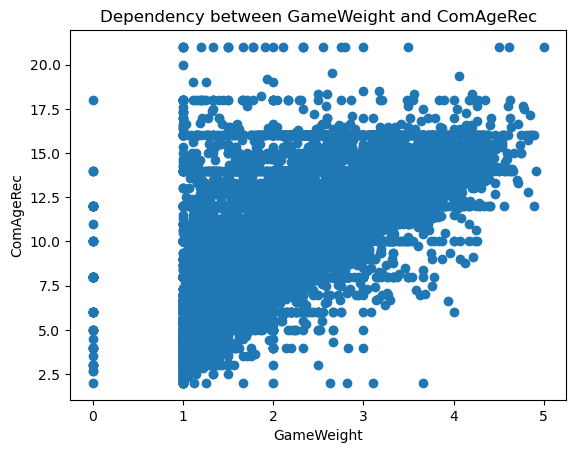

In [65]:
plt.scatter(df["GameWeight"], df["ComAgeRec"])
plt.xlabel('GameWeight')
plt.ylabel('ComAgeRec')
plt.title('Dependency between GameWeight and ComAgeRec')
plt.show()

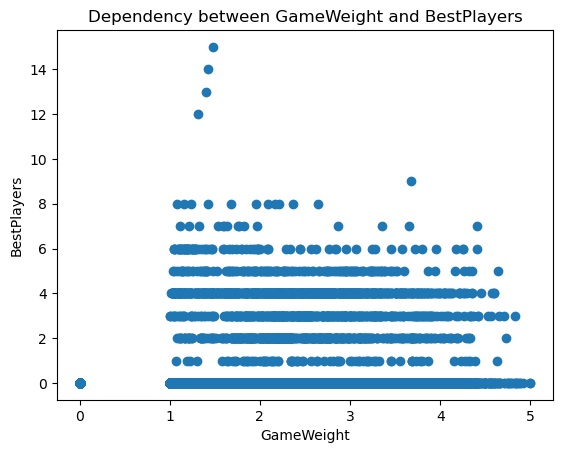

In [66]:
plt.scatter(df["GameWeight"], df["BestPlayers"])
plt.xlabel('GameWeight')
plt.ylabel('BestPlayers')
plt.title('Dependency between GameWeight and BestPlayers')
plt.show()

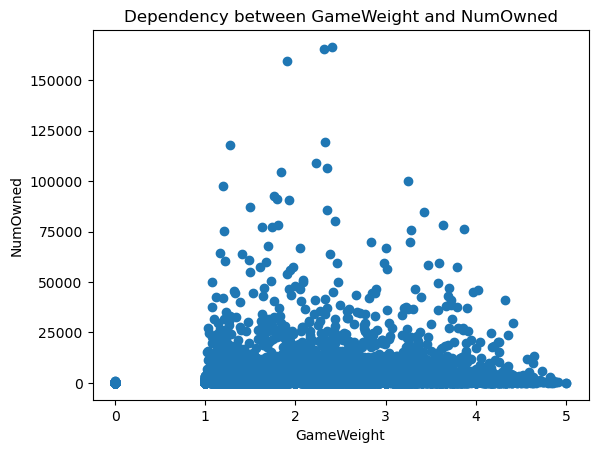

In [67]:
plt.scatter(df["GameWeight"], df["NumOwned"])
plt.xlabel('GameWeight')
plt.ylabel('NumOwned')
plt.title('Dependency between GameWeight and NumOwned')
plt.show()

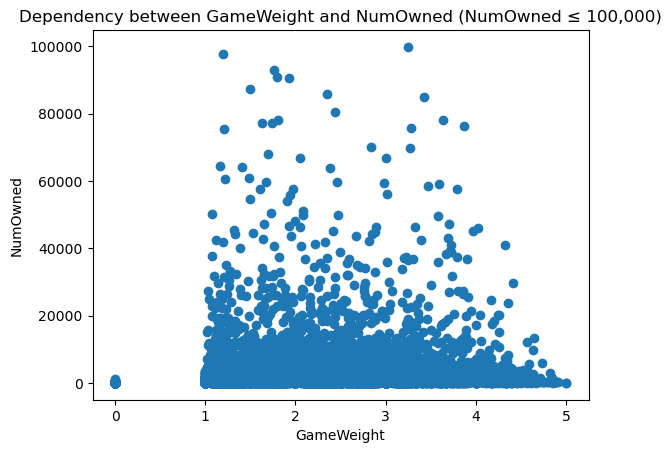

In [68]:
# Filtering numowned
filtered_df = df[df["NumOwned"] <= 100000]

plt.scatter(filtered_df["GameWeight"], filtered_df["NumOwned"])
plt.xlabel('GameWeight')
plt.ylabel('NumOwned')
plt.title('Dependency between GameWeight and NumOwned (NumOwned ≤ 100,000)')
plt.show()

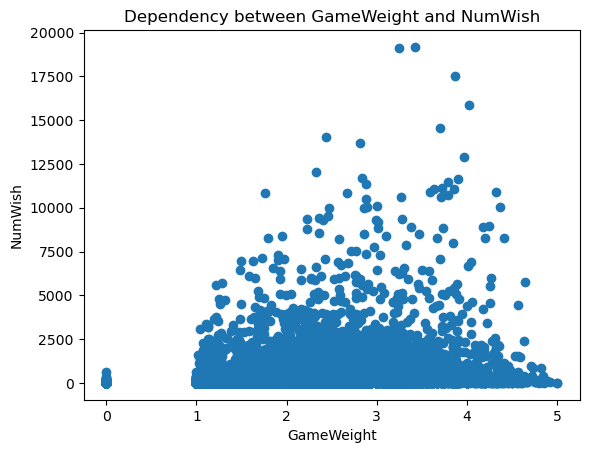

In [69]:
plt.scatter(df["GameWeight"], df["NumWish"])
plt.xlabel('GameWeight')
plt.ylabel('NumWish')
plt.title('Dependency between GameWeight and NumWish')
plt.show()

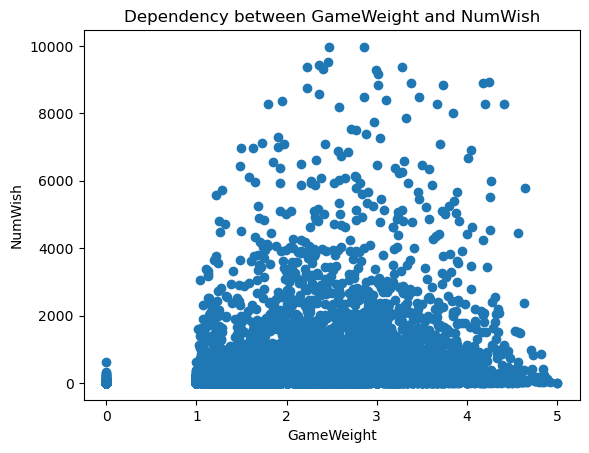

In [70]:
filtered_df = df[df["NumWish"] <= 10000]

plt.scatter(filtered_df["GameWeight"], filtered_df["NumWish"])
plt.xlabel('GameWeight')
plt.ylabel('NumWish')
plt.title('Dependency between GameWeight and NumWish')
plt.show()

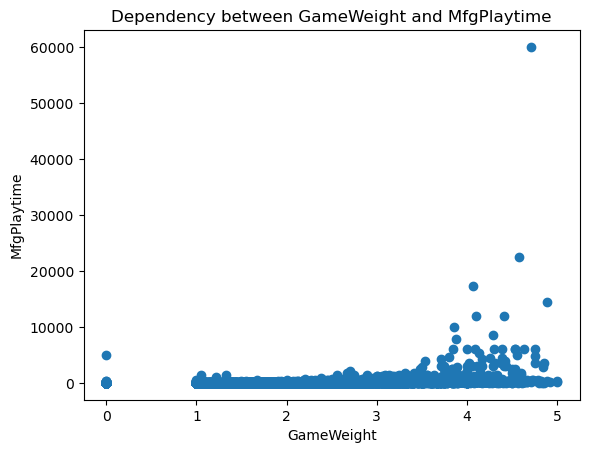

In [71]:
plt.scatter(df["GameWeight"], df["MfgPlaytime"])
plt.xlabel('GameWeight')
plt.ylabel('MfgPlaytime')
plt.title('Dependency between GameWeight and MfgPlaytime')
plt.show()

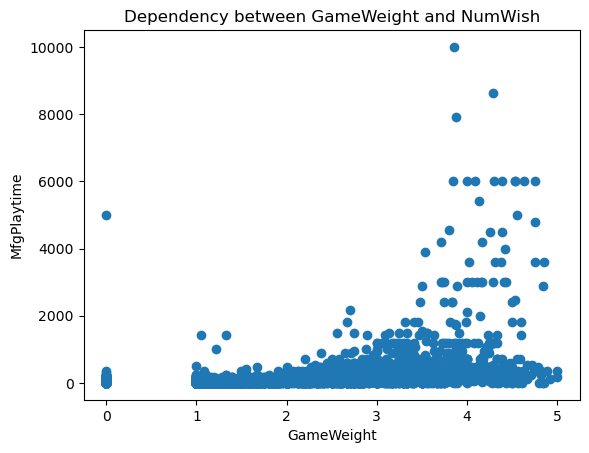

In [72]:
filtered_df = df[df["MfgPlaytime"] <= 10000]

plt.scatter(filtered_df["GameWeight"], filtered_df["MfgPlaytime"])
plt.xlabel('GameWeight')
plt.ylabel('MfgPlaytime')
plt.title('Dependency between GameWeight and NumWish')
plt.show()

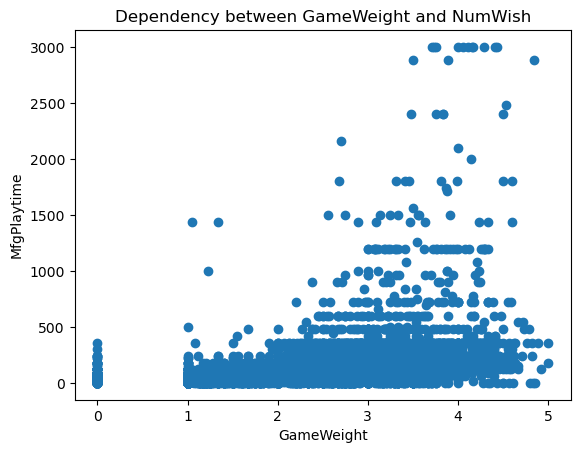

In [73]:
filtered_df = df[df["MfgPlaytime"] <= 3000]

plt.scatter(filtered_df["GameWeight"], filtered_df["MfgPlaytime"])
plt.xlabel('GameWeight')
plt.ylabel('MfgPlaytime')
plt.title('Dependency between GameWeight and NumWish')
plt.show()

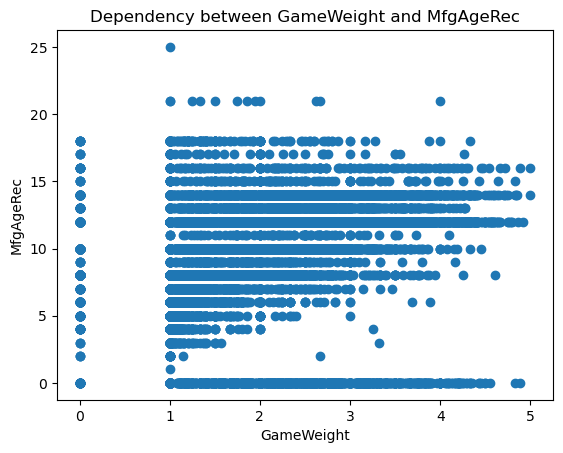

In [74]:
plt.scatter(df["GameWeight"], df["MfgAgeRec"])
plt.xlabel('GameWeight')
plt.ylabel('MfgAgeRec')
plt.title('Dependency between GameWeight and MfgAgeRec')
plt.show()

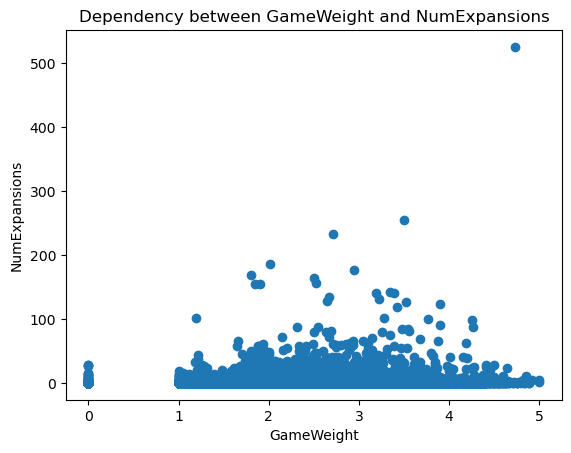

In [75]:
plt.scatter(df["GameWeight"], df["NumExpansions"])
plt.xlabel('GameWeight')
plt.ylabel('NumExpansions')
plt.title('Dependency between GameWeight and NumExpansions')
plt.show()

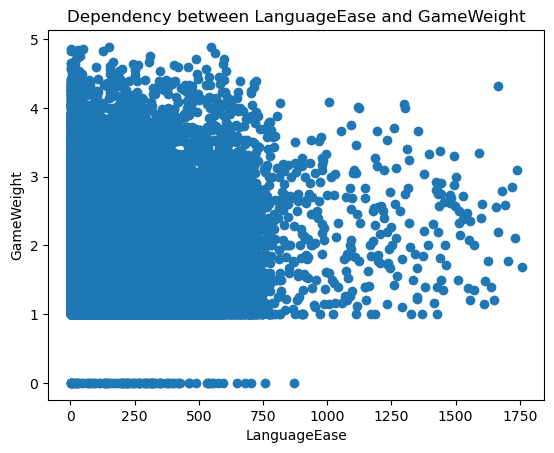

Pearson correlation coefficient between LanguageEase and GameWeight: -0.008094405848678035


In [76]:
# language ease - game weight dependency
plt.scatter(df["LanguageEase"], df["GameWeight"])
plt.xlabel('LanguageEase')
plt.ylabel('GameWeight')
plt.title('Dependency between LanguageEase and GameWeight')
plt.show()
print(f"Pearson correlation coefficient between LanguageEase and GameWeight: {df['LanguageEase'].corr(df['GameWeight'])}")

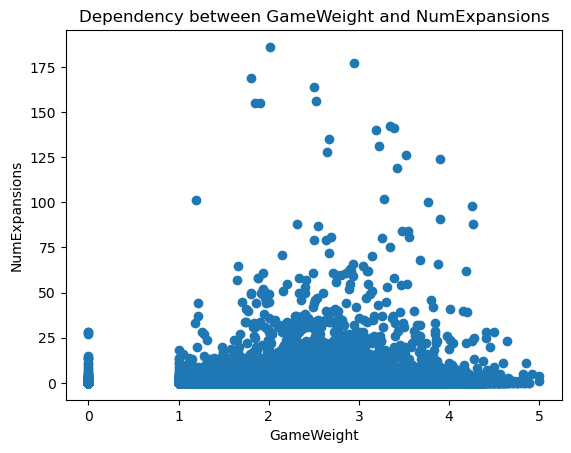

In [77]:
filtered_df = df[df["NumExpansions"] <= 200]

plt.scatter(filtered_df["GameWeight"], filtered_df["NumExpansions"])
plt.xlabel('GameWeight')
plt.ylabel('NumExpansions')
plt.title('Dependency between GameWeight and NumExpansions')
plt.show()

<Axes: >

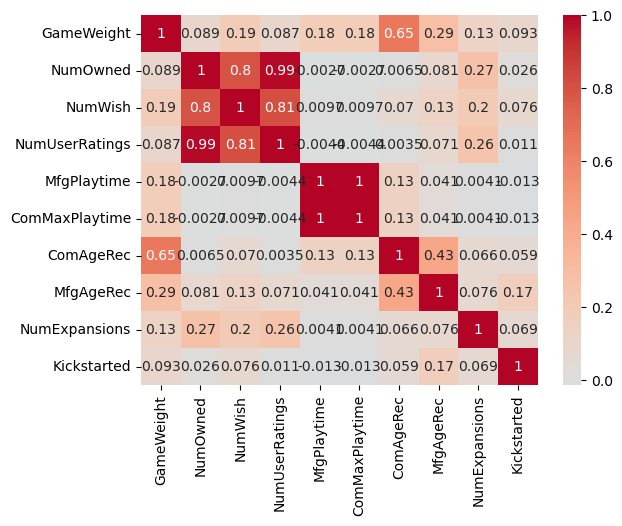

In [78]:
corr_vars = [
    'GameWeight', 'NumOwned', 'NumWish', 'NumUserRatings', 'MfgPlaytime', 
    'ComMaxPlaytime', 'ComAgeRec', 'MfgAgeRec', 'NumExpansions', 'Kickstarted'
]
sns.heatmap(df[corr_vars].corr(), annot=True, cmap='coolwarm', center=0)

Correlation Matrix:
GameWeight            1.000000
ComWeight             0.997268
ComAgeRec             0.649145
MfgAgeRec             0.285869
NumWant               0.245358
NumWish               0.191517
ComMaxPlaytime        0.183954
MfgPlaytime           0.183954
NumExpansions         0.129520
ComMinPlaytime        0.126712
NumWeightVotes        0.120504
NumOwned              0.089149
NumUserRatings        0.087016
IsReimplementation    0.042287
NumImplementations    0.036594
LanguageEase         -0.008094
NumAlternates        -0.059708
MaxPlayers           -0.090121
MinPlayers           -0.173578
NumComments                NaN
Name: GameWeight, dtype: float64


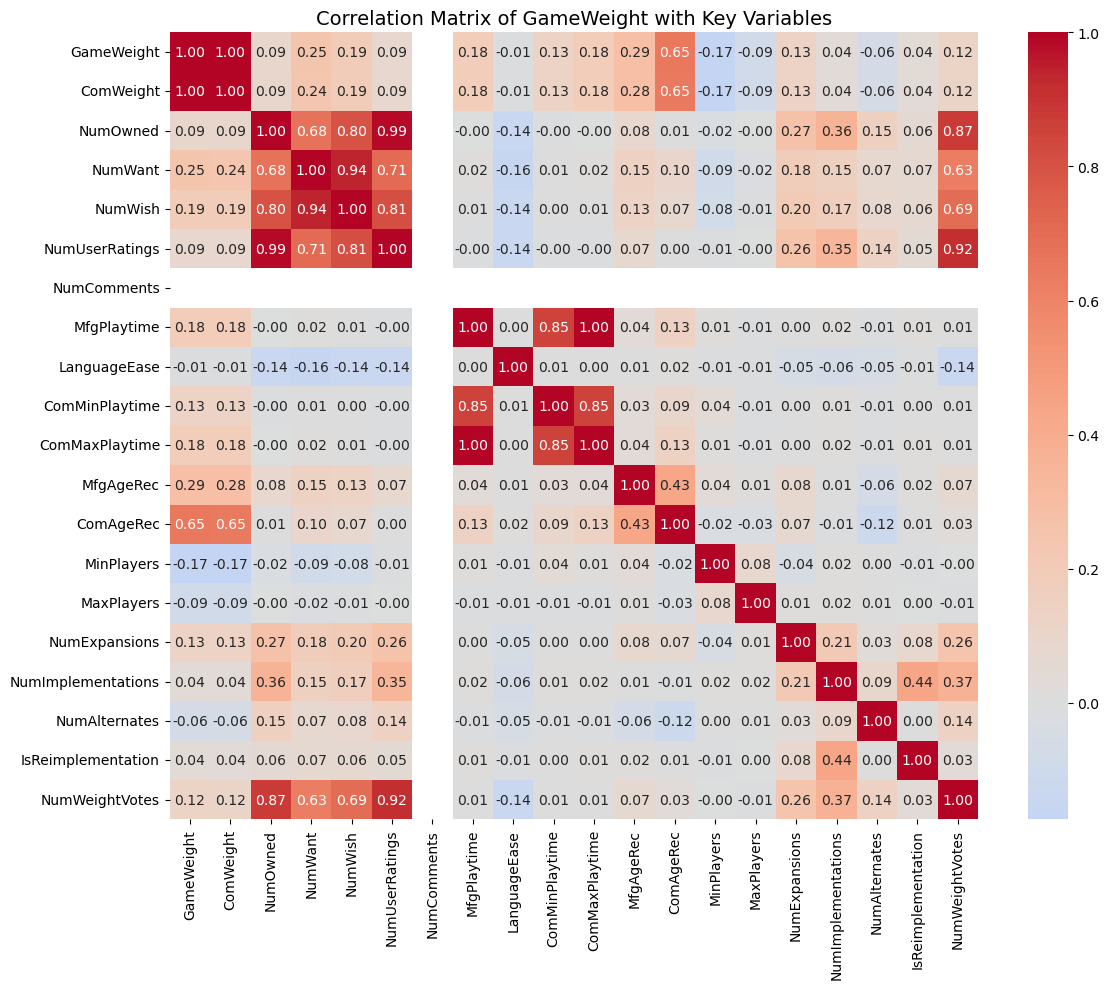

In [79]:
corr_vars = [
    'GameWeight',         
    'ComWeight',         
    'NumOwned',           
    'NumWant',           
    'NumWish',           
    'NumUserRatings',     
    'NumComments',        
    'MfgPlaytime',
    "LanguageEase",       
    'ComMinPlaytime',     
    'ComMaxPlaytime',     
    'MfgAgeRec',          
    'ComAgeRec',          
    'MinPlayers',         
    'MaxPlayers',         
    'NumExpansions',      
    'NumImplementations', 
    'NumAlternates',      
    'IsReimplementation',
    'NumWeightVotes'
]
available_vars = [v for v in corr_vars if v in df.columns]

corr_matrix = df[available_vars].corr()

print("Correlation Matrix:")
print(corr_matrix['GameWeight'].sort_values(ascending=False))

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlation Matrix of GameWeight with Key Variables', fontsize=14)
plt.tight_layout()
plt.show()

Correlation Matrix:
                NumOwned   NumWant   NumWish  NumUserRatings
NumOwned        1.000000  0.677557  0.797531        0.985474
NumWant         0.677557  1.000000  0.939758        0.709185
NumWish         0.797531  0.939758  1.000000        0.814348
NumUserRatings  0.985474  0.709185  0.814348        1.000000


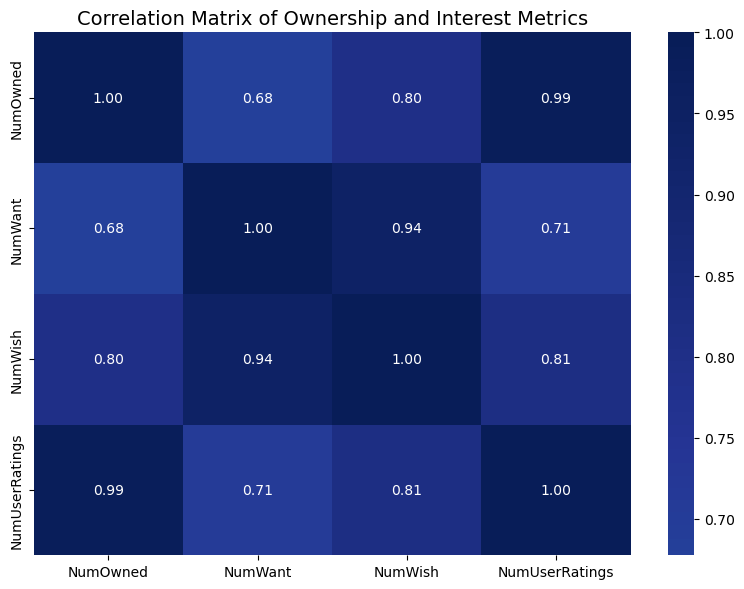

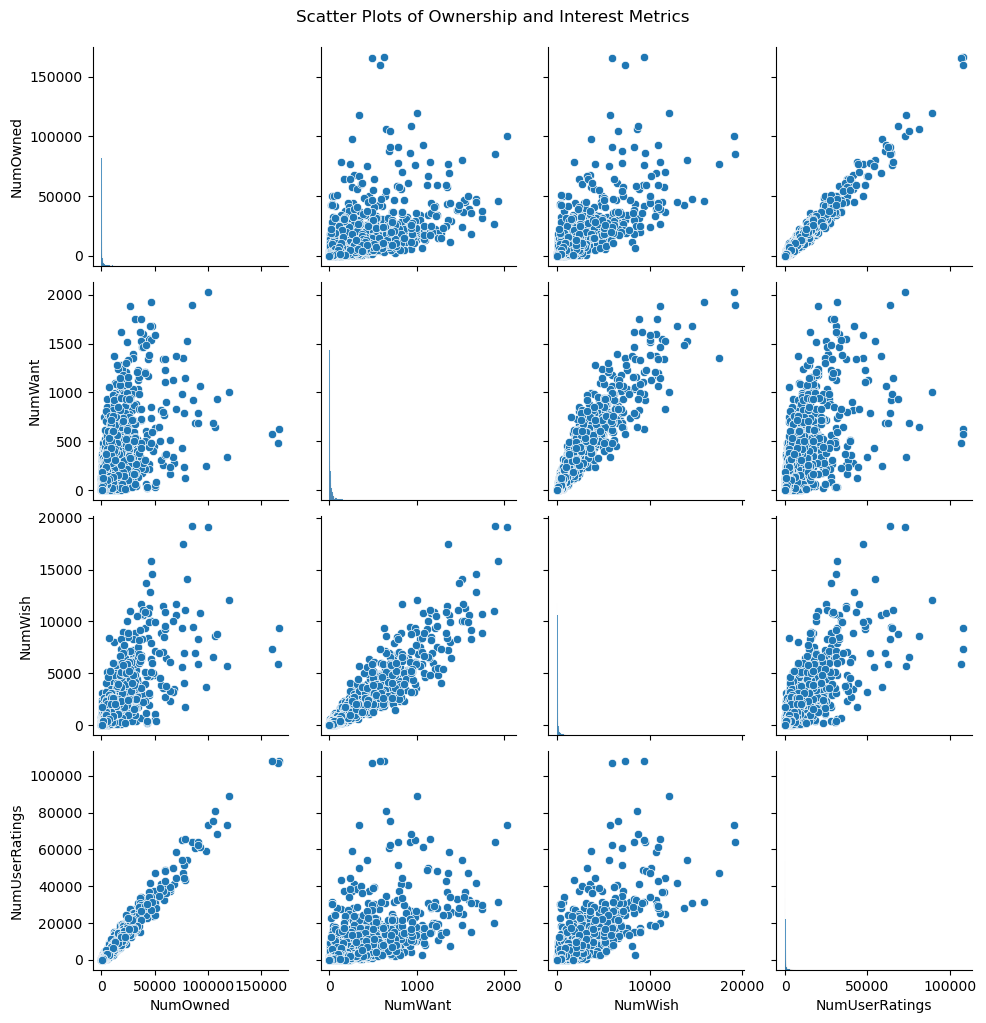

In [80]:
# correlation matrix NumOwned, NumWant, NumOwned, NumUserRatings, NumWish
corr_vars = ['NumOwned', 'NumWant', 'NumWish', 'NumUserRatings']
corr_matrix = df[corr_vars].corr()
print("Correlation Matrix:")
print(corr_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', center=0, fmt=".2f")
plt.title('Correlation Matrix of Ownership and Interest Metrics', fontsize=14)
plt.tight_layout()
plt.show()

# scatter plots
sns.pairplot(df[corr_vars])
plt.suptitle('Scatter Plots of Ownership and Interest Metrics', y=1.02)
plt.show()

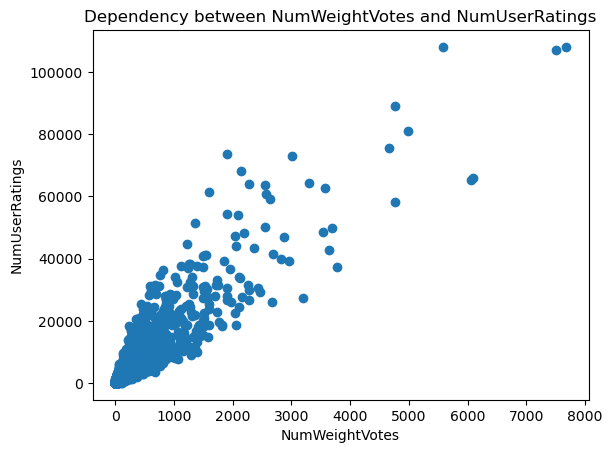

In [ ]:
plt.scatter(df["NumWeightVotes"], df["NumUserRatings"])
plt.xlabel('NumWeightVotes')
plt.ylabel('NumUserRatings')
plt.title('Dependency between NumWeightVotes and NumUserRatings')
plt.show()

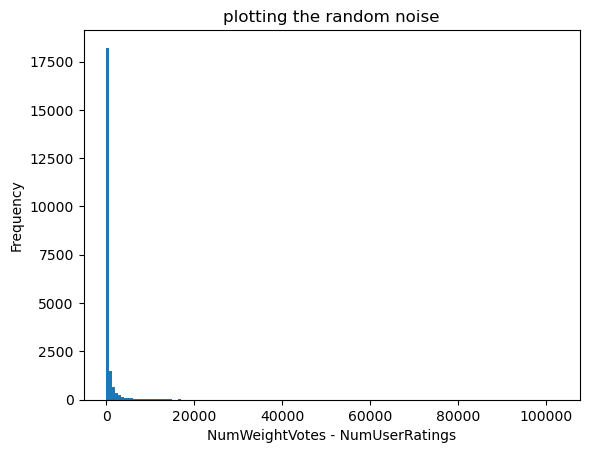

In [97]:
difference = df["NumUserRatings"] - df["NumWeightVotes"]
plt.hist(difference, bins = 150)
plt.title("plotting the random noise")
plt.xlabel("NumWeightVotes - NumUserRatings")
plt.ylabel("Frequency")
plt.show()


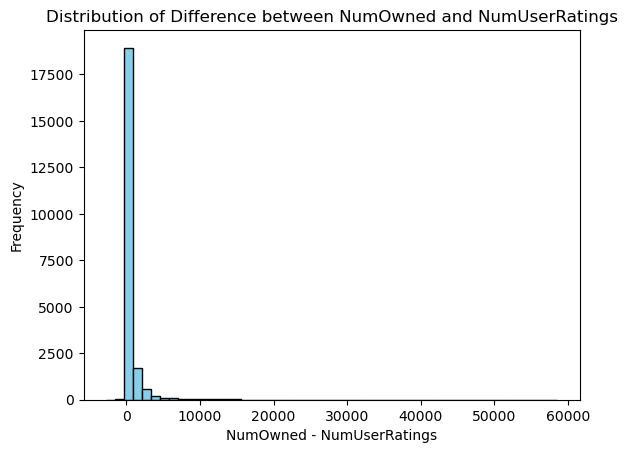

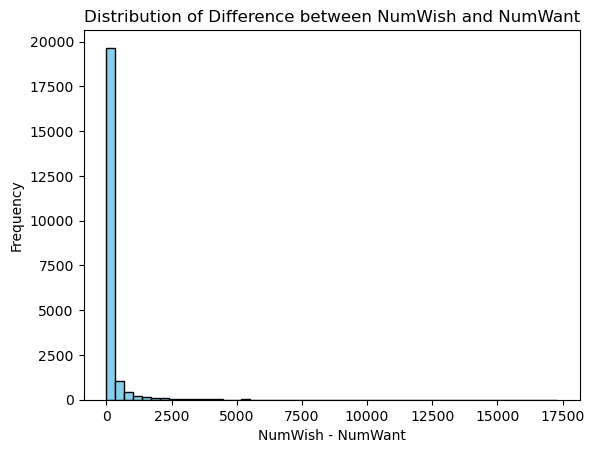

In [81]:
# NumUser ratings
diff_1 = df["NumOwned"] - df["NumUserRatings"]
plt.hist(diff_1, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Difference between NumOwned and NumUserRatings')
plt.xlabel('NumOwned - NumUserRatings')
plt.ylabel('Frequency')
plt.show()

diff_2 = df["NumWish"] - df["NumWant"]
plt.hist(diff_2, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Difference between NumWish and NumWant')
plt.xlabel('NumWish - NumWant')
plt.ylabel('Frequency')
plt.show()


Pearson correlation coefficient between ComAgeRec and MfgAgeRec: 0.7232772191029585


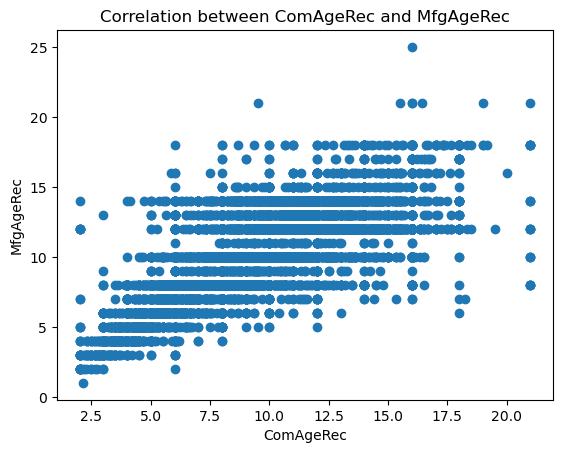

In [82]:
# ComAgeRec - MfgAgeRec correlation
plt.scatter(df[df["MfgAgeRec"]>0]["ComAgeRec"], df[df["MfgAgeRec"]>0]["MfgAgeRec"])
plt.xlabel('ComAgeRec')
plt.ylabel('MfgAgeRec')
plt.title('Correlation between ComAgeRec and MfgAgeRec')
print(f"Pearson correlation coefficient between ComAgeRec and MfgAgeRec: {df[df['MfgAgeRec']>0]['ComAgeRec'].corr(df[df['MfgAgeRec']>0]['MfgAgeRec'])}")

Correlation Matrix:
                    NumExpansions  NumImplementations  NumAlternates
NumExpansions            1.000000            0.211644       0.027040
NumImplementations       0.211644            1.000000       0.091457
NumAlternates            0.027040            0.091457       1.000000


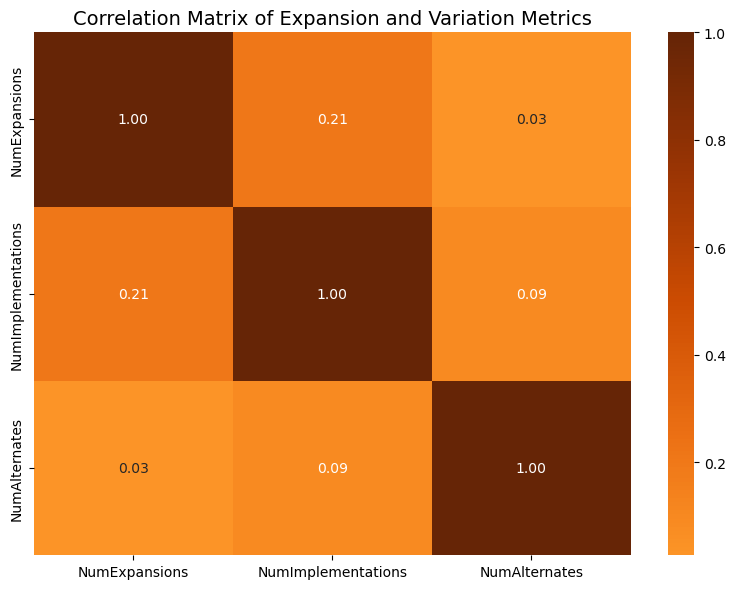

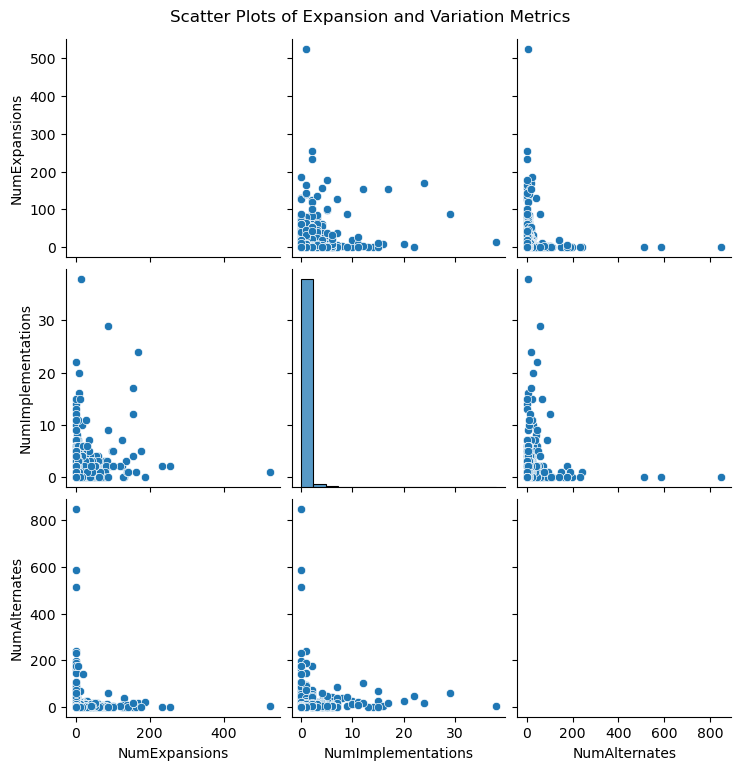

In [83]:
# numexpansions - numimplementations - numalternates correlation
corr_vars = ['NumExpansions', 'NumImplementations', 'NumAlternates']
corr_matrix = df[corr_vars].corr()
print("Correlation Matrix:")
print(corr_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrBr', center=0, fmt=".2f")
plt.title('Correlation Matrix of Expansion and Variation Metrics', fontsize=14)
plt.tight_layout()
plt.show()
# scatter plots
sns.pairplot(df[corr_vars])
plt.suptitle('Scatter Plots of Expansion and Variation Metrics', y=1.02)
plt.show()


Correlation between GameWeight and Category Ranks:
                     Correlation
Rank:wargames          -0.453814
Rank:strategygames     -0.295508
Rank:thematic          -0.132894
Rank:cgs               -0.059859
Rank:abstracts          0.008380
Rank:familygames        0.129665
Rank:partygames         0.131321
Rank:childrensgames     0.198391


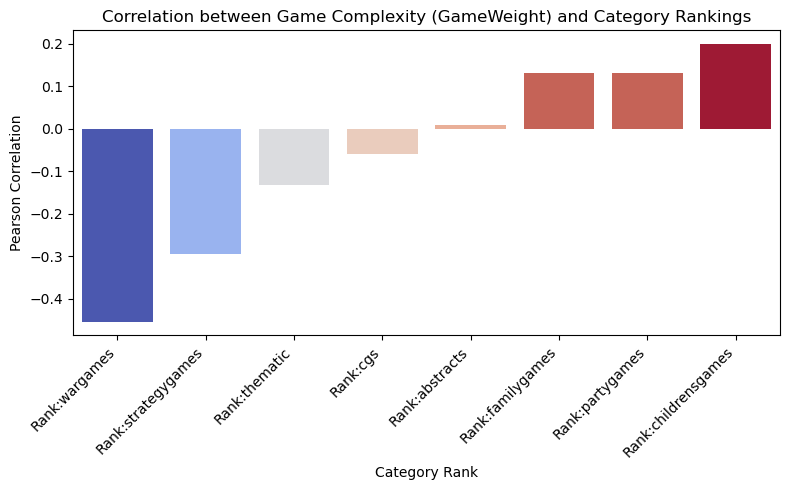

In [84]:
rank_cols = [col for col in df.columns if col.startswith('Rank:')]

rank_cols = [col for col in rank_cols if pd.api.types.is_numeric_dtype(df[col])]

corrs = {}
for col in rank_cols:
    valid = df[['GameWeight', col]].dropna()
    if not valid.empty:
        corr_value = valid['GameWeight'].corr(valid[col])
        corrs[col] = corr_value

corr_df = pd.DataFrame.from_dict(corrs, orient='index', columns=['Correlation']).sort_values(by='Correlation')

print("Correlation between GameWeight and Category Ranks:")
print(corr_df)


plt.figure(figsize=(8,5))
sns.barplot(x=corr_df.index, y='Correlation', data=corr_df, palette='coolwarm', hue='Correlation', dodge=False)
plt.title('Correlation between Game Complexity (GameWeight) and Category Rankings')
plt.ylabel('Pearson Correlation')
plt.xlabel('Category Rank')
plt.xticks(rotation=45, ha='right')
plt.legend([],[], frameon=False)  
plt.tight_layout()
plt.show()

Correlation between GameWeight and Category Ranks (higher rank = better):
                     Correlation
Rank:wargames           0.453814
Rank:strategygames      0.295508
Rank:thematic           0.132894
Rank:cgs                0.059859
Rank:abstracts         -0.008380
Rank:familygames       -0.129665
Rank:partygames        -0.131321
Rank:childrensgames    -0.198391


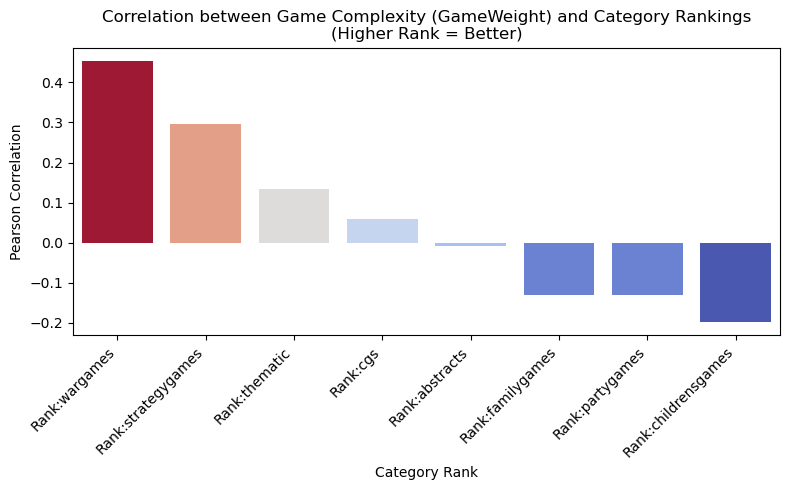

In [85]:
#my idea was to invert the ranking, in this way high ranking = good, the graph is easier to be read
rank_cols = [col for col in df.columns if col.startswith('Rank:')]
rank_cols = [col for col in rank_cols if pd.api.types.is_numeric_dtype(df[col])]

corrs = {}
for col in rank_cols:
    valid = df[['GameWeight', col]].dropna()
    if not valid.empty:
        # Invert rank so that higher values = better ranking
        valid['Rank_Inverted'] = valid[col].max() - valid[col] + 1
        corr_value = valid['GameWeight'].corr(valid['Rank_Inverted'])
        corrs[col] = corr_value

corr_df = pd.DataFrame.from_dict(corrs, orient='index', columns=['Correlation']).sort_values(by='Correlation', ascending=False)

print("Correlation between GameWeight and Category Ranks (higher rank = better):")
print(corr_df)

plt.figure(figsize=(8,5))
sns.barplot(x=corr_df.index, y='Correlation', data=corr_df, palette='coolwarm', hue='Correlation', dodge=False)
plt.title('Correlation between Game Complexity (GameWeight) and Category Rankings\n(Higher Rank = Better)')
plt.ylabel('Pearson Correlation')
plt.xlabel('Category Rank')
plt.xticks(rotation=45, ha='right')
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.show()

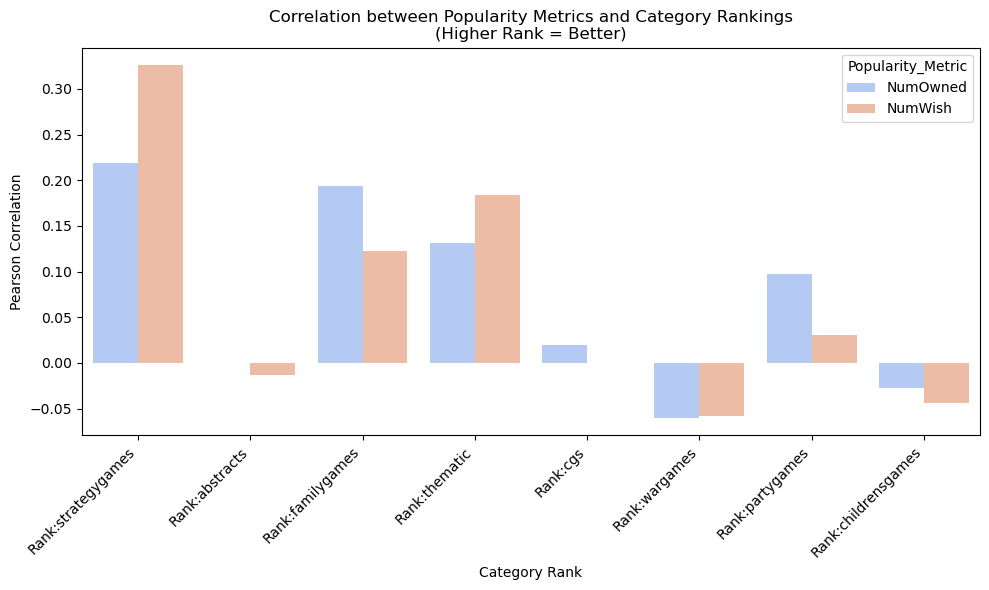

   Popularity_Metric             Category  Correlation
8            NumWish   Rank:strategygames     0.325730
0           NumOwned   Rank:strategygames     0.218342
2           NumOwned     Rank:familygames     0.193223
11           NumWish        Rank:thematic     0.183419
3           NumOwned        Rank:thematic     0.131108
10           NumWish     Rank:familygames     0.122422
6           NumOwned      Rank:partygames     0.096833
14           NumWish      Rank:partygames     0.030556
4           NumOwned             Rank:cgs     0.019680
12           NumWish             Rank:cgs     0.000262
1           NumOwned       Rank:abstracts     0.000231
9            NumWish       Rank:abstracts    -0.012852
7           NumOwned  Rank:childrensgames    -0.026857
15           NumWish  Rank:childrensgames    -0.043908
13           NumWish        Rank:wargames    -0.058389
5           NumOwned        Rank:wargames    -0.059968


In [86]:
rank_cols = [col for col in df.columns if col.startswith('Rank:')]
rank_cols = [col for col in rank_cols if pd.api.types.is_numeric_dtype(df[col])]

popularity_vars = ['NumOwned', 'NumWish']

corrs = []

for pop_col in popularity_vars:
    for rank_col in rank_cols:
        valid = df[[pop_col, rank_col]].dropna()
        if not valid.empty:
            # invert the rank so that higher = better
            valid['Rank_Inverted'] = valid[rank_col].max() - valid[rank_col] + 1
            corr_value = valid[pop_col].corr(valid['Rank_Inverted'])
            corrs.append({'Popularity_Metric': pop_col, 'Category': rank_col, 'Correlation': corr_value})

corr_df = pd.DataFrame(corrs)

plt.figure(figsize=(10,6))
sns.barplot(
    data=corr_df,
    x='Category',
    y='Correlation',
    hue='Popularity_Metric',
    palette='coolwarm'
)
plt.title('Correlation between Popularity Metrics and Category Rankings\n(Higher Rank = Better)')
plt.ylabel('Pearson Correlation')
plt.xlabel('Category Rank')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(corr_df.sort_values(by='Correlation', ascending=False))

Average GameWeight by Category:
        Category  Avg_GameWeight  Count
2        Cat:War        2.852374   3530
1   Cat:Strategy        2.706688   2319
0   Cat:Thematic        2.441424   1224
4        Cat:CGS        2.410162    303
5   Cat:Abstract        1.948506   1115
3     Cat:Family        1.657662   2316
6      Cat:Party        1.339205    640
7  Cat:Childrens        1.158603    881


/var/folders/pw/y3ztzc9n5ns3pn2xk2j59d2w0000gp/T/ipykernel_1412/3442292428.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cat_df, x='Category', y='Avg_GameWeight', palette='coolwarm')


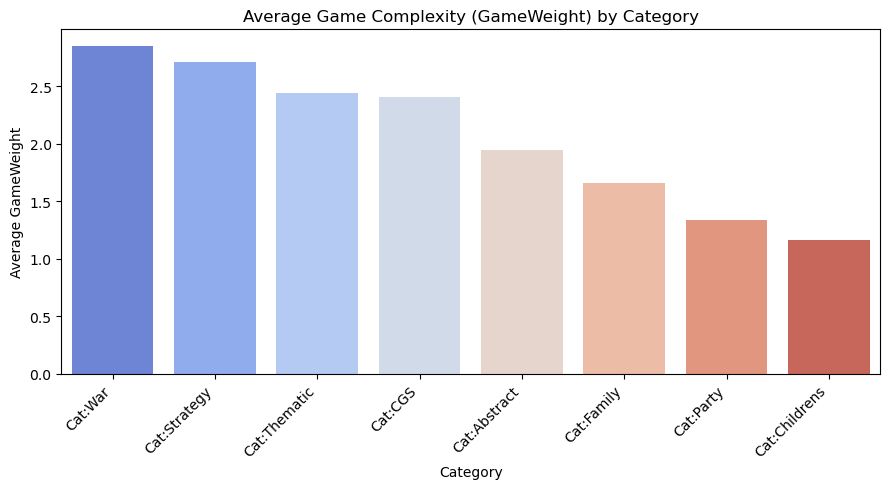

In [87]:
cat_cols = [col for col in cat_cols if pd.api.types.is_numeric_dtype(df[col])]

cat_weights = []
for col in cat_cols:
    sub = df[df[col] == 1]
    if not sub.empty:
        avg_weight = sub['GameWeight'].mean()
        cat_weights.append({'Category': col, 'Avg_GameWeight': avg_weight, 'Count': len(sub)})

cat_df = pd.DataFrame(cat_weights).sort_values(by='Avg_GameWeight', ascending=False)

print("Average GameWeight by Category:")
print(cat_df)

plt.figure(figsize=(9,5))
sns.barplot(data=cat_df, x='Category', y='Avg_GameWeight', palette='coolwarm')
plt.title('Average Game Complexity (GameWeight) by Category')
plt.ylabel('Average GameWeight')
plt.xlabel('Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Correlations with YearPublished:
BGGId                  0.102028
Rank:abstracts         0.095974
MfgAgeRec              0.093121
Rating_num             0.072946
ComAgeRec              0.063935
ComWeight              0.040500
GameWeight             0.040333
Kickstarted            0.037623
IsReimplementation     0.036683
NumWant                0.035605
Cat:Strategy           0.035100
NumWish                0.029168
Rank:childrensgames    0.027983
Cat:Thematic           0.024975
Has_family             0.022411
Cat:War                0.021242
LanguageEase           0.020315
NumImplementations     0.019003
NumExpansions          0.017995
Cat:Family             0.016435
BestPlayers            0.015282
NumOwned               0.014010
Cat:CGS                0.010854
NumUserRatings         0.008939
ComMaxPlaytime         0.008668
MfgPlaytime            0.008668
valid_rank_count       0.005778
category_count         0.005778
ComMinPlaytime         0.004953
Rank:partygames        0.001046
Cat:Par

/var/folders/pw/y3ztzc9n5ns3pn2xk2j59d2w0000gp/T/ipykernel_1412/3287978983.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')


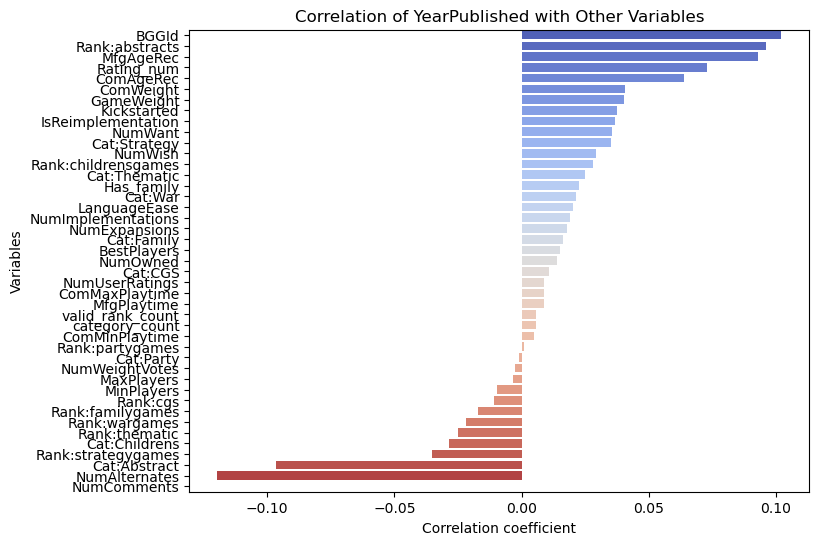

In [88]:
numeric_cols = df.select_dtypes(include='number')

correlations = numeric_cols.corr()['YearPublished'].drop('YearPublished').sort_values(ascending=False)

print("Correlations with YearPublished:")
print(correlations)

plt.figure(figsize=(8,6))
sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')
plt.title('Correlation of YearPublished with Other Variables')
plt.xlabel('Correlation coefficient')
plt.ylabel('Variables')
plt.show()

In [89]:
rating_map = {'low': 1, 'medium': 2, 'high': 3}
df['Rating_ordinal'] = df['Rating'].map(rating_map)


/var/folders/pw/y3ztzc9n5ns3pn2xk2j59d2w0000gp/T/ipykernel_1412/1820499716.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Rating', y='GameWeight', palette='viridis')


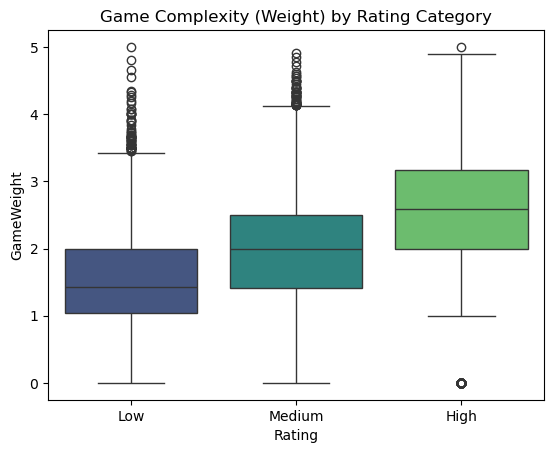

In [90]:
df.groupby('Rating')['GameWeight'].mean()

df.groupby('Rating')['ComMaxPlaytime'].mean()

sns.boxplot(data=df, x='Rating', y='GameWeight', palette='viridis')
plt.title('Game Complexity (Weight) by Rating Category')
plt.show()

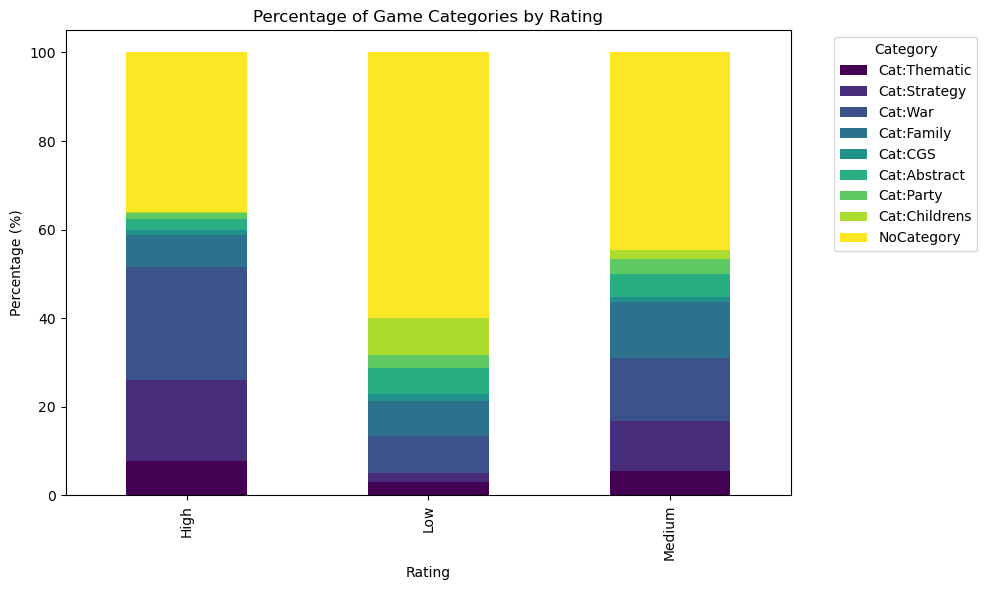

In [91]:
# barchart with ratings and category percentages
# no category games included
df["NoCategory"] = (df[categories].sum(axis=1) == 0).astype(int) # New column indicating no category
rating_category_counts = df.groupby('Rating')[categories + ['NoCategory']].sum() # Count of each category per rating
rating_category_percentages = rating_category_counts.div(rating_category_counts.sum(axis=1), axis=0) * 100
rating_category_percentages.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Percentage of Game Categories by Rating')
plt.xlabel('Rating')
plt.ylabel('Percentage (%)')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
